In [1]:
## Import libraries

import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.forecasting.stl import STLForecast
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from warnings import filterwarnings 
filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.seasonal import seasonal_decompose, STL




In [2]:
## Load data

df = pd.read_csv('/Users/apekshasridhar/Downloads/AAPL.csv')
df.head()


,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [3]:
## No NaN values

df.isnull().sum()


Unnamed: 0     0
symbol         0
date           0
close          0
high           0
low            0
open           0
volume         0
adjClose       0
adjHigh        0
adjLow         0
adjOpen        0
adjVolume      0
divCash        0
splitFactor    0
dtype: int64

<AxesSubplot:xlabel='date'>

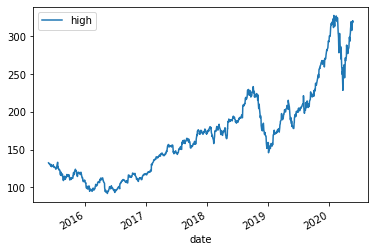

In [4]:
## I want only highest value column 

aapl = df[['date', 'high']]
aapl = aapl.set_index(pd.to_datetime(aapl['date'])).drop('date', axis = 1)
aapl.head()
aapl.plot()

In [5]:
## assign y hist and y pred

y_hist = aapl[:'01-01-2020']
y_future = aapl['01-01-2020':]
y_future.tail()

,high
date,
2020-05-18 00:00:00+00:00,316.50
2020-05-19 00:00:00+00:00,318.52
2020-05-20 00:00:00+00:00,319.52
2020-05-21 00:00:00+00:00,320.89
2020-05-22 00:00:00+00:00,319.23


In [6]:
## Is it stationary

pval = adfuller(y_hist)[1]
### END SOLUTION

# Answer check
print(f'The p-value is {pval: .4f}')


The p-value is  0.9979


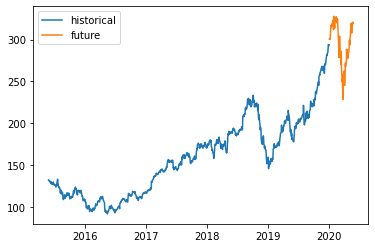

In [7]:
plt.plot(y_hist, label = 'historical')
plt.plot(y_future, label = 'future')
plt.legend();

Text(0.5, 1.0, 'Trend with AAPL stocks Data')

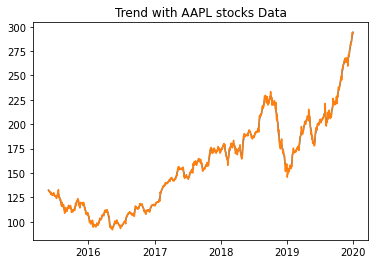

In [8]:
## Extracting Trend

stl = STL(y_hist, period = 6)
results = stl.fit()
### END SOLUTION

## Answer check
plt.plot(results.trend)
plt.plot(y_hist)
plt.title('Trend with AAPL stocks Data')

Text(0.5, 1.0, 'Trend and Seasonality with AAPL stocks Data (Additive)')

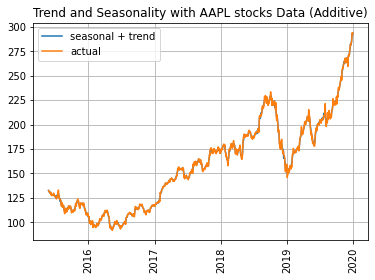

In [9]:
## ADDITIVE

season_and_trend = results.seasonal + results.trend
### END SOLUTION

## Answer Check
plt.plot(season_and_trend['2015':], label = 'seasonal + trend')
plt.plot(y_hist['2015':], label = 'actual')
plt.grid()
plt.legend()
plt.xticks(rotation = 90);
plt.title('Trend and Seasonality with AAPL stocks Data (Additive)')

Text(0.5, 1.0, 'Trend with AAPL stocks Data (Multiplicative)')

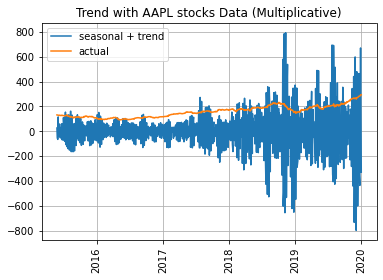

In [16]:
## MULTIPLICATIVE


season_and_trend = results.seasonal * results.trend
### END SOLUTION

## Answer Check
plt.plot(season_and_trend['2000':], label = 'seasonal + trend')
plt.plot(y_hist['2000':], label = 'actual')
plt.grid()
plt.legend()
plt.xticks(rotation = 90);
plt.title('Trend with AAPL stocks Data (Multiplicative)')

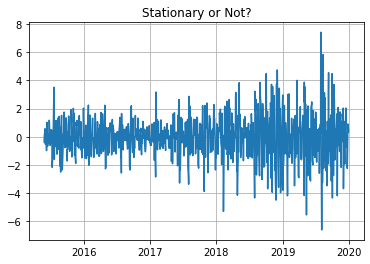

In [17]:
## Examining residuals

plt.plot(results.resid)
plt.grid()
plt.title('Stationary or Not?');

In [18]:
## Is it stationary

pval = adfuller(results.resid)[1]
### END SOLUTION

# Answer check
print(f'The p-value is {pval: .4f}')

The p-value is  0.0000


In [19]:
stlf = STLForecast(y_hist, ARIMA, model_kwargs={'order':(1, 1, 1), 'trend':"t"}, period=12)

#fit model using historical data

stlf_results = stlf.fit()

#produce forecast for future data

forecast = stlf_results.forecast(len(y_future))
future_df = pd.DataFrame(index = y_future.index).reset_index()
df_future = pd.concat([aapl.reset_index(), forecast], axis = 1).set_index('date').drop('high', axis = 1)
df_future.tail()

,0
date,
2020-05-18 00:00:00+00:00,307.420138
2020-05-19 00:00:00+00:00,307.357194
2020-05-20 00:00:00+00:00,308.501158
2020-05-21 00:00:00+00:00,311.808512
2020-05-22 00:00:00+00:00,311.575608


### ARIMA MODEL

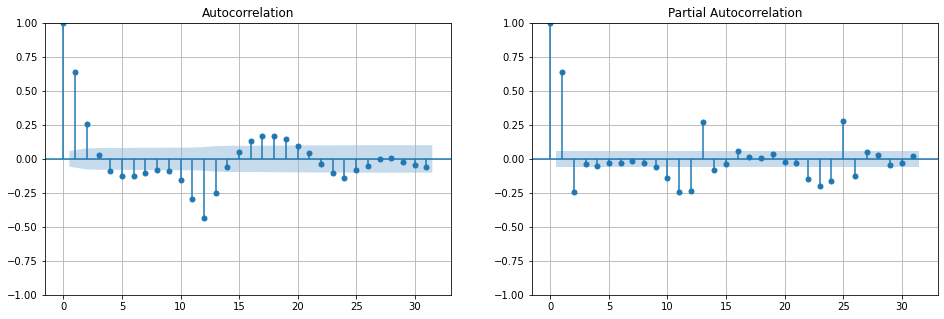

In [203]:
fig, ax = plt.subplots(1, 2, figsize = (16, 5))
plot_acf(results.resid, ax = ax[0]);
ax[0].grid()
plot_pacf(results.resid, ax = ax[1], method = 'ywm');
ax[1].grid()

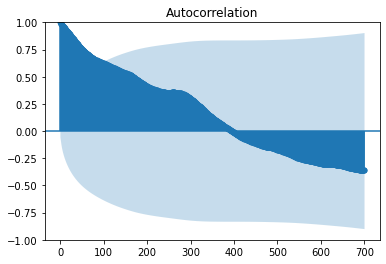

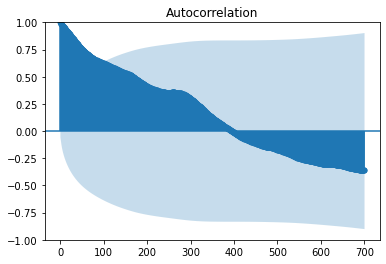

In [223]:
plot_acf(y_hist, lags = 700)

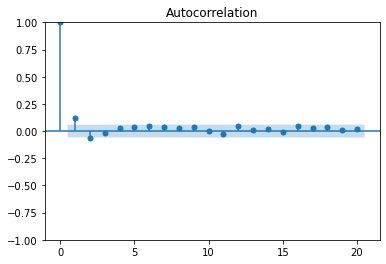

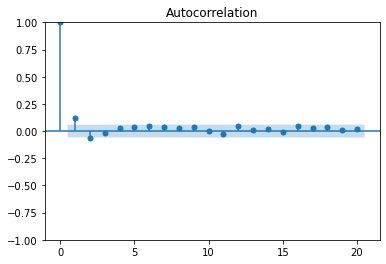

In [205]:
plot_acf(y_hist.diff().dropna(), lags = 20)

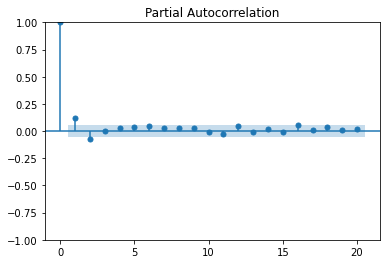

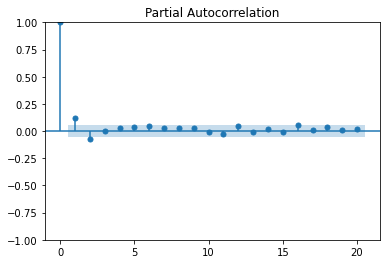

In [206]:
plot_pacf(y_hist.diff().dropna(), lags = 20)

In [207]:
pval = adfuller(y_hist.diff().dropna())[1]
### END SOLUTION

# Answer check
print(f'The p-value is {pval: .4f}')

The p-value is  0.0000


#### Grid Search CV

In [1]:
#$ AutoARMIA

# import pandas as pd
# from statsmodels.tsa.stattools import acf
# from statsmodels.tsa.arima_model import ARIMA
# from pmdarima.arima import auto_arima


# model = auto_arima(y_hist.value, start_p=1, start_q=1,
#                       test='adf',       # Use adftest to find optimal 'd'
#                       max_p=3, max_q=3, # Maximum p and q
#                       m=1,              # Frequency of series
#                       d=None,           # Let model determine 'd'
#                       seasonal=False,   # No Seasonality
#                       start_P=0, 
#                       D=0, 
#                       trace=True,
#                       error_action='ignore',  
#                       suppress_warnings=True, 
#                       stepwise=True)

# # Printing our model summary with all the step-wise data
# print(model.summary())

In [12]:
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
import itertools
from sklearn.metrics import mean_squared_error
import gc


In [13]:
def gridSearch(itemObj):
    # Define the p, d and q parameters to take any value between 0 and 3
    p = d = q = range(0, 3)

    # Generate all different combinations of p, q and q triplets
    pdq = list(itertools.product(p, d, q))

    # Generate all different combinations of seasonal p, q and q triplets
    seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

    bestAIC = np.inf
    bestParam = None
    bestSParam = None
    
    print('Running GridSearch')
    
    #use gridsearch to look for optimial arima parameters
    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                mod = sm.tsa.statespace.SARIMAX(itemObj,
                                                order=param,
                                                seasonal_order=param_seasonal,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False)

                results = mod.fit()

                #if current run of AIC is better than the best one so far, overwrite it
                if results.aic<bestAIC:
                    bestAIC = results.aic
                    bestParam = param
                    bestSParam = param_seasonal

            except:
                continue
                
    print('the best ones are:',bestAIC,bestParam,bestSParam)
    


In [14]:
gridSearch(y_hist)


Running GridSearch
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.51784D+00    |proj g|=  1.86144D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   1.861D-06   6.518D+00
  F =   6.5178396694665093     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  6.10758D+00    |proj g|=  1.04656D-02

At iterate   10    f=  6.10654D+00    |proj g|=  5.33036D-02

At iterate   15    f=  6.07611D+00    |proj g|=  2.68233D-01

At iterate   20    f=  5.81763D+00    |proj g|=  2.62299D-02

At iterate   25    f=  5.81711D+00    |proj g|=  3.08982D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     28     37      1     0     0   1.474D-05   5.817D+00
  F =   5.8170524029326733     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

 This problem is unconstrained.



At iterate    5    f=  5.97096D+00    |proj g|=  1.40423D-02

At iterate   10    f=  5.50718D+00    |proj g|=  1.06333D-01

At iterate   15    f=  5.25175D+00    |proj g|=  2.19062D-01

At iterate   20    f=  5.24867D+00    |proj g|=  2.06758D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     22     38      1     0     0   4.499D-07   5.249D+00
  F =   5.2486691131523688     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  3.51783D+00    |proj g|=  1.99973D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      5      9      1     0     0   2.000D-07   3.518D+00
  F =   3.5178285453674087     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.48551D+00    |proj g|=  4.76537D-02


 This problem is unconstrained.



At iterate    5    f=  3.48171D+00    |proj g|=  1.00006D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      9     13      1     0     0   2.067D-07   3.482D+00
  F =   3.4816420484802180     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.75062D+00    |proj g|=  1.94832D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      2      4      1     0     0   5.175D-07   3.750D+00
  F =   3.7504995366345684     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.5

 This problem is unconstrained.



At iterate    5    f=  3.49437D+00    |proj g|=  3.21603D-02

At iterate   10    f=  3.45447D+00    |proj g|=  6.04666D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     14     18      1     0     0   4.416D-06   3.454D+00
  F =   3.4544517619140964     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.55152D+00    |proj g|=  1.71499D-03

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.53733D+00    |proj g|=  1.52825D-01

At iterate    5    f=  3.53687D+00    |proj g|=  2.67351D-01

At iterate   10    f=  3.53573D+00    |proj g|=  4.42941D-03

At iterate   15    f=  3.53560D+00    |proj g|=  4.35584D-02

At iterate   20    f=  3.53534D+00    |proj g|=  1.27417D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     22     40      1     0     0   9.245D-05   3.535D+00
  F =   3.5353352822848523     

CONVERG


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  3.50173D+00    |proj g|=  3.44897D-01

At iterate   10    f=  3.50140D+00    |proj g|=  1.99104D-02

At iterate   15    f=  3.50103D+00    |proj g|=  7.76842D-03

At iterate   20    f=  3.50100D+00    |proj g|=  1.80456D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     20     25      1     0     0   1.805D-04   3.501D+00
  F =   3.5010017978880290     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.51751D+00    |proj g|=  4.91505D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      0      1      0     0     0   4.915D-06   3.518D+00
  F =   3.5175056697608076     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.5

 This problem is unconstrained.



At iterate    5    f=  3.48074D+00    |proj g|=  1.26152D-02

At iterate   10    f=  3.48005D+00    |proj g|=  5.22075D-03

At iterate   15    f=  3.48000D+00    |proj g|=  4.14170D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     16     20      1     0     0   8.773D-06   3.480D+00
  F =   3.4799989136419529     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.61998D+00    |proj g|=  5.82014D-06

       

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.59941D+00    |proj g|=  8.56182D-02

At iterate    5    f=  3.50776D+00    |proj g|=  2.21386D-02

At iterate   10    f=  3.49148D+00    |proj g|=  5.65435D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     13     20      1     0     0   1.557D-07   3.491D+00
  F =   3.4914176873920999     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.



At iterate    5    f=  3.47146D+00    |proj g|=  2.01816D-02

At iterate   10    f=  3.45785D+00    |proj g|=  3.18227D-03

At iterate   15    f=  3.45542D+00    |proj g|=  8.23171D-02
  ys=-1.190E-03  -gs= 8.312E-04 BFGS update SKIPPED

At iterate   20    f=  3.45445D+00    |proj g|=  1.28243D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     21     33      1     1     0   2.482D-05   3.454D+00
  F =   3.4544515982684927     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.50372D+00    |proj g|=  1.74095D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      1     17      1     0     0   1.741D-03   3.504D+00
  F =   3.5037164438619279     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.5


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  3.50385D+00    |proj g|=  5.06344D-02

At iterate   10    f=  3.50384D+00    |proj g|=  1.79661D-02

At iterate   15    f=  3.50349D+00    |proj g|=  1.61578D-01

At iterate   20    f=  3.50317D+00    |proj g|=  7.00976D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     21     27      1     0     0   1.132D-03   3.503D+00
  F =   3.5031747242449867     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  3.50068D+00    |proj g|=  3.19097D-02

At iterate   10    f=  3.50067D+00    |proj g|=  7.26741D-03

At iterate   15    f=  3.50064D+00    |proj g|=  8.18367D-02

At iterate   20    f=  3.50053D+00    |proj g|=  7.36650D-03

At iterate   25    f=  3.50053D+00    |proj g|=  4.54086D-03

At iterate   30    f=  3.50051D+00    |proj g|=  5.33837D-02

At iterate   35    f=  3.50044D+00    |proj g|=  1.80210D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     36     45      1     0     0   2.620D-05   3.500D+00
  F =   3.5004429207006553     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.48325D+00    |proj g|=  1.87458D-02


 This problem is unconstrained.



At iterate    5    f=  3.48302D+00    |proj g|=  6.08735D-03

At iterate   10    f=  3.48290D+00    |proj g|=  1.00207D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     14     17      1     0     0   7.068D-06   3.483D+00
  F =   3.4829017876172235     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.48222D+00    |proj g|=  5.24756D-02

At iterate    5    f=  3.48018D+00    |proj g|=  1.15609D-02

At iterate   10    f=  3.48003D+00    |proj g|=  8.09874D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     14     18      1     0     0   2.458D-05   3.480D+00
  F =   3.4800178392515968     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.54278D+00    |proj g|=  3.13344D-02


 This problem is unconstrained.



At iterate    5    f=  3.46808D+00    |proj g|=  3.13102D-02

At iterate   10    f=  3.46146D+00    |proj g|=  5.10412D-02

At iterate   15    f=  3.45914D+00    |proj g|=  1.72385D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     17     27      1     0     0   2.148D-06   3.459D+00
  F =   3.4591364896348860     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.52579D+00    |proj g|=  8.18213D-02

At iterate    5    f=  3.46485D+00    |proj g|=  2.61809D-02

At iterate   10    f=  3.45696D+00    |proj g|=  5.53954D-02

At iterate   15    f=  3.45501D+00    |proj g|=  6.98115D-04

At iterate   20    f=  3.45499D+00    |proj g|=  2.92901D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     28      1     0     0   1.557D-05   3.455D+00
  F =   3.4549929378339166     

CONVERG

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.20526D+00    |proj g|=  8.07894D-01

At iterate    5    f=  6.14258D+00    |proj g|=  8.43421D-02

At iterate   10    f=  6.14203D+00    |proj g|=  1.15827D-02

At iterate   15    f=  6.12814D+00    |proj g|=  1.82958D-01

At iterate   20    f=  5.85293D+00    |proj g|=  5.80453D-01

At iterate   25    f=  5.83222D+00    |proj g|=  1.12865D-01

At iterate   30    f=  5.83091D+00    |proj g|=  5.12143D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.



At iterate    5    f=  6.00409D+00    |proj g|=  4.76394D-02

At iterate   10    f=  5.99602D+00    |proj g|=  2.22362D-02

At iterate   15    f=  5.99391D+00    |proj g|=  4.12522D-02

At iterate   20    f=  5.30920D+00    |proj g|=  5.55314D-01

At iterate   25    f=  5.14252D+00    |proj g|=  3.55981D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     27     58      1     0     0   5.522D-05   5.143D+00
  F =   5.1425198930523468     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.99417D+00    |proj g|=  8.76933D-01

At iterate    5    f=  5.91860D+00    |proj g|=  2.44550D-02

At iterate   10    f=  5.91426D+00    |proj g|=  7.57624D-03

At iterate   15    f=  5.90805D+00    |proj g|=  1.68712D-02

At iterate   20    f=  5.70088D+00    |proj g|=  2.52941D-01

At iterate   25    f=  5.26886D+00    |proj g|=  5.99689D-01

At iterate   30    f=  4.63970D+00    |proj g|=  4.00447D-01

At iterate   35    f=  4.60668D+00    |proj g|=  6.35245D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.26538D+00    |proj g|=  5.49106D-01

At iterate    5    f=  3.13076D+00    |proj g|=  1.07534D-01

At iterate   10    f=  3.05960D+00    |proj g|=  4.96994D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     13     17      1     0     0   8.731D-08   3.060D+00
  F =   3.0595950976759219     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.23319D+00    |proj g|=  5.49984D-01

At iterate    5    f=  3.12079D+00    |proj g|=  8.41680D-02

At iterate   10    f=  3.02732D+00    |proj g|=  8.50510D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     13     15      1     0     0   8.605D-07   3.027D+00
  F =   3.0272931923925044     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.



At iterate    5    f=  3.09543D+00    |proj g|=  8.39620D-02

At iterate   10    f=  2.99877D+00    |proj g|=  2.10002D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     14     17      1     0     0   1.106D-05   2.999D+00
  F =   2.9986824512770469     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.42520D+00    |proj g|=  4.47477D-01

At iterate    5    f=  3.35030D+00    |proj g|=  3.86872D-02
  ys=-4.

 This problem is unconstrained.



At iterate   10    f=  3.31051D+00    |proj g|=  2.90630D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     12     22      1     1     0   1.532D-05   3.311D+00
  F =   3.3105105795688159     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.31495D+00    |proj g|=  5.36654D-01

At iterate    5    f=  3.22681D+00    |proj g|=  6.86215D-02

At iterate   10    f=  3.01161D+00    |proj g|=  8.81102D-02

At iterate   15    f=  3.00865D+00    |proj g|=  2.12731D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     17     27      1     0     0   7.511D-06   3.009D+00
  F =   3.0086491808685816     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.27089D+00    |proj g|=  5.64559D-01

At iterate    5    f=  3.17666D+00    |proj g|=  8.98876D-02

At iterate   10    f=  3.02777D+00    |proj g|=  1.14514D-01

At iterate   15    f=  2.97543D+00    |proj g|=  3.55820D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     19     25      1     0     0   3.594D-07   2.975D+00
  F =   2.9754265292824966     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING 

 This problem is unconstrained.



At iterate   10    f=  5.91974D+00    |proj g|=  7.65257D-01

At iterate   15    f=  3.85796D+00    |proj g|=  3.23692D+00

At iterate   20    f=  3.05110D+00    |proj g|=  9.21063D-02

At iterate   25    f=  3.04905D+00    |proj g|=  2.41094D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     26     66      1     0     0   2.246D-05   3.049D+00
  F =   3.0490458886765976     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  5.94028D+00    |proj g|=  1.12607D-02

At iterate   10    f=  5.92804D+00    |proj g|=  3.02589D-02

At iterate   15    f=  4.74106D+00    |proj g|=  1.63741D+00

At iterate   20    f=  3.37497D+00    |proj g|=  4.01888D+00

At iterate   25    f=  3.09190D+00    |proj g|=  2.86293D-01

At iterate   30    f=  3.05413D+00    |proj g|=  7.28146D-02

At iterate   35    f=  3.04568D+00    |proj g|=  2.69267D-01

At iterate   40    f=  3.04328D+00    |proj g|=  3.96981D-02

At iterate   45    f=  3.04227D+00    |proj g|=  1.12865D-02

At iterate   50    f=  3.04212D+00    |proj g|=  2.31123D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.96386D+00    |proj g|=  9.01853D-01

At iterate    5    f=  5.88169D+00    |proj g|=  1.70659D-02

At iterate   10    f=  5.87454D+00    |proj g|=  1.44187D-02

At iterate   15    f=  5.84751D+00    |proj g|=  3.96548D-02

At iterate   20    f=  5.13223D+00    |proj g|=  2.48819D+00

At iterate   25    f=  3.03014D+00    |proj g|=  1.43829D-01

At iterate   30    f=  3.02399D+00    |proj g|=  2.12466D-02

At iterate   35    f=  3.02130D+00    |proj g|=  9.19111D-02

At iterate   40    f=  3.01708D+00    |proj g|=  1.19039D-01

At iterate   45    f=  3.01600D+00    |proj g|=  1.02598D-01

At iterate   50    f=  3.01543D+00    |proj g|=  3.63705D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate    5    f=  3.11080D+00    |proj g|=  2.02135D-01

At iterate   10    f=  3.03208D+00    |proj g|=  4.07933D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     12     15      1     0     0   2.947D-06   3.032D+00
  F =   3.0320773227992692     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.23333D+00    |proj g|=  5.43504D-01

At iterate    5    f=  3.10542D+00    |proj g|=  1.20988D-01


 This problem is unconstrained.



At iterate   10    f=  3.02690D+00    |proj g|=  1.16879D-02

At iterate   15    f=  3.02667D+00    |proj g|=  1.09169D-02

At iterate   20    f=  3.02652D+00    |proj g|=  3.96246D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     21     23      1     0     0   1.224D-05   3.027D+00
  F =   3.0265185938405419     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.20287D+00    |proj g|=  5.25784D-01

At iterate    5    f=  3.08125D+00    |proj g|=  1.60239D-01

At iterate   10    f=  2.99845D+00    |proj g|=  5.25294D-03

At iterate   15    f=  2.99839D+00    |proj g|=  4.15203D-03

At iterate   20    f=  2.99803D+00    |proj g|=  1.63639D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     24     28      1     0     0   2.462D-05   2.998D+00
  F =   2.9980300831232367     

CONVERG

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.34991D+00    |proj g|=  4.73310D-01

At iterate    5    f=  3.22361D+00    |proj g|=  2.37978D-01

At iterate   10    f=  3.16221D+00    |proj g|=  3.07727D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     13     18      1     0     0   5.652D-07   3.162D+00
  F =   3.1622103630250069     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.33429D+00    |proj g|=  4.74695D-01

At iterate    5    f=  3.17150D+00    |proj g|=  8.21425D-02

At iterate   10    f=  3.00951D+00    |proj g|=  9.12630D-02

At iterate   15    f=  3.00760D+00    |proj g|=  7.04127D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     17     24      1     0     0   3.098D-05   3.008D+00
  F =   3.0075952534199590     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.27250D+00    |proj g|=  5.48911D-01

At iterate    5    f=  3.18698D+00    |proj g|=  8.27381D-02

At iterate   10    f=  2.98020D+00    |proj g|=  5.95661D-02

At iterate   15    f=  2.97701D+00    |proj g|=  9.50470D-04

At iterate   20    f=  2.97677D+00    |proj g|=  1.59971D-02

At iterate   25    f=  2.97662D+00    |proj g|=  2.50717D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     27     34      1     0     0   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.97411D+00    |proj g|=  9.02348D-01

At iterate    5    f=  5.88362D+00    |proj g|=  1.99576D-02

At iterate   10    f=  5.36544D+00    |proj g|=  1.67189D+00

At iterate   15    f=  4.36318D+00    |proj g|=  3.14425D+01

At iterate   20    f=  3.03681D+00    |proj g|=  1.08474D-01

At iterate   25    f=  3.01957D+00    |proj g|=  5.63347D-02

At iterate   30    f=  3.01902D+00    |proj g|=  1.48392D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.97411D+00    |proj g|=  9.02533D-01

At iterate    5    f=  5.88470D+00    |proj g|=  1.41521D-02

At iterate   10    f=  5.88053D+00    |proj g|=  5.61057D-02

At iterate   15    f=  5.79321D+00    |proj g|=  2.18790D-01

At iterate   20    f=  5.24447D+00    |proj g|=  9.05748D-01

At iterate   25    f=  4.38507D+00    |proj g|=  1.46049D+01

At iterate   30    f=  3.27359D+00    |proj g|=  3.13918D+00

At iterate   35    f=  3.04269D+00    |proj g|=  3.25136D-01

At iterate   40    f=  3.02891D+00    |proj g|=  3.30189D-02

At iterate   45    f=  3.02458D+00    |proj g|=  3.40918D-02

At iterate   50    f=  3.01909D+00    |proj g|=  3.66457D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.96365D+00    |proj g|=  9.01255D-01

At iterate    5    f=  5.88101D+00    |proj g|=  1.38002D-02

At iterate   10    f=  5.87088D+00    |proj g|=  2.14283D-02

At iterate   15    f=  5.79240D+00    |proj g|=  4.81195D-01

At iterate   20    f=  5.70036D+00    |proj g|=  1.66569D-01

At iterate   25    f=  4.19014D+00    |proj g|=  2.89297D+00

At iterate   30    f=  3.31570D+00    |proj g|=  5.88449D-01

At iterate   35    f=  3.02974D+00    |proj g|=  2.59060D-01

At iterate   40    f=  3.02099D+00    |proj g|=  1.14522D-01

At iterate   45    f=  3.01897D+00    |proj g|=  7.28899D-02

At iterate   50    f=  3.01746D+00    |proj g|=  6.52420D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate    5    f=  3.07625D+00    |proj g|=  1.48873D-01

At iterate   10    f=  3.00389D+00    |proj g|=  1.23125D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     14     19      1     0     0   7.768D-07   3.004D+00
  F =   3.0038631014672639     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.20680D+00    |proj g|=  5.28859D-01

At iterate    5    f=  3.07525D+00    |proj g|=  1.16432D-01

At iterate   10    f=  3.00399D+00    |proj g|=  8.92642D-03

At iterate   15    f=  3.00375D+00    |proj g|=  3.77660D-03

At iterate   20    f=  3.00368D+00    |proj g|=  1.21388D-04
  ys=-4.498E-04  -gs= 2.604E-06 BFGS update SKIPPED

At iterate   25    f=  3.00300D+00    |proj g|=  1.85279D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Proj

 This problem is unconstrained.



At iterate    5    f=  3.07815D+00    |proj g|=  1.99013D-01

At iterate   10    f=  2.99842D+00    |proj g|=  3.99780D-03

At iterate   15    f=  2.99828D+00    |proj g|=  5.45198D-03

At iterate   20    f=  2.99826D+00    |proj g|=  2.19549D-04

At iterate   25    f=  2.99826D+00    |proj g|=  1.79993D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     26     30      1     0     0   9.046D-06   2.998D+00
  F =   2.9982618682028841     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.29660D+00    |proj g|=  5.00100D-01

At iterate    5    f=  3.15619D+00    |proj g|=  2.61657D-01

At iterate   10    f=  3.08100D+00    |proj g|=  7.33169D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     13     18      1     0     0   1.518D-05   3.081D+00
  F =   3.0809955321529445     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.29527D+00    |proj g|=  4.97575D-01

At iterate    5    f=  3.18144D+00    |proj g|=  1.04407D-01

At iterate   10    f=  2.98700D+00    |proj g|=  1.16065D-01

At iterate   15    f=  2.98410D+00    |proj g|=  2.99845D-02

At iterate   20    f=  2.98368D+00    |proj g|=  9.96573D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     21     28      1     0     0   7.427D-05   2.984D+00
  F =   2.9836843553718642     

CONVERG

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.28301D+00    |proj g|=  5.11940D-01

At iterate    5    f=  3.17704D+00    |proj g|=  6.66454D-02

At iterate   10    f=  3.04934D+00    |proj g|=  2.10152D-01

At iterate   15    f=  2.97694D+00    |proj g|=  7.41927D-03

At iterate   20    f=  2.97663D+00    |proj g|=  1.36203D-02

At iterate   25    f=  2.97641D+00    |proj g|=  1.43049D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27     34      1     0     0   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.14454D+00    |proj g|=  8.73884D-01

At iterate    5    f=  6.05168D+00    |proj g|=  1.74361D-02

At iterate   10    f=  6.04767D+00    |proj g|=  7.78115D-03

At iterate   15    f=  6.03999D+00    |proj g|=  3.06908D-02

At iterate   20    f=  5.31257D+00    |proj g|=  4.45374D-01

At iterate   25    f=  5.28547D+00    |proj g|=  5.07263D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     28     76      1     0     0   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.05666D+00    |proj g|=  8.83090D-01

At iterate    5    f=  5.96379D+00    |proj g|=  8.93026D-03

At iterate   10    f=  5.96110D+00    |proj g|=  1.30433D-02

At iterate   15    f=  5.89822D+00    |proj g|=  1.07825D-01

At iterate   20    f=  5.17508D+00    |proj g|=  8.16227D-01

At iterate   25    f=  4.68139D+00    |proj g|=  6.85227D-01

At iterate   30    f=  4.67808D+00    |proj g|=  1.58458D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.



At iterate    5    f=  5.89914D+00    |proj g|=  5.79805D-03

At iterate   10    f=  5.84620D+00    |proj g|=  6.06831D-02

At iterate   15    f=  5.75057D+00    |proj g|=  9.35858D-01

At iterate   20    f=  5.33488D+00    |proj g|=  4.83376D-01

At iterate   25    f=  4.89266D+00    |proj g|=  6.93375D-01

At iterate   30    f=  4.76236D+00    |proj g|=  8.33538D-02

At iterate   35    f=  4.65349D+00    |proj g|=  1.13123D+00

At iterate   40    f=  4.60682D+00    |proj g|=  2.85769D-01

At iterate   45    f=  4.58939D+00    |proj g|=  2.06293D-01

At iterate   50    f=  4.55580D+00    |proj g|=  1.78968D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.31439D+00    |proj g|=  1.45982D+01

At iterate    5    f=  3.00125D+00    |proj g|=  8.87793D-02

At iterate   10    f=  2.82976D+00    |proj g|=  1.31960D-01

At iterate   15    f=  2.82432D+00    |proj g|=  2.16421D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     16     20      1     0     0   5.704D-06   2.824D+00
  F =   2.8243244795928106     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING 

 This problem is unconstrained.



At iterate    5    f=  2.95929D+00    |proj g|=  1.24161D-01

At iterate   10    f=  2.80625D+00    |proj g|=  1.36261D-01

At iterate   15    f=  2.79766D+00    |proj g|=  2.60644D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     16     20      1     0     0   2.698D-06   2.798D+00
  F =   2.7976616255102367     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.19761D+00    |proj g|=  8.36326D+00

At iterate    5    f=  2.93677D+00    |proj g|=  2.12086D-01

At iterate   10    f=  2.77968D+00    |proj g|=  7.94560D-02

At iterate   15    f=  2.77162D+00    |proj g|=  1.72862D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     18     22      1     0     0   3.787D-06   2.772D+00
  F =   2.7716180067395135     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.31848D+00    |proj g|=  1.09415D+00

At iterate    5    f=  3.24054D+00    |proj g|=  5.51649D-01

At iterate   10    f=  3.16894D+00    |proj g|=  3.42998D-01

At iterate   15    f=  3.15721D+00    |proj g|=  6.15257D-02

At iterate   20    f=  3.15641D+00    |proj g|=  1.81388D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     32      1     0     0   1.814D-06   3.156D+00
  F =   3.1564126008011817     

CONVERG

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.16909D+00    |proj g|=  5.77641D-01

At iterate    5    f=  3.06131D+00    |proj g|=  8.49200D-02

At iterate   10    f=  2.82092D+00    |proj g|=  2.80409D-01

At iterate   15    f=  2.78347D+00    |proj g|=  4.17951D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     18     26      1     0     0   1.190D-05   2.783D+00
  F =   2.7834694609175172     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING 

 This problem is unconstrained.



At iterate    5    f=  3.00834D+00    |proj g|=  1.98583D-01

At iterate   10    f=  2.83299D+00    |proj g|=  4.55190D-01

At iterate   15    f=  2.75269D+00    |proj g|=  9.19562D-02

At iterate   20    f=  2.75081D+00    |proj g|=  1.93568D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     31      1     0     0   2.008D-05   2.751D+00
  F =   2.7508078145765578     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.04749D+00    |proj g|=  8.99919D-01

At iterate    5    f=  5.95208D+00    |proj g|=  6.06276D-03

At iterate   10    f=  5.93484D+00    |proj g|=  9.07709D-03

At iterate   15    f=  5.88063D+00    |proj g|=  5.38693D-01

At iterate   20    f=  5.17056D+00    |proj g|=  6.46118D-01

At iterate   25    f=  3.11826D+00    |proj g|=  3.76205D+00

At iterate   30    f=  2.88216D+00    |proj g|=  7.34151D-01

At iterate   35    f=  2.82387D+00    |proj g|=  7.15680D-02

At iterate   40    f=  2.82078D+00    |proj g|=  3.25938D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

 This problem is unconstrained.



At iterate   10    f=  5.90805D+00    |proj g|=  3.22799D-02

At iterate   15    f=  5.88816D+00    |proj g|=  4.04965D-02

At iterate   20    f=  3.65457D+00    |proj g|=  4.46362D+00

At iterate   25    f=  2.92232D+00    |proj g|=  5.19675D+00

At iterate   30    f=  2.81158D+00    |proj g|=  3.26202D-02

At iterate   35    f=  2.81068D+00    |proj g|=  2.17957D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     38     96      1     0     0   1.066D-04   2.811D+00
  F =   2.8106772395076267     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  5.87662D+00    |proj g|=  5.96944D-03

At iterate   10    f=  5.86013D+00    |proj g|=  3.45835D-02

At iterate   15    f=  5.83527D+00    |proj g|=  6.31411D-02

At iterate   20    f=  5.79603D+00    |proj g|=  1.50530D-01

At iterate   25    f=  5.72099D+00    |proj g|=  8.13855D-01

At iterate   30    f=  5.47462D+00    |proj g|=  1.06764D+00

At iterate   35    f=  3.64382D+00    |proj g|=  1.53889D+00

At iterate   40    f=  3.29926D+00    |proj g|=  7.85877D-01

At iterate   45    f=  2.91337D+00    |proj g|=  1.62664D+00


 This problem is unconstrained.



At iterate   50    f=  2.78858D+00    |proj g|=  6.51188D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     97      1     0     0   6.512D-02   2.789D+00
  F =   2.7885834517506081     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.24129D+00    |proj g|=  9.40834D+00

At iterate    5    f=  2.97588D+00    |proj g|=  2.54343D-01

At iterate   10    f=  2.81026D+00    |proj g|=  7.32900D-02

At iter

 This problem is unconstrained.


Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.23224D+00    |proj g|=  9.34757D+00

At iterate    5    f=  2.97091D+00    |proj g|=  2.23776D-01

At iterate   10    f=  2.80300D+00    |proj g|=  6.98272D-02

At iterate   15    f=  2.79797D+00    |proj g|=  2.45171D-03

At iterate   20    f=  2.79741D+00    |proj g|=  2.85100D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     30      1     0     0   4.977D-05   2.797D+00
  F =   2.7973957818311481     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH     

 This problem is unconstrained.



At iterate    5    f=  2.94453D+00    |proj g|=  2.44180D-01

At iterate   10    f=  2.77302D+00    |proj g|=  3.45433D-02

At iterate   15    f=  2.77156D+00    |proj g|=  4.13987D-04

At iterate   20    f=  2.77150D+00    |proj g|=  8.77939D-03

At iterate   25    f=  2.77141D+00    |proj g|=  1.48714D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27     31      1     0     0   2.024D-05   2.771D+00
  F =   2.7714140928753621     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.21989D+00    |proj g|=  8.01520D-01

At iterate    5    f=  3.11727D+00    |proj g|=  7.13477D-02

At iterate   10    f=  2.96568D+00    |proj g|=  7.36337D-02

At iterate   15    f=  2.96016D+00    |proj g|=  4.52422D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     17     22      1     0     0   1.530D-06   2.960D+00
  F =   2.9601574581636942     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING 

 This problem is unconstrained.



At iterate    5    f=  3.07430D+00    |proj g|=  8.03435D-02

At iterate   10    f=  2.98190D+00    |proj g|=  5.44335D-01

At iterate   15    f=  2.82319D+00    |proj g|=  1.80071D-01

At iterate   20    f=  2.78174D+00    |proj g|=  9.46901D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     24     35      1     0     0   3.292D-06   2.782D+00
  F =   2.7817173422737311     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.12405D+00    |proj g|=  5.09739D-01

At iterate    5    f=  3.00672D+00    |proj g|=  8.46187D-02

At iterate   10    f=  2.77367D+00    |proj g|=  1.45529D-01

At iterate   15    f=  2.75188D+00    |proj g|=  3.78152D-02

At iterate   20    f=  2.75150D+00    |proj g|=  2.87696D-03

At iterate   25    f=  2.75125D+00    |proj g|=  9.05704D-03

At iterate   30    f=  2.75113D+00    |proj g|=  1.30072D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.98425D+00    |proj g|=  8.90475D-01

At iterate    5    f=  5.89222D+00    |proj g|=  1.86618D-02

At iterate   10    f=  5.88740D+00    |proj g|=  2.11235D-02

At iterate   15    f=  5.87019D+00    |proj g|=  4.18139D-02

At iterate   20    f=  5.80312D+00    |proj g|=  4.89471D-01

At iterate   25    f=  4.15074D+00    |proj g|=  1.21962D+00

At iterate   30    f=  4.09287D+00    |proj g|=  7.50848D-01

At iterate   35    f=  2.90259D+00    |proj g|=  2.70418D+00

At iterate   40    f=  2.79766D+00    |proj g|=  2.69195D-01

At iterate   45    f=  2.79177D+00    |proj g|=  8.00301D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.98422D+00    |proj g|=  8.90696D-01

At iterate    5    f=  5.89004D+00    |proj g|=  2.44142D-02

At iterate   10    f=  5.88036D+00    |proj g|=  1.50625D-02

At iterate   15    f=  5.85043D+00    |proj g|=  6.38111D-02

At iterate   20    f=  5.77686D+00    |proj g|=  3.69431D-01

At iterate   25    f=  5.75803D+00    |proj g|=  1.72999D-01

At iterate   30    f=  5.72997D+00    |proj g|=  3.67022D-01

At iterate   35    f=  5.65816D+00    |proj g|=  1.84807D-01
  ys=-8.507E-01  -gs= 8.001E-01 BFGS update SKIPPED

At iterate   40    f=  3.70440D+00    |proj g|=  8.02305D+00

At iterate   45    f=  3.05668D+00    |proj g|=  8.74722D-01

At iterate   50    f=  2.81876D+00    |proj g|=  7.47276D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations


 This problem is unconstrained.



At iterate    5    f=  5.87790D+00    |proj g|=  1.72509D-02

At iterate   10    f=  5.86138D+00    |proj g|=  3.76017D-02

At iterate   15    f=  5.85091D+00    |proj g|=  2.51261D-02

At iterate   20    f=  5.79973D+00    |proj g|=  1.12840D-01

At iterate   25    f=  5.70923D+00    |proj g|=  2.83657D+00
  ys=-5.010E+00  -gs= 7.530E-01 BFGS update SKIPPED

At iterate   30    f=  3.81626D+00    |proj g|=  1.06924D+00

At iterate   35    f=  3.25736D+00    |proj g|=  1.29633D+00

At iterate   40    f=  2.90771D+00    |proj g|=  4.16232D-01

At iterate   45    f=  2.86682D+00    |proj g|=  5.95958D-02

At iterate   50    f=  2.86639D+00    |proj g|=  1.81633D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final 

 This problem is unconstrained.



At iterate    5    f=  2.95015D+00    |proj g|=  2.23060D-01

At iterate   10    f=  2.78828D+00    |proj g|=  1.16136D-01

At iterate   15    f=  2.77859D+00    |proj g|=  3.30782D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     19     25      1     0     0   4.768D-06   2.779D+00
  F =   2.7785804260815441     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.20605D+00    |proj g|=  8.63220D+00


 This problem is unconstrained.



At iterate    5    f=  2.95062D+00    |proj g|=  2.08032D-01

At iterate   10    f=  2.78739D+00    |proj g|=  6.57235D-02

At iterate   15    f=  2.77857D+00    |proj g|=  2.42304D-03

At iterate   20    f=  2.77856D+00    |proj g|=  6.07243D-04

At iterate   25    f=  2.77856D+00    |proj g|=  1.15838D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     29     35      1     0     0   3.013D-05   2.779D+00
  F =   2.7785566404339153     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.19547D+00    |proj g|=  8.11236D+00

At iterate    5    f=  2.94829D+00    |proj g|=  1.02499D-01

At iterate   10    f=  2.77887D+00    |proj g|=  8.40323D-02

At iterate   15    f=  2.77138D+00    |proj g|=  1.16656D-02

At iterate   20    f=  2.77133D+00    |proj g|=  2.07101D-03

At iterate   25    f=  2.77131D+00    |proj g|=  9.62084D-05

At iterate   30    f=  2.77131D+00    |proj g|=  3.76440D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.



At iterate    5    f=  3.05651D+00    |proj g|=  7.54447D-02

At iterate   10    f=  2.88298D+00    |proj g|=  8.38996D-02

At iterate   15    f=  2.87563D+00    |proj g|=  5.07617D-03

At iterate   20    f=  2.87561D+00    |proj g|=  5.00475D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     26      1     0     0   5.005D-06   2.876D+00
  F =   2.8756085198049468     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  3.04794D+00    |proj g|=  7.77951D-02

At iterate   10    f=  2.80053D+00    |proj g|=  3.06912D-01

At iterate   15    f=  2.76062D+00    |proj g|=  5.45104D-02

At iterate   20    f=  2.76037D+00    |proj g|=  1.00736D-03

At iterate   25    f=  2.76037D+00    |proj g|=  5.76601D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     25     37      1     0     0   5.766D-05   2.760D+00
  F =   2.7603666148757329     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

 This problem is unconstrained.



At iterate    5    f=  3.01023D+00    |proj g|=  8.41561D-02

At iterate   10    f=  2.83725D+00    |proj g|=  1.75335D-01

At iterate   15    f=  2.75247D+00    |proj g|=  5.83047D-02

At iterate   20    f=  2.75164D+00    |proj g|=  8.89415D-04

At iterate   25    f=  2.75127D+00    |proj g|=  1.53338D-03

At iterate   30    f=  2.75113D+00    |proj g|=  2.45639D-03

At iterate   35    f=  2.75113D+00    |proj g|=  9.09778D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     36     51      1     0     0   5.057D-05   2.751D+00
  F =   2.7511275116484528     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.20318D+00    |proj g|=  9.79884D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      4      7      1     0     0   1.368D-07   2.203D+00
  F =   2.2030653029376408     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.1

 This problem is unconstrained.



At iterate    5    f=  2.18419D+00    |proj g|=  2.79821D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      5      8      1     0     0   2.798D-07   2.184D+00
  F =   2.1841942749092578     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.51807D+00    |proj g|=  3.90723D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.26227D+00    |proj g|=  2.38720D-01

At iterate    5    f=  2.19781D+00    |proj g|=  7.62226D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      8     11      1     0     0   2.071D-07   2.198D+00
  F =   2.1978083490402494     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 v

 This problem is unconstrained.



At iterate    5    f=  2.17784D+00    |proj g|=  8.38079D-03

At iterate   10    f=  2.17774D+00    |proj g|=  4.96518D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     13     17      1     0     0   8.644D-06   2.178D+00
  F =   2.1777370222145054     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.01916D+00    |proj g|=  4.22980D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      2      4      1     0     0   5.461D-06   3.019D+00
  F =   3.0190346039630911     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.56945D+00    |proj g|=  4.93624D-01

At iterate    5    f=  2.50152D+00    |proj g|=  1.27447D-01

At iterate   10    f=  2.49357D+00    |proj g|=  1.72276D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     11     15      1     0     0   5.262D-08   2.494D+00
  F =   2.4935687661984316     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.37128D+00    |proj g|=  2.68969D-01

At iterate    5    f=  2.24328D+00    |proj g|=  9.32503D-01

At iterate   10    f=  2.22768D+00    |proj g|=  1.10598D-01

At iterate   15    f=  2.19561D+00    |proj g|=  5.51714D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     19     34      1     0     0   3.922D-06   2.196D+00
  F =   2.1955965479247865     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.20470D+00    |proj g|=  4.88853D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      0      1      0     0     0   4.889D-06   2.205D+00
  F =   2.2047004348162451     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.2

 This problem is unconstrained.



At iterate    5    f=  2.18416D+00    |proj g|=  2.30350D-04

At iterate   10    f=  2.18415D+00    |proj g|=  1.66283D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     14     17      1     0     0   2.379D-06   2.184D+00
  F =   2.1841506231082031     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.37593D+00    |proj g|=  6.27245D-06

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.26129D+00    |proj g|=  2.38502D-01

At iterate    5    f=  2.20366D+00    |proj g|=  4.71759D-01

At iterate   10    f=  2.19817D+00    |proj g|=  4.51057D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     14     21      1     0     0   1.424D-03   2.198D+00
  F =   2.1978075385746743     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.20663D+00    |proj g|=  1.62504D-01

At iterate    5    f=  2.17732D+00    |proj g|=  1.41481D-02

At iterate   10    f=  2.17711D+00    |proj g|=  8.69539D-03

At iterate   15    f=  2.17690D+00    |proj g|=  3.29437D-03

At iterate   20    f=  2.17681D+00    |proj g|=  3.79615D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     24     32      1     0     0   2.818D-06   2.177D+00
  F =   2.1768073856991808     

CONVERG

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.72324D+00    |proj g|=  8.31153D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      0      1      0     0     0   8.312D-06   2.723D+00
  F =   2.7232388930521232     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.4

 This problem is unconstrained.



At iterate    5    f=  2.39868D+00    |proj g|=  1.15800D-01

At iterate   10    f=  2.37736D+00    |proj g|=  1.46509D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     12     14      1     0     0   9.411D-06   2.377D+00
  F =   2.3773327815905430     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.46421D+00    |proj g|=  3.96301D-01

At iterate    5    f=  2.37099D+00    |proj g|=  1.62823D-01

At iterate   10    f=  2.23849D+00    |proj g|=  1.19841D-01

At iterate   15    f=  2.20554D+00    |proj g|=  5.25207D-02
  ys=-1.359E-02  -gs= 3.750E-03 BFGS update SKIPPED

At iterate   20    f=  2.19580D+00    |proj g|=  4.03223D-02

At iterate   25    f=  2.19560D+00    |proj g|=  3.67155D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Proj

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.18599D+00    |proj g|=  9.69080D-03

At iterate    5    f=  2.18589D+00    |proj g|=  1.96990D-03


 This problem is unconstrained.



At iterate   10    f=  2.18568D+00    |proj g|=  2.86775D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     14     18      1     0     0   5.976D-07   2.186D+00
  F =   2.1856726638602884     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.18455D+00    |proj g|=  3.16150D-03

At iterate    5    f=  2.18437D+00    |proj g|=  6.32625D-03

At iterate   10    f=  2.18374D+00    |proj g|=  1.56158D-03

At iterate   15    f=  2.18357D+00    |proj g|=  1.47749D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     18     21      1     0     0   7.911D-06   2.184D+00
  F =   2.1835692824100428     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.30969D+00    |proj g|=  6.70339D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      0      1      0     0     0   6.703D-06   2.310D+00
  F =   2.3096853457674227     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.24150D+00    |proj g|=  2.39497D-01

At iterate    5    f=  2.18424D+00    |proj g|=  3.32288D-02

At iterate   10    f=  2.18037D+00    |proj g|=  1.96628D-02

At iterate   15    f=  2.18030D+00    |proj g|=  1.25714D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     17     31      1     0     0   5.836D-06   2.180D+00
  F =   2.1803030904699474     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.20090D+00    |proj g|=  1.56389D-01

At iterate    5    f=  2.17874D+00    |proj g|=  1.27025D-02

At iterate   10    f=  2.17727D+00    |proj g|=  3.17233D-03

At iterate   15    f=  2.17692D+00    |proj g|=  1.17787D-02

At iterate   20    f=  2.17681D+00    |proj g|=  4.09840D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     24     36      1     0     0   3.776D-05   2.177D+00
  F =   2.1768073370511374     

CONVERG

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.58283D+00    |proj g|=  1.05776D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      1     11      1     0     0   1.004D-05   2.583D+00
  F =   2.5828252647181400     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.4

 This problem is unconstrained.



At iterate    5    f=  2.31755D+00    |proj g|=  4.59601D-02

At iterate   10    f=  2.31351D+00    |proj g|=  7.90089D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     11     16      1     0     0   6.139D-06   2.314D+00
  F =   2.3135136094032389     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.38096D+00    |proj g|=  3.43211D-01

At iterate    5    f=  2.34205D+00    |proj g|=  8.41448D-02

At iterate   10    f=  2.33192D+00    |proj g|=  2.65147D-02

At iterate   15    f=  2.30751D+00    |proj g|=  6.61481D-01

At iterate   20    f=  2.24578D+00    |proj g|=  9.13389D-01

At iterate   25    f=  2.21017D+00    |proj g|=  1.85554D-01

At iterate   30    f=  2.20264D+00    |proj g|=  5.67189D-01

At iterate   35    f=  2.19719D+00    |proj g|=  5.83893D-01

At iterate   40    f=  2.19692D+00    |proj g|=  2.40949D-02

At iterate   45    f=  2.19617D+00    |proj g|=  9.08015D-01

At iterate   50    f=  2.19559D+00    |proj g|=  1.74247D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.21346D+00    |proj g|=  7.17038D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      4      7      1     0     0   9.162D-08   2.213D+00
  F =   2.2134332240695720     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.1

 This problem is unconstrained.



At iterate    5    f=  2.17451D+00    |proj g|=  7.17746D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      5      8      1     0     0   7.177D-06   2.175D+00
  F =   2.1745085139535503     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.50675D+00    |proj g|=  1.15508D-02


 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      4      7      1     0     0   1.713D-06   2.507D+00
  F =   2.5066669384755067     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.29786D+00    |proj g|=  1.58119D-01

At iterate    5    f=  2.18863D+00    |proj g|=  1.70483D-02

At iterate   10    f=  2.18846D+00    |proj g|=  6.26780D-05

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.25334D+00    |proj g|=  1.34423D-01

At iterate    5    f=  2.16901D+00    |proj g|=  1.48624D-02

At iterate   10    f=  2.16893D+00    |proj g|=  1.27870D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     12     16      1     0     0   1.437D-06   2.169D+00
  F =   2.1689326457165716     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.77088D+00    |proj g|=  6.76707D-01

At iterate    5    f=  2.49403D+00    |proj g|=  3.66981D-01

At iterate   10    f=  2.48238D+00    |proj g|=  1.39706D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     12     20      1     0     0   3.295D-06   2.482D+00
  F =   2.4823795239765984     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.60800D+00    |proj g|=  3.62045D-01

At iterate    5    f=  2.26600D+00    |proj g|=  6.55788D-01

At iterate   10    f=  2.20815D+00    |proj g|=  3.60053D-01

At iterate   15    f=  2.19014D+00    |proj g|=  4.68314D-01

At iterate   20    f=  2.18717D+00    |proj g|=  6.92786D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     22     38      1     0     0   1.919D-06   2.187D+00
  F =   2.1871674174142259     

CONVERG

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.19414D+00    |proj g|=  8.40395D-03

At iterate    5    f=  2.19391D+00    |proj g|=  8.10428D-03

At iterate   10    f=  2.19326D+00    |proj g|=  8.56546D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     12     16      1     0     0   1.199D-06   2.193D+00
  F =   2.1932613491455477     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.



At iterate    5    f=  2.17435D+00    |proj g|=  2.24841D-04

At iterate   10    f=  2.17434D+00    |proj g|=  1.52048D-03

At iterate   15    f=  2.17434D+00    |proj g|=  9.10960D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     15     19      1     0     0   9.110D-06   2.174D+00
  F =   2.1743373398933894     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.38093D+00    |proj g|=  6.83914D-02


 This problem is unconstrained.



At iterate    5    f=  2.36773D+00    |proj g|=  2.48411D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6      9      1     0     0   4.036D-07   2.368D+00
  F =   2.3677343387145484     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.29764D+00    |proj g|=  1.56373D-01


 This problem is unconstrained.



At iterate    5    f=  2.18930D+00    |proj g|=  2.25345D-02

At iterate   10    f=  2.18846D+00    |proj g|=  7.31549D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     14     22      1     0     0   3.702D-07   2.188D+00
  F =   2.1884610367854354     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.25600D+00    |proj g|=  1.31717D-01

At iterate    5    f=  2.16836D+00    |proj g|=  7.41148D-03

At iterate   10    f=  2.16822D+00    |proj g|=  8.08464D-03

At iterate   15    f=  2.16789D+00    |proj g|=  8.58402D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     19     22      1     0     0   4.935D-06   2.168D+00
  F =   2.1678880986243332     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.77624D+00    |proj g|=  7.78157D-02

At iterate    5    f=  2.71483D+00    |proj g|=  5.98219D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6     11      1     0     0   1.191D-06   2.715D+00
  F =   2.7148315331043347     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 v

 This problem is unconstrained.



At iterate    5    f=  2.39186D+00    |proj g|=  2.18125D-01

At iterate   10    f=  2.36727D+00    |proj g|=  1.08341D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     13     17      1     0     0   2.115D-06   2.367D+00
  F =   2.3672714442908509     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.73468D+00    |proj g|=  5.16682D-01

At iterate    5    f=  2.44844D+00    |proj g|=  3.58161D-01

At iterate   10    f=  2.25124D+00    |proj g|=  5.92650D-01

At iterate   15    f=  2.19382D+00    |proj g|=  1.66111D-01

At iterate   20    f=  2.18729D+00    |proj g|=  2.31876D-02

At iterate   25    f=  2.18717D+00    |proj g|=  2.98145D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     28     89      2     0     0   1.248D-03   2.187D+00
  F =   2.1871660612958976     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.17754D+00    |proj g|=  8.83829D-03


 This problem is unconstrained.



At iterate    5    f=  2.17746D+00    |proj g|=  2.75380D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      5      9      1     0     0   2.754D-07   2.177D+00
  F =   2.1774600955572878     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.17783D+00    |proj g|=  1.25376D-02

At iterate    5    f=  2.17762D+00    |proj g|=  1.39345D-03

At iterate   10    f=  2.17744D+00    |proj g|=  1.93628D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     12     16      1     0     0   4.533D-05   2.177D+00
  F =   2.1774368202272298     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.17486D+00    |proj g|=  9.02108D-03

At iterate    5    f=  2.17465D+00    |proj g|=  5.34494D-03

At iterate   10    f=  2.17399D+00    |proj g|=  9.89085D-04

At iterate   15    f=  2.17391D+00    |proj g|=  4.30482D-03

At iterate   20    f=  2.17389D+00    |proj g|=  1.59206D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     20     24      1     0     0   1.592D-05   2.174D+00
  F =   2.1738890001950391     

CONVERG

 This problem is unconstrained.



At iterate    5    f=  2.30193D+00    |proj g|=  1.33495D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      7     10      1     0     0   1.885D-06   2.302D+00
  F =   2.3019310921676777     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.27826D+00    |proj g|=  1.58144D-01


 This problem is unconstrained.



At iterate    5    f=  2.18405D+00    |proj g|=  7.18497D-02
  ys=-8.999E-04  -gs= 5.449E-04 BFGS update SKIPPED

At iterate   10    f=  2.17251D+00    |proj g|=  1.90333D-03

At iterate   15    f=  2.17250D+00    |proj g|=  4.62489D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     16     27      1     1     0   1.106D-05   2.172D+00
  F =   2.1724988308698792     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.25329D+00    |proj g|=  1.35329D-01

At iterate    5    f=  2.17088D+00    |proj g|=  6.22706D-02

At iterate   10    f=  2.16913D+00    |proj g|=  1.33810D-03

At iterate   15    f=  2.16910D+00    |proj g|=  1.15488D-03

At iterate   20    f=  2.16909D+00    |proj g|=  4.35403D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     20     24      1     0     0   4.354D-06   2.169D+00
  F =   2.1690887616047729     

CONVERG

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.68990D+00    |proj g|=  9.85203D-02

At iterate    5    f=  2.57584D+00    |proj g|=  1.00443D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      8     12      1     0     0   2.408D-05   2.576D+00
  F =   2.5758412932503889     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.63137D+00    |proj g|=  1.22130D-01

At iterate    5    f=  2.34456D+00    |proj g|=  2.17886D-01

At iterate   10    f=  2.30586D+00    |proj g|=  2.42154D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     13     22      1     0     0   1.356D-06   2.306D+00
  F =   2.3058486466006918     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.



At iterate    5    f=  2.45061D+00    |proj g|=  1.88059D-01

At iterate   10    f=  2.32441D+00    |proj g|=  2.76279D-02

At iterate   15    f=  2.30234D+00    |proj g|=  5.33281D-01

At iterate   20    f=  2.21808D+00    |proj g|=  9.71586D-01

At iterate   25    f=  2.19862D+00    |proj g|=  7.43677D-02

At iterate   30    f=  2.19653D+00    |proj g|=  4.83114D-01

At iterate   35    f=  2.19238D+00    |proj g|=  1.71399D+00

At iterate   40    f=  2.18747D+00    |proj g|=  2.94959D-01

At iterate   45    f=  2.18735D+00    |proj g|=  1.93517D-01

At iterate   50    f=  2.18729D+00    |proj g|=  5.27994D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.21058D+00    |proj g|=  5.22471D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      4      7      1     0     0   1.349D-05   2.211D+00
  F =   2.2105622854760552     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.1

 This problem is unconstrained.



At iterate    5    f=  2.17154D+00    |proj g|=  6.58904D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      6      9      1     0     0   7.887D-07   2.172D+00
  F =   2.1715396852863136     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.50235D+00    |proj g|=  3.59475D-03


 This problem is unconstrained.



At iterate    5    f=  2.50234D+00    |proj g|=  1.35338D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      5      8      1     0     0   1.353D-05   2.502D+00
  F =   2.5023398682049227     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.29487D+00    |proj g|=  1.58084D-01


 This problem is unconstrained.



At iterate    5    f=  2.18610D+00    |proj g|=  2.93457D-02

At iterate   10    f=  2.18544D+00    |proj g|=  1.78271D-03

At iterate   15    f=  2.18544D+00    |proj g|=  1.54294D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     15     21      1     0     0   1.543D-06   2.185D+00
  F =   2.1854359824699632     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.24832D+00    |proj g|=  1.35483D-01


 This problem is unconstrained.



At iterate    5    f=  2.16324D+00    |proj g|=  4.77768D-02

At iterate   10    f=  2.16286D+00    |proj g|=  1.26890D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     12     17      1     0     0   6.233D-06   2.163D+00
  F =   2.1628607087083505     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.00021D+00    |proj g|=  3.00793D-03

At iterate    5    f=  3.00020D+00    |proj g|=  1.63729D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      7     10      1     0     0   1.281D-06   3.000D+00
  F =   3.0001953637870531     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.76549D+00    |proj g|=  6.76544D-01

At iterate    5    f=  2.48956D+00    |proj g|=  3.80299D-01

At iterate   10    f=  2.47658D+00    |proj g|=  2.81049D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     12     21      1     0     0   7.631D-05   2.477D+00
  F =   2.4765847869565336     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.60293D+00    |proj g|=  3.60373D-01

At iterate    5    f=  2.25362D+00    |proj g|=  1.62669D+00

At iterate   10    f=  2.23548D+00    |proj g|=  3.71573D-01

At iterate   15    f=  2.18773D+00    |proj g|=  2.24966D+00

At iterate   20    f=  2.18284D+00    |proj g|=  2.26639D-02

At iterate   25    f=  2.18273D+00    |proj g|=  4.33498D-01

At iterate   30    f=  2.18243D+00    |proj g|=  5.03793D-03

At iterate   35    f=  2.18243D+00    |proj g|=  2.79131D-02

At iterate   40    f=  2.18241D+00    |proj g|=  1.07048D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.19503D+00    |proj g|=  5.10412D-03

At iterate    5    f=  2.19501D+00    |proj g|=  5.23661D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      5      8      1     0     0   5.237D-06   2.195D+00
  F =   2.1950139742589667     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.19123D+00    |proj g|=  8.61580D-03

At iterate    5    f=  2.19079D+00    |proj g|=  1.08546D-02

At iterate   10    f=  2.19033D+00    |proj g|=  7.28687D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     11     15      1     0     0   3.008D-06   2.190D+00
  F =   2.1903264308819206     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  2.17138D+00    |proj g|=  2.00802D-04

At iterate   10    f=  2.17137D+00    |proj g|=  9.91997D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     13     17      1     0     0   4.001D-05   2.171D+00
  F =   2.1713737817204306     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.38059D+00    |proj g|=  6.77152D-02

At iterate    5    f=  2.36694D+00    |proj g|=  2.31754D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      6      8      1     0     0   5.573D-06   2.367D+00
  F =   2.3669419312655560     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.29442D+00    |proj g|=  1.56775D-01

At iterate    5    f=  2.18903D+00    |proj g|=  3.51868D-02

At iterate   10    f=  2.18764D+00    |proj g|=  1.49509D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     12     16      1     0     0   1.003D-06   2.188D+00
  F =   2.1876371810815267     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.25104D+00    |proj g|=  1.32738D-01

At iterate    5    f=  2.16239D+00    |proj g|=  1.44428D-02

At iterate   10    f=  2.16192D+00    |proj g|=  1.38875D-02

At iterate   15    f=  2.16170D+00    |proj g|=  2.32702D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     18     24      1     0     0   2.726D-05   2.162D+00
  F =   2.1616987832470667     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.77573D+00    |proj g|=  7.72124D-02

At iterate    5    f=  2.71415D+00    |proj g|=  1.06222D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      8     12      1     0     0   1.572D-06   2.714D+00
  F =   2.7141519839394634     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 v

 This problem is unconstrained.



At iterate    5    f=  2.40559D+00    |proj g|=  2.39862D-01

At iterate   10    f=  2.36325D+00    |proj g|=  3.65224D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     13     20      1     0     0   3.233D-06   2.363D+00
  F =   2.3632479419277610     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.72964D+00    |proj g|=  5.16733D-01


 This problem is unconstrained.



At iterate    5    f=  2.46774D+00    |proj g|=  4.13251D-01

At iterate   10    f=  2.27695D+00    |proj g|=  4.89806D-01

At iterate   15    f=  2.18493D+00    |proj g|=  5.86123D-01

At iterate   20    f=  2.18384D+00    |proj g|=  5.50282D-02

At iterate   25    f=  2.18244D+00    |proj g|=  6.76046D-03

At iterate   30    f=  2.18243D+00    |proj g|=  1.28132D-02

At iterate   35    f=  2.18241D+00    |proj g|=  4.00484D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     38     59      1     0     0   1.667D-03   2.182D+00
  F =   2.1824128170366124     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.17602D+00    |proj g|=  5.04762D-03

At iterate    5    f=  2.17598D+00    |proj g|=  7.73195D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      5      8      1     0     0   7.732D-06   2.176D+00
  F =   2.1759754593344725     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.17632D+00    |proj g|=  1.37205D-02

At iterate    5    f=  2.17611D+00    |proj g|=  1.45279D-03

At iterate   10    f=  2.17595D+00    |proj g|=  4.53219D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     13     17      1     0     0   1.207D-05   2.176D+00
  F =   2.1759460431882092     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.17184D+00    |proj g|=  6.91851D-03

At iterate    5    f=  2.17168D+00    |proj g|=  4.47511D-03

At iterate   10    f=  2.17107D+00    |proj g|=  1.46787D-03

At iterate   15    f=  2.17106D+00    |proj g|=  3.05734D-03

At iterate   20    f=  2.17097D+00    |proj g|=  4.95385D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     24     28      1     0     0   2.404D-05   2.171D+00
  F =   2.1709675975334974     

CONVERG

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.32380D+00    |proj g|=  8.76157D-02

At iterate    5    f=  2.30039D+00    |proj g|=  2.36984D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      7     10      1     0     0   6.288D-06   2.300D+00
  F =   2.3003850051632044     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.27697D+00    |proj g|=  1.58168D-01

At iterate    5    f=  2.18255D+00    |proj g|=  7.07693D-02

At iterate   10    f=  2.17090D+00    |proj g|=  3.29798D-02

At iterate   15    f=  2.17089D+00    |proj g|=  1.34016D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     16     29      1     0     0   2.940D-04   2.171D+00
  F =   2.1708900224378875     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.24847D+00    |proj g|=  1.36166D-01

At iterate    5    f=  2.16471D+00    |proj g|=  5.83618D-02

At iterate   10    f=  2.16314D+00    |proj g|=  1.12691D-03

At iterate   15    f=  2.16306D+00    |proj g|=  5.83713D-03

At iterate   20    f=  2.16170D+00    |proj g|=  1.13976D-03

At iterate   25    f=  2.16170D+00    |proj g|=  2.64337D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     25     37      1     0     0   

 This problem is unconstrained.



At iterate    5    f=  2.57494D+00    |proj g|=  2.21706D-02

At iterate   10    f=  2.57448D+00    |proj g|=  9.73355D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     10     11      1     0     0   9.734D-07   2.574D+00
  F =   2.5744759909070445     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.62942D+00    |proj g|=  1.22276D-01


 This problem is unconstrained.



At iterate    5    f=  2.34185D+00    |proj g|=  2.86714D-01

At iterate   10    f=  2.30433D+00    |proj g|=  7.47626D-03

At iterate   15    f=  2.30431D+00    |proj g|=  4.66804D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     15     22      1     0     0   4.668D-06   2.304D+00
  F =   2.3043137368609590     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.64833D+00    |proj g|=  4.50280D-01

At iterate    5    f=  2.45540D+00    |proj g|=  1.39539D-01

At iterate   10    f=  2.31765D+00    |proj g|=  2.72849D-02

At iterate   15    f=  2.27108D+00    |proj g|=  7.92557D-01

At iterate   20    f=  2.21937D+00    |proj g|=  1.67025D+00

At iterate   25    f=  2.18904D+00    |proj g|=  8.59388D-02

At iterate   30    f=  2.18627D+00    |proj g|=  2.32679D-01

At iterate   35    f=  2.18378D+00    |proj g|=  1.78449D+00

At iterate   40    f=  2.18259D+00    |proj g|=  8.52803D-02

At iterate   45    f=  2.18255D+00    |proj g|=  6.37133D-02

At iterate   50    f=  2.18240D+00    |proj g|=  1.81079D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.
 This problem is unconstrained.


Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      4      7      1     0     0   6.044D-07   2.480D+00
  F =   2.4803375694633103     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.45909D+00    |proj g|=  3.16401D-02


 This problem is unconstrained.



At iterate    5    f=  2.45849D+00    |proj g|=  6.05909D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6      9      1     0     0   1.583D-06   2.458D+00
  F =   2.4584930760744585     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.79171D+00    |proj g|=  3.13552D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.55324D+00    |proj g|=  1.95332D-01

At iterate    5    f=  2.47769D+00    |proj g|=  6.64398D-02

At iterate   10    f=  2.47364D+00    |proj g|=  5.28891D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     10     14      1     0     0   5.289D-05   2.474D+00
  F =   2.4736406027947218     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.49854D+00    |proj g|=  1.58213D-01

At iterate    5    f=  2.45164D+00    |proj g|=  2.10358D-02

At iterate   10    f=  2.45083D+00    |proj g|=  8.12150D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     10     12      1     0     0   8.122D-07   2.451D+00
  F =   2.4508268742810979     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.28725D+00    |proj g|=  3.30798D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      2      4      1     0     0   2.479D-06   3.287D+00
  F =   3.2871148138245627     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.9

 This problem is unconstrained.



At iterate    5    f=  2.81669D+00    |proj g|=  2.75132D-01

At iterate   10    f=  2.76198D+00    |proj g|=  2.34831D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     12     19      1     0     0   4.321D-07   2.762D+00
  F =   2.7619751628213591     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.76061D+00    |proj g|=  8.80376D-01


 This problem is unconstrained.



At iterate    5    f=  2.69468D+00    |proj g|=  1.40082D+00

At iterate   10    f=  2.60129D+00    |proj g|=  2.65699D-01

At iterate   15    f=  2.59525D+00    |proj g|=  1.58928D+00

At iterate   20    f=  2.48431D+00    |proj g|=  1.48899D+00

At iterate   25    f=  2.46899D+00    |proj g|=  4.71911D-01

At iterate   30    f=  2.46891D+00    |proj g|=  9.15410D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     30     45      1     0     0   9.154D-05   2.469D+00
  F =   2.4689098610686502     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  2.48034D+00    |proj g|=  3.42768D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      7     13      1     0     0   6.349D-06   2.480D+00
  F =   2.4803375019374947     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.45909D+00    |proj g|=  3.30111D-02


 This problem is unconstrained.



At iterate    5    f=  2.45845D+00    |proj g|=  2.67579D-03

At iterate   10    f=  2.45833D+00    |proj g|=  3.41468D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     13     17      1     0     0   5.468D-06   2.458D+00
  F =   2.4583322793940963     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.64934D+00    |proj g|=  5.97984D-06

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.59455D+00    |proj g|=  1.35123D-01

At iterate    5    f=  2.48158D+00    |proj g|=  4.78957D-02

At iterate   10    f=  2.47596D+00    |proj g|=  1.37611D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     13     22      1     0     0   2.172D-06   2.476D+00
  F =   2.4759562827524286     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.48755D+00    |proj g|=  1.37537D-01

At iterate    5    f=  2.45105D+00    |proj g|=  3.80001D-02

At iterate   10    f=  2.45061D+00    |proj g|=  2.62735D-03

At iterate   15    f=  2.45033D+00    |proj g|=  2.79612D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     18     22      1     0     0   1.762D-05   2.450D+00
  F =   2.4503284084762535     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.99195D+00    |proj g|=  8.13496D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      0      1      0     0     0   8.135D-06   2.992D+00
  F =   2.9919505679752301     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.7

 This problem is unconstrained.



At iterate    5    f=  2.67935D+00    |proj g|=  2.62942D-01

At iterate   10    f=  2.64767D+00    |proj g|=  6.09107D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     11     16      1     0     0   3.452D-06   2.648D+00
  F =   2.6476657516305919     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.78217D+00    |proj g|=  3.80989D-01

At iterate    5    f=  2.67092D+00    |proj g|=  1.43109D-01

At iterate   10    f=  2.49330D+00    |proj g|=  1.91327D-01

At iterate   15    f=  2.47504D+00    |proj g|=  4.47052D-01

At iterate   20    f=  2.46891D+00    |proj g|=  1.92395D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     22     41      1     0     0   9.230D-04   2.469D+00
  F =   2.4689052477363567     

CONVERG

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.46018D+00    |proj g|=  4.86717D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      0      1      0     0     0   4.867D-06   2.460D+00
  F =   2.4601752020707770     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.4

 This problem is unconstrained.



At iterate    5    f=  2.45823D+00    |proj g|=  8.30333D-03

At iterate   10    f=  2.45792D+00    |proj g|=  6.55590D-04

At iterate   15    f=  2.45791D+00    |proj g|=  7.41630D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     18     22      1     0     0   3.536D-06   2.458D+00
  F =   2.4579088581562303     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.58254D+00    |proj g|=  6.91625D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      0      1      0     0     0   6.916D-06   2.583D+00
  F =   2.5825383651289280     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.56915D+00    |proj g|=  6.66892D-02

At iterate    5    f=  2.46282D+00    |proj g|=  1.06892D-01

At iterate   10    f=  2.45546D+00    |proj g|=  6.03302D-02

At iterate   15    f=  2.45360D+00    |proj g|=  3.72157D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     16     26      1     0     0   5.167D-06   2.454D+00
  F =   2.4536043932289400     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.50709D+00    |proj g|=  1.25005D-01

At iterate    5    f=  2.45884D+00    |proj g|=  1.59961D-01

At iterate   10    f=  2.45256D+00    |proj g|=  6.28121D-02

At iterate   15    f=  2.45061D+00    |proj g|=  1.36239D-03

At iterate   20    f=  2.45048D+00    |proj g|=  1.36543D-02

At iterate   25    f=  2.45033D+00    |proj g|=  3.60219D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     29     39      1     0     0   

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      1      9      1     0     0   1.042D-05   2.855D+00
  F =   2.8551296760274010     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.78654D+00    |proj g|=  2.12430D-01


 This problem is unconstrained.



At iterate    5    f=  2.62688D+00    |proj g|=  9.83884D-02

At iterate   10    f=  2.58398D+00    |proj g|=  5.76629D-02

At iterate   15    f=  2.58345D+00    |proj g|=  5.57425D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     15     21      1     0     0   5.574D-06   2.583D+00
  F =   2.5834489445015048     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.64804D+00    |proj g|=  2.77609D-01


 This problem is unconstrained.



At iterate    5    f=  2.62496D+00    |proj g|=  1.08854D-01

At iterate   10    f=  2.58590D+00    |proj g|=  1.16938D-01

At iterate   15    f=  2.48901D+00    |proj g|=  3.09203D-01

At iterate   20    f=  2.47957D+00    |proj g|=  1.38666D-01

At iterate   25    f=  2.47222D+00    |proj g|=  2.87678D-01

At iterate   30    f=  2.47036D+00    |proj g|=  1.60054D+00

At iterate   35    f=  2.46891D+00    |proj g|=  3.64908D-02

At iterate   40    f=  2.46890D+00    |proj g|=  8.91106D-02

At iterate   45    f=  2.46889D+00    |proj g|=  6.15481D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     46     80   

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.28283D+00    |proj g|=  2.55270D-01

At iterate    5    f=  2.19937D+00    |proj g|=  4.04821D-02

At iterate   10    f=  2.19921D+00    |proj g|=  5.69578D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     10     16      1     0     0   5.696D-05   2.199D+00
  F =   2.1992074991937387     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.



At iterate    5    f=  2.18041D+00    |proj g|=  4.64362D-02

At iterate   10    f=  2.18023D+00    |proj g|=  1.23117D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     11     17      1     0     0   1.836D-06   2.180D+00
  F =   2.1802283799174655     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.61174D+00    |proj g|=  2.35576D-01

At iterate    5    f=  2.51716D+00    |proj g|=  8.33444D-03


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      8     16      1     0     0   1.900D-07   2.517D+00
  F =   2.5169861829849549     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.40976D+00    |proj g|=  1.56765D-01

At iterate    5    f=  2.23551D+00    |proj g|=  3.01739D-01

At iterate   10    f=  2.19558D+00    |proj g|=  1.24311D-03

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.



At iterate    5    f=  2.20767D+00    |proj g|=  3.16500D-01

At iterate   10    f=  2.17312D+00    |proj g|=  6.31949D-03

At iterate   15    f=  2.17305D+00    |proj g|=  1.84919D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     15     24      1     0     0   1.849D-05   2.173D+00
  F =   2.1730500463977598     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.11402D+00    |proj g|=  2.29905D-01


 This problem is unconstrained.



At iterate    5    f=  3.01794D+00    |proj g|=  1.97182D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      9     20      1     0     0   4.445D-05   3.017D+00
  F =   3.0170609899868386     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.87798D+00    |proj g|=  6.89410D-01

At iterate    5    f=  2.70396D+00    |proj g|=  4.35730D-01

At iterate   10    f=  2.49682D+00    |proj g|=  2.63304D-01

At iterate   15    f=  2.49321D+00    |proj g|=  3.90615D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     15     35      1     0     0   3.906D-04   2.493D+00
  F =   2.4932145481364851     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.74337D+00    |proj g|=  9.17772D-01

At iterate    5    f=  2.69717D+00    |proj g|=  1.07376D+00

At iterate   10    f=  2.55616D+00    |proj g|=  1.84504D-01

At iterate   15    f=  2.21859D+00    |proj g|=  9.40255D-01

At iterate   20    f=  2.19626D+00    |proj g|=  2.68741D-01

At iterate   25    f=  2.19422D+00    |proj g|=  2.38717D-01

At iterate   30    f=  2.19393D+00    |proj g|=  2.56535D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.



At iterate   10    f=  2.20286D+00    |proj g|=  2.10428D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     10     15      1     0     0   2.104D-05   2.203D+00
  F =   2.2028628481996138     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.28287D+00    |proj g|=  2.55201D-01


 This problem is unconstrained.



At iterate    5    f=  2.20087D+00    |proj g|=  6.38605D-02

At iterate   10    f=  2.19925D+00    |proj g|=  1.16926D-03

At iterate   15    f=  2.19919D+00    |proj g|=  2.92509D-02

At iterate   20    f=  2.19912D+00    |proj g|=  5.67846D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     24     31      1     0     0   2.876D-06   2.199D+00
  F =   2.1991153408023756     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  2.18064D+00    |proj g|=  6.52389D-02

At iterate   10    f=  2.18022D+00    |proj g|=  4.10192D-04

At iterate   15    f=  2.18022D+00    |proj g|=  6.85325D-03

At iterate   20    f=  2.18018D+00    |proj g|=  2.33254D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     24     31      1     0     0   2.197D-06   2.180D+00
  F =   2.1801822326125673     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  2.37815D+00    |proj g|=  2.01016D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      9     16      1     0     0   6.981D-05   2.377D+00
  F =   2.3772592807612849     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.44412D+00    |proj g|=  1.69665D-01


 This problem is unconstrained.



At iterate    5    f=  2.21616D+00    |proj g|=  2.08627D-01
  ys=-1.842E-03  -gs= 1.115E-03 BFGS update SKIPPED

At iterate   10    f=  2.19562D+00    |proj g|=  3.44440D-02

At iterate   15    f=  2.19558D+00    |proj g|=  3.62959D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     15     29      1     1     0   3.630D-06   2.196D+00
  F =   2.1955818128291376     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.36422D+00    |proj g|=  1.44772D-01

At iterate    5    f=  2.22126D+00    |proj g|=  3.72209D-01

At iterate   10    f=  2.17232D+00    |proj g|=  4.37852D-02

At iterate   15    f=  2.17143D+00    |proj g|=  4.08057D-04

At iterate   20    f=  2.17139D+00    |proj g|=  4.26127D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     29      1     0     0   4.497D-05   2.171D+00
  F =   2.1713875881227072     

CONVERG

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.88890D+00    |proj g|=  1.30760D-01
  ys=-6.292E-04  -gs= 4.630E-02 BFGS update SKIPPED

At iterate    5    f=  2.75346D+00    |proj g|=  2.63187D-01

At iterate   10    f=  2.72427D+00    |proj g|=  1.83652D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     13     65      2     1     0   8.528D-05   2.724D+00
  F =   2.7242713795269040     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.79017D+00    |proj g|=  1.25873D-01


 This problem is unconstrained.



At iterate    5    f=  2.53984D+00    |proj g|=  4.71881D-01

At iterate   10    f=  2.37897D+00    |proj g|=  1.42088D-01

At iterate   15    f=  2.37799D+00    |proj g|=  4.66281D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     17     31      1     0     0   2.779D-05   2.378D+00
  F =   2.3779947308679699     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.86821D+00    |proj g|=  4.85852D-01

At iterate    5    f=  2.66600D+00    |proj g|=  1.20925D-01

At iterate   10    f=  2.38197D+00    |proj g|=  2.20970D-01

At iterate   15    f=  2.35824D+00    |proj g|=  2.75659D-01

At iterate   20    f=  2.23418D+00    |proj g|=  1.26159D+00

At iterate   25    f=  2.20496D+00    |proj g|=  4.01590D-01

At iterate   30    f=  2.20121D+00    |proj g|=  3.37901D-01
  ys=-3.027E-02  -gs= 1.075E-03 BFGS update SKIPPED

At iterate   35    f=  2.19394D+00    |proj g|=  5.55735D-02

At iterate   40    f=  2.19393D+00    |proj g|=  5.53370D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of ac

 This problem is unconstrained.



At iterate    5    f=  2.18389D+00    |proj g|=  2.69691D-02

At iterate   10    f=  2.18364D+00    |proj g|=  5.20187D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     11     29      1     0     0   5.202D-05   2.184D+00
  F =   2.1836441750160955     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.26617D+00    |proj g|=  2.54387D-01


 This problem is unconstrained.



At iterate    5    f=  2.18536D+00    |proj g|=  6.42227D-02

At iterate   10    f=  2.18365D+00    |proj g|=  2.13645D-03

At iterate   15    f=  2.18365D+00    |proj g|=  4.31725D-03

At iterate   20    f=  2.18363D+00    |proj g|=  2.98751D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     30      1     0     0   5.266D-05   2.184D+00
  F =   2.1836281972703686     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.26345D+00    |proj g|=  2.53992D-01

At iterate    5    f=  2.18104D+00    |proj g|=  8.61044D-02

At iterate   10    f=  2.17997D+00    |proj g|=  1.73743D-03

At iterate   15    f=  2.17977D+00    |proj g|=  3.40687D-02

At iterate   20    f=  2.17927D+00    |proj g|=  1.54909D-03

At iterate   25    f=  2.17925D+00    |proj g|=  5.16234D-03

At iterate   30    f=  2.17918D+00    |proj g|=  1.59142D-03

At iterate   35    f=  2.17918D+00    |proj g|=  8.55593D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.43242D+00    |proj g|=  1.75333D-01

At iterate    5    f=  2.31228D+00    |proj g|=  5.75619D-02

At iterate   10    f=  2.31105D+00    |proj g|=  8.15583D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     10     21      1     0     0   8.156D-06   2.311D+00
  F =   2.3110494729141275     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.42310D+00    |proj g|=  1.70793D-01

At iterate    5    f=  2.23850D+00    |proj g|=  1.83713D-01

At iterate   10    f=  2.18447D+00    |proj g|=  3.41769D-02

At iterate   15    f=  2.18402D+00    |proj g|=  4.46479D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     18     24      1     0     0   3.571D-06   2.184D+00
  F =   2.1840151697982964     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.37792D+00    |proj g|=  1.52430D-01

At iterate    5    f=  2.20695D+00    |proj g|=  2.33566D-01

At iterate   10    f=  2.17220D+00    |proj g|=  2.04078D-01

At iterate   15    f=  2.17145D+00    |proj g|=  9.04640D-02

At iterate   20    f=  2.17145D+00    |proj g|=  1.76285D-03

At iterate   25    f=  2.17145D+00    |proj g|=  3.07315D-02

At iterate   30    f=  2.17144D+00    |proj g|=  1.23585D-02

At iterate   35    f=  2.17142D+00    |proj g|=  5.22616D-02

At iterate   40    f=  2.17142D+00    |proj g|=  3.78463D-02

At iterate   45    f=  2.17139D+00    |proj g|=  3.38121D-02

At iterate   50    f=  2.17139D+00    |proj g|=  2.82229D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate    5    f=  2.68047D+00    |proj g|=  4.04781D-01

At iterate   10    f=  2.58657D+00    |proj g|=  1.26119D-01

At iterate   15    f=  2.58394D+00    |proj g|=  3.23739D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     16     34      1     0     0   5.711D-06   2.584D+00
  F =   2.5839433646329266     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.77719D+00    |proj g|=  9.93595D-02

At iterate    5    f=  2.59884D+00    |proj g|=  6.59228D-01

At iterate   10    f=  2.32373D+00    |proj g|=  1.62004D-01

At iterate   15    f=  2.31768D+00    |proj g|=  1.17170D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     19     36      1     0     0   2.970D-05   2.318D+00
  F =   2.3176718797867326     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING 

 This problem is unconstrained.



At iterate    5    f=  2.63249D+00    |proj g|=  2.33645D-01

At iterate   10    f=  2.39422D+00    |proj g|=  4.65420D-01

At iterate   15    f=  2.33257D+00    |proj g|=  3.26087D-02

At iterate   20    f=  2.32957D+00    |proj g|=  1.39746D-01

At iterate   25    f=  2.23226D+00    |proj g|=  1.13065D+00

At iterate   30    f=  2.21474D+00    |proj g|=  1.17555D+00

At iterate   35    f=  2.20381D+00    |proj g|=  6.67210D-01

At iterate   40    f=  2.19901D+00    |proj g|=  1.06240D+00

At iterate   45    f=  2.19508D+00    |proj g|=  1.13520D+00

At iterate   50    f=  2.19454D+00    |proj g|=  2.46800D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.


At iterate    5    f=  2.21076D+00    |proj g|=  7.44328D-02

At iterate   10    f=  2.21050D+00    |proj g|=  2.66025D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     10     32      1     0     0   2.660D-05   2.210D+00
  F =   2.2104984576010316     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.20440D+00    |proj g|=  2.16432D-01



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  2.19132D+00    |proj g|=  1.07962D-01

At iterate   10    f=  2.19073D+00    |proj g|=  5.84977D-03

At iterate   15    f=  2.19072D+00    |proj g|=  9.18207D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     16     20      1     0     0   4.387D-06   2.191D+00
  F =   2.1907174478322902     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.18614D+00    |proj g|=  2.17583D-01


 This problem is unconstrained.



At iterate    5    f=  2.17236D+00    |proj g|=  2.30523D-02

At iterate   10    f=  2.17188D+00    |proj g|=  1.93600D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     10     15      1     0     0   1.936D-04   2.172D+00
  F =   2.1718836763082070     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.53421D+00    |proj g|=  2.57541D-01

At iterate    5    f=  2.50632D+00    |proj g|=  6.07871D-02

At iterate   10    f=  2.50550D+00    |proj g|=  3.14738D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     12     19      1     0     0   3.863D-06   2.505D+00
  F =   2.5054986502167638     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.



At iterate    5    f=  2.19677D+00    |proj g|=  2.28900D-01

At iterate   10    f=  2.18759D+00    |proj g|=  4.91433D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     14     21      1     0     0   3.376D-05   2.188D+00
  F =   2.1875875649992245     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.29399D+00    |proj g|=  1.39662D-01

At iterate    5    f=  2.19852D+00    |proj g|=  1.34764D-01

At iterate   10    f=  2.16536D+00    |proj g|=  1.14716D-02

At iterate   15    f=  2.16519D+00    |proj g|=  4.59622D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     16     24      1     0     0   7.860D-06   2.165D+00
  F =   2.1651922416662961     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.03244D+00    |proj g|=  2.74220D-01

At iterate    5    f=  3.00789D+00    |proj g|=  1.76750D-01

At iterate   10    f=  3.00724D+00    |proj g|=  1.37731D-01

At iterate   15    f=  3.00421D+00    |proj g|=  2.53506D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     17     26      1     0     0   4.951D-04   3.004D+00
  F =   3.0042055357543131     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING 

 This problem is unconstrained.



At iterate    5    f=  2.71347D+00    |proj g|=  3.03091D-01

At iterate   10    f=  2.52398D+00    |proj g|=  3.19976D-01

At iterate   15    f=  2.48187D+00    |proj g|=  4.25860D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     19     29      1     0     0   7.295D-06   2.482D+00
  F =   2.4817669335195691     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.67878D+00    |proj g|=  9.16900D-01

At iterate    5    f=  2.59505D+00    |proj g|=  1.11854D+00

At iterate   10    f=  2.24922D+00    |proj g|=  2.08002D-01

At iterate   15    f=  2.19135D+00    |proj g|=  3.46826D-01

At iterate   20    f=  2.18723D+00    |proj g|=  1.58123D-01

At iterate   25    f=  2.18686D+00    |proj g|=  1.59364D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     25     43      1     0     0   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.20930D+00    |proj g|=  2.14248D-01

At iterate    5    f=  2.19630D+00    |proj g|=  9.71915D-02

At iterate   10    f=  2.19581D+00    |proj g|=  3.13337D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     14     18      1     0     0   3.322D-05   2.196D+00
  F =   2.1958005892904402     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.



At iterate    5    f=  2.19141D+00    |proj g|=  1.07903D-01

At iterate   10    f=  2.19078D+00    |proj g|=  2.20823D-03

At iterate   15    f=  2.19072D+00    |proj g|=  7.67232D-03

At iterate   20    f=  2.19065D+00    |proj g|=  2.33636D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     29      1     0     0   1.201D-04   2.191D+00
  F =   2.1906504326777747     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.18616D+00    |proj g|=  2.17434D-01

At iterate    5    f=  2.17209D+00    |proj g|=  4.97484D-02

At iterate   10    f=  2.17187D+00    |proj g|=  1.77195D-03

At iterate   15    f=  2.17186D+00    |proj g|=  5.86348D-03

At iterate   20    f=  2.17181D+00    |proj g|=  5.08200D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     24     30      1     0     0   9.847D-06   2.172D+00
  F =   2.1718058035946903     

CONVERG

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.41811D+00    |proj g|=  1.83401D-01

At iterate    5    f=  2.37308D+00    |proj g|=  8.51977D-02

At iterate   10    f=  2.36915D+00    |proj g|=  4.95842D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     14     22      1     0     0   3.576D-03   2.369D+00
  F =   2.3689702935189723     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.



At iterate    5    f=  2.20479D+00    |proj g|=  1.46020D-01

At iterate   10    f=  2.19095D+00    |proj g|=  4.76500D-02

At iterate   15    f=  2.18759D+00    |proj g|=  1.24510D-02

At iterate   20    f=  2.18759D+00    |proj g|=  1.62026D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     21     42      1     0     0   1.358D-04   2.188D+00
  F =   2.1875874834820062     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.29524D+00    |proj g|=  1.37958D-01

At iterate    5    f=  2.19046D+00    |proj g|=  1.85563D-01

At iterate   10    f=  2.16360D+00    |proj g|=  1.04124D-02

At iterate   15    f=  2.16352D+00    |proj g|=  1.70074D-03

At iterate   20    f=  2.16347D+00    |proj g|=  2.99779D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     23     32      1     0     0   7.736D-06   2.163D+00
  F =   2.1634687124103453     

CONVERG

 This problem is unconstrained.



At iterate    5    f=  2.75539D+00    |proj g|=  3.41158D-01

At iterate   10    f=  2.72085D+00    |proj g|=  8.28848D-02

At iterate   15    f=  2.71576D+00    |proj g|=  1.16583D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     16     29      1     0     0   8.724D-06   2.716D+00
  F =   2.7157604946059060     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.72400D+00    |proj g|=  1.21794D-01

At iterate    5    f=  2.56366D+00    |proj g|=  3.56692D-01

At iterate   10    f=  2.38725D+00    |proj g|=  2.01791D-01

At iterate   15    f=  2.36775D+00    |proj g|=  6.84591D-02

At iterate   20    f=  2.36747D+00    |proj g|=  8.56426D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     28      1     0     0   8.564D-06   2.367D+00
  F =   2.3674707046438739     

CONVERG

 This problem is unconstrained.



At iterate    5    f=  2.65673D+00    |proj g|=  2.63266D-01

At iterate   10    f=  2.45928D+00    |proj g|=  3.81260D-01

At iterate   15    f=  2.35373D+00    |proj g|=  1.48869D-01

At iterate   20    f=  2.33737D+00    |proj g|=  1.73016D-01

At iterate   25    f=  2.24481D+00    |proj g|=  2.54905D+00
  ys=-8.714E-03  -gs= 3.758E-03 BFGS update SKIPPED

At iterate   30    f=  2.19841D+00    |proj g|=  6.08959D-01

At iterate   35    f=  2.18918D+00    |proj g|=  1.48950D-01

At iterate   40    f=  2.18686D+00    |proj g|=  5.22650D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     44     73      1     1

 This problem is unconstrained.



At iterate    5    f=  2.17688D+00    |proj g|=  5.92006D-02

At iterate   10    f=  2.17671D+00    |proj g|=  3.18849D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     12     16      1     0     0   3.086D-05   2.177D+00
  F =   2.1767088269768777     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.18991D+00    |proj g|=  2.14691D-01

At iterate    5    f=  2.17704D+00    |proj g|=  8.25991D-02

At iterate   10    f=  2.17672D+00    |proj g|=  3.99097D-03

At iterate   15    f=  2.17671D+00    |proj g|=  3.96573D-04

At iterate   20    f=  2.17671D+00    |proj g|=  5.06338D-04

At iterate   25    f=  2.17671D+00    |proj g|=  9.13184D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     29     35      1     0     0   

 This problem is unconstrained.



At iterate    5    f=  2.17238D+00    |proj g|=  7.96371D-02

At iterate   10    f=  2.17163D+00    |proj g|=  3.84177D-03

At iterate   15    f=  2.17159D+00    |proj g|=  6.51669D-03

At iterate   20    f=  2.17117D+00    |proj g|=  5.06799D-02

At iterate   25    f=  2.17095D+00    |proj g|=  1.79536D-03

At iterate   30    f=  2.17094D+00    |proj g|=  1.71069D-03

At iterate   35    f=  2.17091D+00    |proj g|=  1.32278D-03

At iterate   40    f=  2.17091D+00    |proj g|=  5.08845D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     41     47      1     0     0   3.710D-05   2.171D+00
  F =   2.17090953765

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.36335D+00    |proj g|=  1.62591D-01

At iterate    5    f=  2.30533D+00    |proj g|=  7.16905D-02

At iterate   10    f=  2.30327D+00    |proj g|=  1.34137D-02

At iterate   15    f=  2.30320D+00    |proj g|=  2.84584D-03

At iterate   20    f=  2.30320D+00    |proj g|=  4.85437D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     30      1     0     0   4.854D-05   2.303D+00
  F =   2.3032000620334045     

CONVERG

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.35448D+00    |proj g|=  1.53985D-01

At iterate    5    f=  2.25690D+00    |proj g|=  3.25446D-01

At iterate   10    f=  2.17741D+00    |proj g|=  1.79194D-02

At iterate   15    f=  2.17384D+00    |proj g|=  3.03145D-02

At iterate   20    f=  2.17358D+00    |proj g|=  8.27251D-04

At iterate   25    f=  2.17358D+00    |proj g|=  1.41398D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     25     47      1     0     0   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.30778D+00    |proj g|=  1.30317D-01

At iterate    5    f=  2.19210D+00    |proj g|=  2.47547D-01

At iterate   10    f=  2.16588D+00    |proj g|=  2.55064D-02
  ys=-4.925E-04  -gs= 4.241E-04 BFGS update SKIPPED

At iterate   15    f=  2.16356D+00    |proj g|=  1.58571D-03

At iterate   20    f=  2.16355D+00    |proj g|=  3.13595D-03

At iterate   25    f=  2.16347D+00    |proj g|=  1.62316D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Proj


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.74063D+00    |proj g|=  1.09565D-01

At iterate    5    f=  2.61006D+00    |proj g|=  4.43276D-01

At iterate   10    f=  2.57703D+00    |proj g|=  1.58161D-02

At iterate   15    f=  2.57686D+00    |proj g|=  8.60288D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     17     30      1     0     0   1.243D-05   2.577D+00
  F =   2.5768642458884568     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.71330D+00    |proj g|=  1.07777D-01

At iterate    5    f=  2.53937D+00    |proj g|=  5.72445D-01

At iterate   10    f=  2.31974D+00    |proj g|=  1.93050D-01

At iterate   15    f=  2.31000D+00    |proj g|=  6.84263D-02

At iterate   20    f=  2.30993D+00    |proj g|=  6.73234D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     22     39      1     0     0   1.220D-05   2.310D+00
  F =   2.3099252400266552     

CONVERG

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.67442D+00    |proj g|=  3.55397D-01

At iterate    5    f=  2.63858D+00    |proj g|=  2.38671D-01

At iterate   10    f=  2.37068D+00    |proj g|=  3.55216D-01

At iterate   15    f=  2.32365D+00    |proj g|=  1.71490D-01

At iterate   20    f=  2.31901D+00    |proj g|=  5.98870D-02

At iterate   25    f=  2.28791D+00    |proj g|=  2.38261D-01

At iterate   30    f=  2.23676D+00    |proj g|=  1.61459D-01

At iterate   35    f=  2.20783D+00    |proj g|=  2.78814D-01

At iterate   40    f=  2.19494D+00    |proj g|=  9.83828D-01

At iterate   45    f=  2.19226D+00    |proj g|=  3.82817D-01

At iterate   50    f=  2.18774D+00    |proj g|=  1.04934D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.22190D+00    |proj g|=  2.70563D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      1     17      1     0     0   2.706D-02   2.222D+00
  F =   2.2219046921539154     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.29148D+00    |proj g|=  5.73787D-01

At iterate    5    f=  2.20264D+00    |proj g|=  3.18588D-01

At iterate   10    f=  2.20243D+00    |proj g|=  2.20827D-01

At iterate   15    f=  2.20213D+00    |proj g|=  2.40844D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     18     23      1     0     0   6.114D-03   2.202D+00
  F =   2.2021146751077620     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING 

 This problem is unconstrained.



At iterate    5    f=  2.19845D+00    |proj g|=  1.00982D+01

At iterate   10    f=  2.18640D+00    |proj g|=  1.53647D-01

At iterate   15    f=  2.18445D+00    |proj g|=  1.28283D+00

At iterate   20    f=  2.18310D+00    |proj g|=  7.46031D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     22     41      1     0     0   2.471D-03   2.183D+00
  F =   2.1831012853754159     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      1      9      1     0     0   4.106D-05   2.506D+00
  F =   2.5059269218169651     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.60362D+00    |proj g|=  7.29947D-01


 This problem is unconstrained.



At iterate    5    f=  2.27916D+00    |proj g|=  2.66918D-01

At iterate   10    f=  2.19835D+00    |proj g|=  2.30947D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     14     22      1     0     0   1.047D-04   2.198D+00
  F =   2.1983520074758469     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.60063D+00    |proj g|=  6.47192D-01

At iterate    5    f=  2.28274D+00    |proj g|=  1.31572D-01

At iterate   10    f=  2.26047D+00    |proj g|=  4.38630D-01

At iterate   15    f=  2.18176D+00    |proj g|=  3.45783D-01

At iterate   20    f=  2.17919D+00    |proj g|=  1.46142D-01

At iterate   25    f=  2.17901D+00    |proj g|=  1.33237D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     25     34      1     0     0   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.99338D+00    |proj g|=  2.30276D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      1      9      1     0     0   2.207D-05   2.993D+00
  F =   2.9933782592063718     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.73535D+00    |proj g|=  2.43040D-01

At iterate    5    f=  2.60191D+00    |proj g|=  2.64925D-01

At iterate   10    f=  2.48134D+00    |proj g|=  3.97168D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     13     21      1     0     0   7.724D-06   2.481D+00
  F =   2.4813435046698822     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.70092D+00    |proj g|=  2.38855D-01

At iterate    5    f=  2.45067D+00    |proj g|=  5.88699D-01

At iterate   10    f=  2.41645D+00    |proj g|=  2.71836D-01

At iterate   15    f=  2.39476D+00    |proj g|=  1.26072D+00

At iterate   20    f=  2.21085D+00    |proj g|=  2.21814D+00

At iterate   25    f=  2.19744D+00    |proj g|=  1.31952D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     29     77      2     0     0   1.739D-04   2.197D+00
  F =   2.1974416243924271     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.66224D+00    |proj g|=  9.52372D-01

At iterate    5    f=  2.43978D+00    |proj g|=  1.91534D+00


 This problem is unconstrained.



At iterate   10    f=  2.25239D+00    |proj g|=  1.17989D-01

At iterate   15    f=  2.20217D+00    |proj g|=  2.40165D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     17     41      1     0     0   5.401D-03   2.202D+00
  F =   2.2021529068132386     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.90592D+00    |proj g|=  1.46611D+00



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  2.33359D+00    |proj g|=  4.58531D+00

At iterate   10    f=  2.22333D+00    |proj g|=  9.24748D-02

At iterate   15    f=  2.20955D+00    |proj g|=  1.64837D+00

At iterate   20    f=  2.20458D+00    |proj g|=  5.27776D-03

At iterate   25    f=  2.20423D+00    |proj g|=  1.27638D-01

At iterate   30    f=  2.20239D+00    |proj g|=  6.84719D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     35     84      2     0     0   8.152D-04   2.202D+00
  F =   2.2021092137914033     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.89147D+00    |proj g|=  1.26879D+00


 This problem is unconstrained.



At iterate    5    f=  2.32044D+00    |proj g|=  3.17434D+00

At iterate   10    f=  2.21083D+00    |proj g|=  9.60480D-02

At iterate   15    f=  2.19096D+00    |proj g|=  2.43046D+00

At iterate   20    f=  2.18784D+00    |proj g|=  5.91835D-01

At iterate   25    f=  2.18377D+00    |proj g|=  5.11583D-03

At iterate   30    f=  2.18323D+00    |proj g|=  1.24963D-01

At iterate   35    f=  2.18304D+00    |proj g|=  1.27259D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     37     52      1     0     0   5.116D-03   2.183D+00
  F =   2.1830349558606823     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f=  2.38032D+00    |proj g|=  1.28969D-01

At iterate   10    f=  2.36876D+00    |proj g|=  4.06726D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     12     14      1     0     0   5.295D-07   2.369D+00
  F =   2.3687599601844678     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.60323D+00    |proj g|=  6.69391D-01

At iterate    5    f=  2.32054D+00    |proj g|=  1.04989D-01

At iterate   10    f=  2.23462D+00    |proj g|=  4.32012D-01

At iterate   15    f=  2.20807D+00    |proj g|=  5.51634D-01

At iterate   20    f=  2.19842D+00    |proj g|=  2.02170D-01
  ys=-1.574E-03  -gs= 2.276E-04 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     24     67      2     1     0   4.397D-04   2.198D+00
  F =   2.1983515207592674     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.60213D+00    |proj g|=  6.62085D-01

At iterate    5    f=  2.28131D+00    |proj g|=  1.94196D-01

At iterate   10    f=  2.22634D+00    |proj g|=  2.34665D-01

At iterate   15    f=  2.18588D+00    |proj g|=  1.06393D+00

At iterate   20    f=  2.17826D+00    |proj g|=  7.65770D-03

At iterate   25    f=  2.17823D+00    |proj g|=  3.56421D-02

At iterate   30    f=  2.17806D+00    |proj g|=  1.50775D-02

At iterate   35    f=  2.17806D+00    |proj g|=  4.85866D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.78705D+00    |proj g|=  2.03965D-01

At iterate    5    f=  2.70576D+00    |proj g|=  1.63203D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      9     12      1     0     0   6.731D-05   2.705D+00
  F =   2.7052076129530085     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.74905D+00    |proj g|=  2.07576D-01

At iterate    5    f=  2.59397D+00    |proj g|=  1.28477D-01

At iterate   10    f=  2.37447D+00    |proj g|=  9.21001D-02

At iterate   15    f=  2.37168D+00    |proj g|=  1.20659D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     16     25      1     0     0   6.740D-06   2.372D+00
  F =   2.3716821280367175     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING 

 This problem is unconstrained.



At iterate    5    f=  2.55334D+00    |proj g|=  3.01659D-01

At iterate   10    f=  2.35069D+00    |proj g|=  2.66710D-01

At iterate   15    f=  2.29312D+00    |proj g|=  8.36052D-01

At iterate   20    f=  2.23770D+00    |proj g|=  7.59318D-01

At iterate   25    f=  2.19837D+00    |proj g|=  7.27489D-01

At iterate   30    f=  2.19752D+00    |proj g|=  3.43570D-01

At iterate   35    f=  2.19744D+00    |proj g|=  1.40207D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     35     56      1     0     0   1.402D-04   2.197D+00
  F =   2.1974403678682242     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.82535D+00    |proj g|=  1.12645D+00

At iterate    5    f=  2.34312D+00    |proj g|=  7.04655D-01

At iterate   10    f=  2.22702D+00    |proj g|=  5.45913D-01

At iterate   15    f=  2.18322D+00    |proj g|=  2.59903D-01

At iterate   20    f=  2.18302D+00    |proj g|=  4.76734D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     23     32      1     0     0   9.080D-05   2.183D+00
  F =   2.1830156619630272     

CONVERG

 This problem is unconstrained.



At iterate    5    f=  2.30373D+00    |proj g|=  2.40666D-01

At iterate   10    f=  2.24768D+00    |proj g|=  6.88740D-01

At iterate   15    f=  2.19304D+00    |proj g|=  7.32805D-01

At iterate   20    f=  2.18527D+00    |proj g|=  1.26004D+00

At iterate   25    f=  2.18511D+00    |proj g|=  3.83161D-02

At iterate   30    f=  2.18441D+00    |proj g|=  7.81561D-01

At iterate   35    f=  2.18303D+00    |proj g|=  4.75531D-02

At iterate   40    f=  2.18298D+00    |proj g|=  1.19080D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     41     55      1     0     0   7.307D-04   2.183D+00
  F =   2.18297945819

 This problem is unconstrained.



At iterate    5    f=  2.26777D+00    |proj g|=  6.42340D-01

At iterate   10    f=  2.22029D+00    |proj g|=  1.17415D+00

At iterate   15    f=  2.18656D+00    |proj g|=  2.69416D+00

At iterate   20    f=  2.18463D+00    |proj g|=  6.99636D-03

At iterate   25    f=  2.18458D+00    |proj g|=  2.45791D-01

At iterate   30    f=  2.18407D+00    |proj g|=  1.07447D-01

At iterate   35    f=  2.18400D+00    |proj g|=  1.18647D-01

At iterate   40    f=  2.18365D+00    |proj g|=  4.33677D-01

At iterate   45    f=  2.18321D+00    |proj g|=  2.05033D-01

At iterate   50    f=  2.18313D+00    |proj g|=  2.91118D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.56613D+00    |proj g|=  6.03646D-01

At iterate    5    f=  2.32176D+00    |proj g|=  7.64281D-02

At iterate   10    f=  2.30501D+00    |proj g|=  4.15515D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     14     17      1     0     0   4.825D-05   2.305D+00
  F =   2.3050118547605485     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.



At iterate    5    f=  2.27000D+00    |proj g|=  1.06490D-01

At iterate   10    f=  2.19083D+00    |proj g|=  3.76283D-01

At iterate   15    f=  2.18086D+00    |proj g|=  1.75382D-01

At iterate   20    f=  2.17922D+00    |proj g|=  2.91323D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     34      1     0     0   2.913D-03   2.179D+00
  F =   2.1792198350115850     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  2.28228D+00    |proj g|=  1.79138D-01

At iterate   10    f=  2.23659D+00    |proj g|=  3.27276D-01

At iterate   15    f=  2.18237D+00    |proj g|=  2.58298D-01

At iterate   20    f=  2.17824D+00    |proj g|=  8.16022D-02

At iterate   25    f=  2.17807D+00    |proj g|=  4.07078D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     28     41      1     0     0   6.256D-04   2.178D+00
  F =   2.1780656647696612     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.72499D+00    |proj g|=  2.64357D-01

At iterate    5    f=  2.60651D+00    |proj g|=  1.08092D-01

At iterate   10    f=  2.56885D+00    |proj g|=  1.90351D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     12     14      1     0     0   4.520D-05   2.569D+00
  F =   2.5688462283233164     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.71616D+00    |proj g|=  2.38923D-01

At iterate    5    f=  2.53034D+00    |proj g|=  5.42944D-01

At iterate   10    f=  2.31335D+00    |proj g|=  1.89173D-01

At iterate   15    f=  2.30839D+00    |proj g|=  3.47476D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     16     24      1     0     0   3.537D-05   2.308D+00
  F =   2.3083935002846436     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.71058D+00    |proj g|=  2.91779D-01

At iterate    5    f=  2.54473D+00    |proj g|=  1.32258D-01

At iterate   10    f=  2.35028D+00    |proj g|=  5.28766D-01

At iterate   15    f=  2.31885D+00    |proj g|=  2.47659D-02

At iterate   20    f=  2.28396D+00    |proj g|=  1.72324D-01

At iterate   25    f=  2.26454D+00    |proj g|=  2.55460D+00

At iterate   30    f=  2.20909D+00    |proj g|=  5.20318D-01

At iterate   35    f=  2.20349D+00    |proj g|=  2.36140D-01

At iterate   40    f=  2.19757D+00    |proj g|=  3.83801D-01

At iterate   45    f=  2.19744D+00    |proj g|=  9.95181D-03

At iterate   50    f=  2.19743D+00    |proj g|=  9.89197D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.21293D+00    |proj g|=  3.41166D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      2      6      1     0     0   1.812D-02   2.213D+00
  F =   2.2129285000793124     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.2

 This problem is unconstrained.



At iterate    5    f=  2.18696D+00    |proj g|=  3.56808D+00

At iterate   10    f=  2.17752D+00    |proj g|=  5.20708D-02

At iterate   15    f=  2.17706D+00    |proj g|=  1.00048D+00

At iterate   20    f=  2.17415D+00    |proj g|=  1.46204D-01

At iterate   25    f=  2.17410D+00    |proj g|=  1.36593D-01

At iterate   30    f=  2.17405D+00    |proj g|=  3.96149D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     31     37      1     0     0   3.458D-04   2.174D+00
  F =   2.1740537108037472     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.48976D+00    |proj g|=  6.21308D-03

At iterate    5    f=  2.48973D+00    |proj g|=  3.03065D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      8     11      1     0     0   1.987D-06   2.490D+00
  F =   2.4897342157333284     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 v

 This problem is unconstrained.



At iterate    5    f=  2.24413D+00    |proj g|=  4.69698D-01

At iterate   10    f=  2.18953D+00    |proj g|=  4.74535D-02

At iterate   15    f=  2.18936D+00    |proj g|=  3.35107D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     17     25      1     0     0   3.674D-06   2.189D+00
  F =   2.1893637144771132     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.58229D+00    |proj g|=  6.33079D-01


 This problem is unconstrained.



At iterate    5    f=  2.26170D+00    |proj g|=  1.29640D-01

At iterate   10    f=  2.17495D+00    |proj g|=  1.71365D-01

At iterate   15    f=  2.17000D+00    |proj g|=  2.50421D-03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     19     37      1     0     0   9.381D-04   2.170D+00
  F =   2.1699985882709520     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.97036D+00    |proj g|=  5.46875D-03

At iterate    5    f=  2.97034D+00    |proj g|=  5.75343D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6      8      1     0     0   5.480D-06   2.970D+00
  F =   2.9703423187104372     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.71624D+00    |proj g|=  2.39933D-01

At iterate    5    f=  2.55525D+00    |proj g|=  5.06513D-01

At iterate   10    f=  2.46513D+00    |proj g|=  1.94464D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     14     20      1     0     0   7.702D-06   2.465D+00
  F =   2.4650930526874686     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.68104D+00    |proj g|=  2.34920D-01

At iterate    5    f=  2.40405D+00    |proj g|=  5.75054D-01

At iterate   10    f=  2.37741D+00    |proj g|=  2.55448D-01

At iterate   15    f=  2.35143D+00    |proj g|=  1.94701D+00

At iterate   20    f=  2.22557D+00    |proj g|=  7.88496D-01

At iterate   25    f=  2.21134D+00    |proj g|=  3.46431D-01

At iterate   30    f=  2.18838D+00    |proj g|=  1.26889D-01

At iterate   35    f=  2.18809D+00    |proj g|=  2.35859D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.65018D+00    |proj g|=  9.46932D-01

At iterate    5    f=  2.38092D+00    |proj g|=  2.32009D+00

At iterate   10    f=  2.22269D+00    |proj g|=  2.06196D-01

At iterate   15    f=  2.19801D+00    |proj g|=  6.29602D-02

At iterate   20    f=  2.19456D+00    |proj g|=  2.07012D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     22     41      1     0     0   6.658D-05   2.195D+00
  F =   2.1945553251742984     

CONVERG

 This problem is unconstrained.



At iterate    5    f=  2.29052D+00    |proj g|=  1.71288D+00

At iterate   10    f=  2.21652D+00    |proj g|=  9.36401D-02

At iterate   15    f=  2.20143D+00    |proj g|=  6.32461D-01

At iterate   20    f=  2.19645D+00    |proj g|=  2.92893D-01

At iterate   25    f=  2.19535D+00    |proj g|=  4.18920D-03

At iterate   30    f=  2.19534D+00    |proj g|=  6.50743D-02

At iterate   35    f=  2.19400D+00    |proj g|=  3.96229D-01

At iterate   40    f=  2.19287D+00    |proj g|=  2.85013D-03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     41     69      1     0     0   2.850D-03   2.193D+00
  F =   2.1928743980337178     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.87573D+00    |proj g|=  1.25496D+00

At iterate    5    f=  2.26840D+00    |proj g|=  4.39810D+00

At iterate   10    f=  2.20697D+00    |proj g|=  9.99405D-02

At iterate   15    f=  2.20335D+00    |proj g|=  3.16317D+00

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     34     59      1     0     0   3.567D-03   2.174D+00
  F =   2.1741300412088056     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.58380D+00    |proj g|=  6.35590D-01

At iterate    5    f=  2.36714D+00    |proj g|=  1.72614D-01


 This problem is unconstrained.



At iterate   10    f=  2.35822D+00    |proj g|=  8.77479D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     11     13      1     0     0   5.872D-06   2.358D+00
  F =   2.3582241151493810     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.58462D+00    |proj g|=  6.56437D-01


 This problem is unconstrained.



At iterate    5    f=  2.28933D+00    |proj g|=  1.08459D-01

At iterate   10    f=  2.20196D+00    |proj g|=  6.06825D-01

At iterate   15    f=  2.19243D+00    |proj g|=  2.93717D-01

At iterate   20    f=  2.18942D+00    |proj g|=  1.12270D-01

At iterate   25    f=  2.18937D+00    |proj g|=  1.31466D-02

At iterate   30    f=  2.18936D+00    |proj g|=  2.70969D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     31     49      1     0     0   1.126D-05   2.189D+00
  F =   2.1893631449464497     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.58369D+00    |proj g|=  6.49640D-01

At iterate    5    f=  2.25872D+00    |proj g|=  1.64951D-01

At iterate   10    f=  2.21683D+00    |proj g|=  1.90896D-01

At iterate   15    f=  2.17353D+00    |proj g|=  1.16452D-01

At iterate   20    f=  2.16909D+00    |proj g|=  1.06338D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     24     29      1     0     0   1.626D-03   2.169D+00
  F =   2.1688901236155296     

CONVERG

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.77087D+00    |proj g|=  1.95417D-01

At iterate    5    f=  2.69204D+00    |proj g|=  3.60196D-02

At iterate   10    f=  2.69130D+00    |proj g|=  7.49287D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     10     13      1     0     0   7.493D-05   2.691D+00
  F =   2.6912980536567574     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.



At iterate    5    f=  2.56534D+00    |proj g|=  1.29402D-01

At iterate   10    f=  2.35912D+00    |proj g|=  3.82798D-02

At iterate   15    f=  2.35904D+00    |proj g|=  6.95231D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     18     26      1     0     0   1.417D-06   2.359D+00
  F =   2.3590429644465809     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.67379D+00    |proj g|=  2.52538D-01


 This problem is unconstrained.



At iterate    5    f=  2.48818D+00    |proj g|=  4.58415D-01

At iterate   10    f=  2.34166D+00    |proj g|=  1.00212D-01

At iterate   15    f=  2.29417D+00    |proj g|=  3.69506D-01

At iterate   20    f=  2.20195D+00    |proj g|=  1.51365D+00

At iterate   25    f=  2.19039D+00    |proj g|=  1.35021D+00

At iterate   30    f=  2.18832D+00    |proj g|=  1.72022D-01

At iterate   35    f=  2.18809D+00    |proj g|=  2.99286D-03

At iterate   40    f=  2.18809D+00    |proj g|=  7.53573D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     42     62      1     0     0   1.257D-05   2.188D+00
  F =   2.18809058975

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.81168D+00    |proj g|=  1.12112D+00

At iterate    5    f=  2.37593D+00    |proj g|=  4.72803D-01

At iterate   10    f=  2.30948D+00    |proj g|=  2.94977D-01

At iterate   15    f=  2.21817D+00    |proj g|=  2.37775D-01

At iterate   20    f=  2.18313D+00    |proj g|=  2.32155D-01

At iterate   25    f=  2.17781D+00    |proj g|=  1.54625D+00

At iterate   30    f=  2.17547D+00    |proj g|=  2.46915D-04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     32     72      2     0     0   5.629D-04   2.175D+00
  F =   2.1754726113657314     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.86771D+00    |proj g|=  1.34392D+00


 This problem is unconstrained.



At iterate    5    f=  2.31819D+00    |proj g|=  2.98289D-01

At iterate   10    f=  2.22647D+00    |proj g|=  8.50844D-01

At iterate   15    f=  2.18821D+00    |proj g|=  6.04047D-02

At iterate   20    f=  2.18191D+00    |proj g|=  4.49201D-01

At iterate   25    f=  2.18179D+00    |proj g|=  4.43015D-01

At iterate   30    f=  2.17950D+00    |proj g|=  3.53779D-01

At iterate   35    f=  2.17866D+00    |proj g|=  1.56637D-02

At iterate   40    f=  2.17801D+00    |proj g|=  2.21577D-01

At iterate   45    f=  2.17553D+00    |proj g|=  5.04104D-02

At iterate   50    f=  2.17543D+00    |proj g|=  2.63778D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.88123D+00    |proj g|=  1.27155D+00

At iterate    5    f=  2.27125D+00    |proj g|=  4.58709D-01

At iterate   10    f=  2.22210D+00    |proj g|=  7.48590D-01

At iterate   15    f=  2.19316D+00    |proj g|=  3.11969D-01

At iterate   20    f=  2.17660D+00    |proj g|=  1.67637D+00

At iterate   25    f=  2.17585D+00    |proj g|=  4.10256D-01

At iterate   30    f=  2.17495D+00    |proj g|=  3.78122D-01

At iterate   35    f=  2.17420D+00    |proj g|=  4.52757D-02

At iterate   40    f=  2.17398D+00    |proj g|=  1.76085D-02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     43     72      1     0     0   2.862D-02   2.174D+00
  F =   2.1739681515851061     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.55031D+00    |proj g|=  5.92773D-01

At iterate    5    f=  2.30725D+00    |proj g|=  6.58759D-02

At iterate   10    f=  2.29566D+00    |proj g|=  3.79359D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     11     13      1     0     0   2.568D-05   2.296D+00
  F =   2.2956576020955550     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.56134D+00    |proj g|=  6.15388D-01

At iterate    5    f=  2.28509D+00    |proj g|=  1.04128D-01

At iterate   10    f=  2.19181D+00    |proj g|=  1.21022D+00

At iterate   15    f=  2.17728D+00    |proj g|=  3.94258D-01

At iterate   20    f=  2.17234D+00    |proj g|=  3.39082D-01

At iterate   25    f=  2.17188D+00    |proj g|=  3.41526D-03

At iterate   30    f=  2.17188D+00    |proj g|=  6.25878D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.



At iterate    5    f=  2.25479D+00    |proj g|=  1.25361D-01

At iterate   10    f=  2.21832D+00    |proj g|=  1.97935D-01

At iterate   15    f=  2.17141D+00    |proj g|=  7.12381D-02

At iterate   20    f=  2.16901D+00    |proj g|=  1.32498D-02

At iterate   25    f=  2.16890D+00    |proj g|=  1.37964D-02

At iterate   30    f=  2.16890D+00    |proj g|=  6.59667D-04

At iterate   35    f=  2.16890D+00    |proj g|=  7.98811D-03

At iterate   40    f=  2.16887D+00    |proj g|=  1.31235D-02

At iterate   45    f=  2.16886D+00    |proj g|=  5.93445D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     46     60   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.70901D+00    |proj g|=  2.53344D-01

At iterate    5    f=  2.60891D+00    |proj g|=  8.21680D-02

At iterate   10    f=  2.55795D+00    |proj g|=  3.67915D-03

At iterate   15    f=  2.55794D+00    |proj g|=  2.65130D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     15     17      1     0     0   2.651D-06   2.558D+00
  F =   2.5579423104450831     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING 

 This problem is unconstrained.



At iterate    5    f=  2.51268D+00    |proj g|=  1.89475D-01

At iterate   10    f=  2.32108D+00    |proj g|=  4.66793D-01

At iterate   15    f=  2.29907D+00    |proj g|=  5.73822D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     19     28      1     0     0   3.510D-05   2.299D+00
  F =   2.2990288957810940     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.69161D+00    |proj g|=  2.81034D-01

At iterate    5    f=  2.52277D+00    |proj g|=  2.11609D-01

At iterate   10    f=  2.33668D+00    |proj g|=  5.21934D-01

At iterate   15    f=  2.30404D+00    |proj g|=  3.31070D-02

At iterate   20    f=  2.26021D+00    |proj g|=  3.42205D-01

At iterate   25    f=  2.21602D+00    |proj g|=  7.27949D-01

At iterate   30    f=  2.20177D+00    |proj g|=  4.52685D-01

At iterate   35    f=  2.19484D+00    |proj g|=  1.82666D-01

At iterate   40    f=  2.18827D+00    |proj g|=  5.11459D-02

At iterate   45    f=  2.18826D+00    |proj g|=  2.57216D-02

At iterate   50    f=  2.18813D+00    |proj g|=  1.57836D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  2.19051D+00    |proj g|=  2.14687D-01

At iterate   10    f=  2.19017D+00    |proj g|=  3.90821D-01

At iterate   15    f=  2.18980D+00    |proj g|=  3.72396D-02

At iterate   20    f=  2.18965D+00    |proj g|=  1.38685D-01

At iterate   25    f=  2.18963D+00    |proj g|=  2.20360D-03

At iterate   30    f=  2.18963D+00    |proj g|=  2.14133D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     32     55      1     0     0   1.209D-04   2.190D+00
  F =   2.1896253867827040     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  2.20915D+00    |proj g|=  2.90086D-01

At iterate   10    f=  2.17395D+00    |proj g|=  4.43005D-02

At iterate   15    f=  2.17299D+00    |proj g|=  3.73828D-01

At iterate   20    f=  2.17092D+00    |proj g|=  2.42020D-02

At iterate   25    f=  2.17084D+00    |proj g|=  7.59939D-02

At iterate   30    f=  2.17075D+00    |proj g|=  1.38317D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     30     38      1     0     0   1.383D-03   2.171D+00
  F =   2.1707523234362482     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate    5    f=  2.48749D+00    |proj g|=  5.50022D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      5      9      1     0     0   5.500D-06   2.487D+00
  F =   2.4874942608224391     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.58200D+00    |proj g|=  7.11038D-01


 This problem is unconstrained.



At iterate    5    f=  2.27292D+00    |proj g|=  2.49192D-01

At iterate   10    f=  2.19178D+00    |proj g|=  6.47492D-01

At iterate   15    f=  2.18780D+00    |proj g|=  7.89516D-02

At iterate   20    f=  2.18613D+00    |proj g|=  1.22178D-01

At iterate   25    f=  2.18608D+00    |proj g|=  2.85301D-02

At iterate   30    f=  2.18607D+00    |proj g|=  1.10554D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     30     54      1     0     0   1.106D-04   2.186D+00
  F =   2.1860736162358827     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.57993D+00    |proj g|=  6.29047D-01

At iterate    5    f=  2.25900D+00    |proj g|=  1.33124D-01

At iterate   10    f=  2.16857D+00    |proj g|=  8.44149D-02

At iterate   15    f=  2.16694D+00    |proj g|=  3.72939D-02

At iterate   20    f=  2.16660D+00    |proj g|=  3.35599D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     23     36      1     0     0   1.827D-04   2.167D+00
  F =   2.1665973718299600     

CONVERG

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.96806D+00    |proj g|=  5.83070D-03

At iterate    5    f=  2.96803D+00    |proj g|=  7.86855D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      9     11      1     0     0   5.619D-06   2.968D+00
  F =   2.9680240308095867     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.71485D+00    |proj g|=  2.39310D-01

At iterate    5    f=  2.50504D+00    |proj g|=  2.93694D-01

At iterate   10    f=  2.46279D+00    |proj g|=  6.46905D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     13     22      1     0     0   5.415D-06   2.463D+00
  F =   2.4627413196671846     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.67959D+00    |proj g|=  2.33891D-01

At iterate    5    f=  2.39971D+00    |proj g|=  4.95237D-01

At iterate   10    f=  2.37901D+00    |proj g|=  2.89068D-01

At iterate   15    f=  2.36318D+00    |proj g|=  4.55036D-01

At iterate   20    f=  2.20994D+00    |proj g|=  1.16765D+00

At iterate   25    f=  2.18866D+00    |proj g|=  1.17601D-01

At iterate   30    f=  2.18535D+00    |proj g|=  1.46053D-01

At iterate   35    f=  2.18530D+00    |proj g|=  8.92091D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.64518D+00    |proj g|=  9.42111D-01

At iterate    5    f=  2.41978D+00    |proj g|=  2.39422D+00

At iterate   10    f=  2.22226D+00    |proj g|=  1.79746D+00

At iterate   15    f=  2.19320D+00    |proj g|=  4.52363D-01

At iterate   20    f=  2.19282D+00    |proj g|=  1.00709D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     33      1     0     0   3.093D-04   2.193D+00
  F =   2.1928195942715321     

CONVERG

 This problem is unconstrained.



At iterate    5    f=  2.31125D+00    |proj g|=  3.60561D+00

At iterate   10    f=  2.21079D+00    |proj g|=  2.94244D-01

At iterate   15    f=  2.19640D+00    |proj g|=  5.90812D-02

At iterate   20    f=  2.19595D+00    |proj g|=  1.19835D+00

At iterate   25    f=  2.19272D+00    |proj g|=  2.06182D-01

At iterate   30    f=  2.19253D+00    |proj g|=  1.92062D-02

At iterate   35    f=  2.19000D+00    |proj g|=  4.32250D-01

At iterate   40    f=  2.18961D+00    |proj g|=  1.95463D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     41     55      1     0     0   1.359D-04   2.190D+00
  F =   2.18961498810

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.86788D+00    |proj g|=  1.23805D+00

At iterate    5    f=  2.29920D+00    |proj g|=  1.38779D+00

At iterate   10    f=  2.19164D+00    |proj g|=  3.64650D-01

At iterate   15    f=  2.17851D+00    |proj g|=  5.05903D-02

At iterate   20    f=  2.17170D+00    |proj g|=  2.46438D-02

At iterate   25    f=  2.17135D+00    |proj g|=  4.07753D-01

At iterate   30    f=  2.17131D+00    |proj g|=  1.43698D-02

At iterate   35    f=  2.17130D+00    |proj g|=  5.10655D-02

At iterate   40    f=  2.17095D+00    |proj g|=  2.01080D-01

At iterate   45    f=  2.17052D+00    |proj g|=  5.85905D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.58292D+00    |proj g|=  6.33314D-01


 This problem is unconstrained.



At iterate    5    f=  2.36804D+00    |proj g|=  1.60470D-01

At iterate   10    f=  2.35809D+00    |proj g|=  3.19332D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     14     16      1     0     0   1.374D-06   2.358D+00
  F =   2.3580775485563188     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.58189D+00    |proj g|=  6.53300D-01


 This problem is unconstrained.



At iterate    5    f=  2.29716D+00    |proj g|=  1.03949D-01

At iterate   10    f=  2.20143D+00    |proj g|=  1.08932D-01

At iterate   15    f=  2.18864D+00    |proj g|=  2.54877D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     19     29      1     0     0   1.210D-03   2.189D+00
  F =   2.1885557618026570     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.58126D+00    |proj g|=  6.46519D-01

At iterate    5    f=  2.25861D+00    |proj g|=  1.68537D-01

At iterate   10    f=  2.21558D+00    |proj g|=  1.30000D-01

At iterate   15    f=  2.17706D+00    |proj g|=  1.38792D-01

At iterate   20    f=  2.16854D+00    |proj g|=  7.56053D-01

At iterate   25    f=  2.16542D+00    |proj g|=  8.50242D-04

At iterate   30    f=  2.16542D+00    |proj g|=  7.21762D-04

At iterate   35    f=  2.16542D+00    |proj g|=  8.84250D-04

At iterate   40    f=  2.16541D+00    |proj g|=  2.90498D-02

At iterate   45    f=  2.16538D+00    |proj g|=  3.95112D-03

At iterate   50    f=  2.16538D+00    |proj g|=  7.33364D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate    5    f=  2.69333D+00    |proj g|=  5.46004D-02

At iterate   10    f=  2.69122D+00    |proj g|=  2.27710D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     12     15      1     0     0   5.557D-06   2.691D+00
  F =   2.6912183146883213     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.72998D+00    |proj g|=  2.02555D-01


 This problem is unconstrained.



At iterate    5    f=  2.55760D+00    |proj g|=  1.31688D-01

At iterate   10    f=  2.35785D+00    |proj g|=  4.60218D-02

At iterate   15    f=  2.35697D+00    |proj g|=  4.85715D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     19     27      1     0     0   4.754D-06   2.357D+00
  F =   2.3569651238089189     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.67232D+00    |proj g|=  2.51134D-01

At iterate    5    f=  2.49311D+00    |proj g|=  4.34005D-01

At iterate   10    f=  2.33859D+00    |proj g|=  7.11962D-02

At iterate   15    f=  2.25687D+00    |proj g|=  9.91993D-01

At iterate   20    f=  2.20730D+00    |proj g|=  2.55803D+00

At iterate   25    f=  2.19572D+00    |proj g|=  1.21220D-01

At iterate   30    f=  2.19129D+00    |proj g|=  9.43046D-01

At iterate   35    f=  2.18531D+00    |proj g|=  1.42573D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.80481D+00    |proj g|=  1.11288D+00

At iterate    5    f=  2.44181D+00    |proj g|=  8.29713D-01

At iterate   10    f=  2.27810D+00    |proj g|=  4.33150D-01

At iterate   15    f=  2.19885D+00    |proj g|=  1.91240D-01

At iterate   20    f=  2.18282D+00    |proj g|=  1.25046D+00

At iterate   25    f=  2.17617D+00    |proj g|=  1.45116D+00

At iterate   30    f=  2.17375D+00    |proj g|=  2.91646D-01

At iterate   35    f=  2.17365D+00    |proj g|=  4.42719D-03

At iterate   40    f=  2.17365D+00    |proj g|=  2.77557D-02

At iterate   45    f=  2.17364D+00    |proj g|=  1.42696D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

 This problem is unconstrained.



At iterate    5    f=  2.27116D+00    |proj g|=  4.61830D-01

At iterate   10    f=  2.23541D+00    |proj g|=  3.61088D-01

At iterate   15    f=  2.18499D+00    |proj g|=  1.75451D+00

At iterate   20    f=  2.17784D+00    |proj g|=  6.69852D-02

At iterate   25    f=  2.17721D+00    |proj g|=  1.14273D+00

At iterate   30    f=  2.17634D+00    |proj g|=  1.04692D-02

At iterate   35    f=  2.17558D+00    |proj g|=  2.21855D-02

At iterate   40    f=  2.17552D+00    |proj g|=  2.45339D-01

At iterate   45    f=  2.17486D+00    |proj g|=  4.65326D-02

At iterate   50    f=  2.17412D+00    |proj g|=  4.73839D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  2.26006D+00    |proj g|=  6.72300D-01

At iterate   10    f=  2.20150D+00    |proj g|=  7.47866D-01

At iterate   15    f=  2.18800D+00    |proj g|=  8.36204D-02

At iterate   20    f=  2.17636D+00    |proj g|=  2.23715D+00

At iterate   25    f=  2.17317D+00    |proj g|=  3.40544D-02

At iterate   30    f=  2.17281D+00    |proj g|=  4.99948D-01

At iterate   35    f=  2.17181D+00    |proj g|=  8.62009D-03

At iterate   40    f=  2.17119D+00    |proj g|=  1.86651D-02

At iterate   45    f=  2.17073D+00    |proj g|=  4.10666D-02

At iterate   50    f=  2.17065D+00    |proj g|=  1.27125D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  2.30358D+00    |proj g|=  5.62626D-02

At iterate   10    f=  2.29487D+00    |proj g|=  2.21148D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     14     16      1     0     0   3.650D-05   2.295D+00
  F =   2.2948717854437475     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.56064D+00    |proj g|=  6.12306D-01

At iterate    5    f=  2.28617D+00    |proj g|=  1.05362D-01

At iterate   10    f=  2.20803D+00    |proj g|=  2.99682D-01

At iterate   15    f=  2.17683D+00    |proj g|=  8.03717D-02

At iterate   20    f=  2.17025D+00    |proj g|=  4.51630D-02

At iterate   25    f=  2.17011D+00    |proj g|=  1.19024D-01

At iterate   30    f=  2.17004D+00    |proj g|=  1.64508D-03

At iterate   35    f=  2.17004D+00    |proj g|=  2.07317D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.



At iterate    5    f=  2.25311D+00    |proj g|=  1.28257D-01

At iterate   10    f=  2.19499D+00    |proj g|=  3.72617D-01

At iterate   15    f=  2.16927D+00    |proj g|=  4.81814D-01
  ys=-2.059E-04  -gs= 5.326E-04 BFGS update SKIPPED

At iterate   20    f=  2.16707D+00    |proj g|=  9.58815D-02

At iterate   25    f=  2.16546D+00    |proj g|=  1.95270D-02

At iterate   30    f=  2.16545D+00    |proj g|=  1.55431D-02

At iterate   35    f=  2.16544D+00    |proj g|=  1.56233D-03

At iterate   40    f=  2.16544D+00    |proj g|=  4.56506D-03

At iterate   45    f=  2.16544D+00    |proj g|=  2.46929D-02

At iterate   50    f=  2.16544D+00    |proj g|=  9.54787D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.70968D+00    |proj g|=  2.52076D-01

At iterate    5    f=  2.59814D+00    |proj g|=  1.40767D-01

At iterate   10    f=  2.55787D+00    |proj g|=  4.09251D-03

At iterate   15    f=  2.55785D+00    |proj g|=  5.79887D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     15     17      1     0     0   5.799D-06   2.558D+00
  F =   2.5578519106283317     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.70112D+00    |proj g|=  2.27032D-01

At iterate    5    f=  2.50147D+00    |proj g|=  3.22106D-01

At iterate   10    f=  2.31987D+00    |proj g|=  1.70358D-01

At iterate   15    f=  2.29830D+00    |proj g|=  4.02035D-03

At iterate   20    f=  2.29829D+00    |proj g|=  2.02703D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     20     26      1     0     0   2.027D-05   2.298D+00
  F =   2.2982912079929165     

CONVERG

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.68999D+00    |proj g|=  2.79486D-01

At iterate    5    f=  2.52040D+00    |proj g|=  2.51731D-01

At iterate   10    f=  2.32011D+00    |proj g|=  2.51527D-01

At iterate   15    f=  2.29859D+00    |proj g|=  4.69371D-02

At iterate   20    f=  2.25565D+00    |proj g|=  9.28797D-01

At iterate   25    f=  2.23713D+00    |proj g|=  6.12177D-01

At iterate   30    f=  2.19271D+00    |proj g|=  8.68220D-02

At iterate   35    f=  2.18753D+00    |proj g|=  7.51556D-01

At iterate   40    f=  2.18683D+00    |proj g|=  4.67548D-01

At iterate   45    f=  2.18604D+00    |proj g|=  1.20851D-01

At iterate   50    f=  2.18533D+00    |proj g|=  8.82594D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.21598D+00    |proj g|=  5.06248D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      0      1      0     0     0   5.062D-06   2.216D+00
  F =   2.2159812341464526     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.1

 This problem is unconstrained.



At iterate    5    f=  2.17707D+00    |proj g|=  2.01620D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      6      9      1     0     0   1.253D-06   2.177D+00
  F =   2.1770665822607702     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.51010D+00    |proj g|=  5.03961D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.30042D+00    |proj g|=  1.58330D-01

At iterate    5    f=  2.19126D+00    |proj g|=  1.17592D-02

At iterate   10    f=  2.19118D+00    |proj g|=  7.13234D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     10     14      1     0     0   7.132D-06   2.191D+00
  F =   2.1911806689845674     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.



At iterate    5    f=  2.17136D+00    |proj g|=  2.01696D-02

At iterate   10    f=  2.17110D+00    |proj g|=  2.64003D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     12     16      1     0     0   9.850D-06   2.171D+00
  F =   2.1710977138629772     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.01070D+00    |proj g|=  4.96927D-06

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.77419D+00    |proj g|=  6.76865D-01

At iterate    5    f=  2.49700D+00    |proj g|=  3.60720D-01

At iterate   10    f=  2.48588D+00    |proj g|=  1.92115D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     13     27      1     0     0   2.492D-05   2.486D+00
  F =   2.4858823602198137     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.61111D+00    |proj g|=  3.62515D-01

At iterate    5    f=  2.21641D+00    |proj g|=  2.10563D-01

At iterate   10    f=  2.19004D+00    |proj g|=  1.26657D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     13     38      1     0     0   6.191D-03   2.190D+00
  F =   2.1899793206112315     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.19594D+00    |proj g|=  2.64100D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      3      5      1     0     0   9.444D-06   2.196D+00
  F =   2.1959299082081403     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.19674D+00    |proj g|=  6.89035D-03

At iterate    5    f=  2.19620D+00    |proj g|=  1.11978D-02


 This problem is unconstrained.



At iterate   10    f=  2.19588D+00    |proj g|=  2.85901D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     11     14      1     0     0   1.995D-06   2.196D+00
  F =   2.1958824832371140     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.17712D+00    |proj g|=  1.02306D-02

At iterate    5    f=  2.17701D+00    |proj g|=  1.76983D-04

At iterate   10    f=  2.17701D+00    |proj g|=  1.15792D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     13     18      1     0     0   1.064D-05   2.177D+00
  F =   2.1770074399237775     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.37975D+00    |proj g|=  6.77667D-02

At iterate    5    f=  2.36680D+00    |proj g|=  7.98440D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6     10      1     0     0   5.666D-07   2.367D+00
  F =   2.3667976741837125     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 v

 This problem is unconstrained.



At iterate    5    f=  2.19421D+00    |proj g|=  1.68574D-02

At iterate   10    f=  2.19120D+00    |proj g|=  3.06028D-03

At iterate   15    f=  2.19118D+00    |proj g|=  1.10483D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     16     34      1     0     0   9.472D-06   2.191D+00
  F =   2.1911788315470351     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.25862D+00    |proj g|=  1.31554D-01

At iterate    5    f=  2.17109D+00    |proj g|=  3.04186D-03

At iterate   10    f=  2.17096D+00    |proj g|=  7.26055D-03

At iterate   15    f=  2.17063D+00    |proj g|=  3.62099D-03

At iterate   20    f=  2.17062D+00    |proj g|=  5.42082D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     28      1     0     0   5.894D-07   2.171D+00
  F =   2.1706223444863766     

CONVERG

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.77462D+00    |proj g|=  7.75824D-02

At iterate    5    f=  2.71351D+00    |proj g|=  2.00341D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6      9      1     0     0   3.371D-06   2.714D+00
  F =   2.7135087114709613     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.65824D+00    |proj g|=  1.24373D-01

At iterate    5    f=  2.39107D+00    |proj g|=  2.36489D-01

At iterate   10    f=  2.37009D+00    |proj g|=  1.17810D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     14     20      1     0     0   8.320D-06   2.370D+00
  F =   2.3700871868370226     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.



At iterate    5    f=  2.45222D+00    |proj g|=  3.47973D-01

At iterate   10    f=  2.25214D+00    |proj g|=  2.60900D-01

At iterate   15    f=  2.19747D+00    |proj g|=  2.63815D-01

At iterate   20    f=  2.19004D+00    |proj g|=  1.04912D-02

At iterate   25    f=  2.19001D+00    |proj g|=  1.35094D-01

At iterate   30    f=  2.18998D+00    |proj g|=  3.48470D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     34     54      1     0     0   4.808D-05   2.190D+00
  F =   2.1899771407971071     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.17716D+00    |proj g|=  1.16080D-02


 This problem is unconstrained.



At iterate    5    f=  2.17699D+00    |proj g|=  7.99076D-04

At iterate   10    f=  2.17693D+00    |proj g|=  2.61066D-03

At iterate   15    f=  2.17692D+00    |proj g|=  2.00020D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     15     17      1     0     0   2.000D-05   2.177D+00
  F =   2.1769176410500140     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.17744D+00    |proj g|=  6.43330D-03


 This problem is unconstrained.



At iterate    5    f=  2.17727D+00    |proj g|=  4.35895D-03

At iterate   10    f=  2.17676D+00    |proj g|=  4.82420D-03

At iterate   15    f=  2.17659D+00    |proj g|=  7.68192D-04

At iterate   20    f=  2.17652D+00    |proj g|=  3.02120D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     24     29      1     0     0   2.606D-06   2.177D+00
  F =   2.1765012666365067     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.32355D+00    |proj g|=  8.72375D-02

At iterate    5    f=  2.30063D+00    |proj g|=  9.23099D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      7     12      1     0     0   1.137D-06   2.301D+00
  F =   2.3006251680936916     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 v

 This problem is unconstrained.



At iterate    5    f=  2.19008D+00    |proj g|=  1.07360D-01

At iterate   10    f=  2.17435D+00    |proj g|=  2.55333D-03

At iterate   15    f=  2.17162D+00    |proj g|=  4.37992D-04

At iterate   20    f=  2.17162D+00    |proj g|=  1.16311D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     33      1     0     0   1.163D-05   2.172D+00
  F =   2.1716236094719079     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  2.17369D+00    |proj g|=  5.55781D-02

At iterate   10    f=  2.17191D+00    |proj g|=  1.26432D-03

At iterate   15    f=  2.17187D+00    |proj g|=  2.75916D-03

At iterate   20    f=  2.17186D+00    |proj g|=  5.06044D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     20     24      1     0     0   5.060D-06   2.172D+00
  F =   2.1718638036170090     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.68810D+00    |proj g|=  9.83413D-02

At iterate    5    f=  2.57423D+00    |proj g|=  2.34480D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      8     12      1     0     0   3.773D-05   2.574D+00
  F =   2.5742271573180697     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.62955D+00    |proj g|=  1.22065D-01

At iterate    5    f=  2.34603D+00    |proj g|=  1.74816D-01

At iterate   10    f=  2.30426D+00    |proj g|=  5.91160D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     14     21      1     0     0   1.459D-05   2.304D+00
  F =   2.3042194789874615     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.



At iterate    5    f=  2.45344D+00    |proj g|=  1.87902D-01

At iterate   10    f=  2.32723D+00    |proj g|=  2.78450D-02

At iterate   15    f=  2.30530D+00    |proj g|=  5.35312D-01

At iterate   20    f=  2.21582D+00    |proj g|=  1.71159D-01

At iterate   25    f=  2.20017D+00    |proj g|=  3.68822D-01
  ys=-1.090E-04  -gs= 1.028E-03 BFGS update SKIPPED

At iterate   30    f=  2.19204D+00    |proj g|=  2.42624D-01

At iterate   35    f=  2.19072D+00    |proj g|=  4.12725D-01

At iterate   40    f=  2.18997D+00    |proj g|=  1.31256D-02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     42     94      1     1     0   4.786D-04   2.190D+00
  F =   2.1899704112635714     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.21259D+00    |proj g|=  4.51714D-03

At iterate    5    f=  2.21245D+00    |proj g|=  3.63718D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6     10      1     0     0   6.401D-06   2.212D+00
  F =   2.2124513589571153     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 v

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.17370D+00    |proj g|=  1.17150D-02

At iterate    5    f=  2.17354D+00    |proj g|=  2.47415D-03

At iterate   10    f=  2.17347D+00    |proj g|=  1.27814D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     11     14      1     0     0   8.110D-07   2.173D+00
  F =   2.1734692509499505     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.



At iterate    5    f=  2.50493D+00    |proj g|=  1.67648D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      8     11      1     0     0   1.242D-06   2.505D+00
  F =   2.5049263108684725     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.29695D+00    |proj g|=  1.58209D-01


 This problem is unconstrained.



At iterate    5    f=  2.18747D+00    |proj g|=  4.45912D-03

At iterate   10    f=  2.18744D+00    |proj g|=  6.96854D-04

At iterate   15    f=  2.18742D+00    |proj g|=  8.56087D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     16     21      1     0     0   7.993D-05   2.187D+00
  F =   2.1874229083923575     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.25221D+00    |proj g|=  1.34562D-01

At iterate    5    f=  2.16801D+00    |proj g|=  3.69037D-02

At iterate   10    f=  2.16781D+00    |proj g|=  1.07050D-03

At iterate   15    f=  2.16780D+00    |proj g|=  7.40908D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     19     25      1     0     0   1.973D-06   2.168D+00
  F =   2.1677936269849560     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING 

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.76905D+00    |proj g|=  6.76646D-01

At iterate    5    f=  2.49300D+00    |proj g|=  3.75419D-01

At iterate   10    f=  2.48066D+00    |proj g|=  7.45198D-04

At iterate   15    f=  2.48064D+00    |proj g|=  1.42573D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     18     26      1     0     0   1.010D-06   2.481D+00
  F =   2.4806431258461399     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.60643D+00    |proj g|=  3.61081D-01

At iterate    5    f=  2.26392D+00    |proj g|=  9.30689D-01

At iterate   10    f=  2.20326D+00    |proj g|=  5.35493D-01

At iterate   15    f=  2.19129D+00    |proj g|=  6.88440D-02

At iterate   20    f=  2.18632D+00    |proj g|=  2.52667D-02

At iterate   25    f=  2.18627D+00    |proj g|=  1.40938D-01

At iterate   30    f=  2.18619D+00    |proj g|=  1.01680D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.



At iterate   10    f=  2.19385D+00    |proj g|=  3.67781D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     10     12      1     0     0   3.678D-06   2.194D+00
  F =   2.1938535382855502     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.19326D+00    |proj g|=  8.32025D-03


 This problem is unconstrained.



At iterate    5    f=  2.19260D+00    |proj g|=  1.04765D-02

At iterate   10    f=  2.19228D+00    |proj g|=  4.37744D-03

At iterate   15    f=  2.19223D+00    |proj g|=  2.91558D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     16     22      1     0     0   4.638D-06   2.192D+00
  F =   2.1922315505232004     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.17358D+00    |proj g|=  1.20899D-02


 This problem is unconstrained.



At iterate    5    f=  2.17342D+00    |proj g|=  2.64430D-03

At iterate   10    f=  2.17333D+00    |proj g|=  7.63984D-04

At iterate   15    f=  2.17333D+00    |proj g|=  5.87828D-04

At iterate   20    f=  2.17332D+00    |proj g|=  2.57752D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     21     24      1     0     0   2.280D-06   2.173D+00
  F =   2.1733228585925439     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.37866D+00    |proj g|=  6.77448D-02

At iterate    5    f=  2.36560D+00    |proj g|=  1.65266D-03

At iterate   10    f=  2.36545D+00    |proj g|=  9.45696D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     11     14      1     0     0   6.823D-06   2.365D+00
  F =   2.3654459467393045     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.



At iterate    5    f=  2.19002D+00    |proj g|=  6.05792D-03

At iterate   10    f=  2.18994D+00    |proj g|=  1.67407D-03

At iterate   15    f=  2.18992D+00    |proj g|=  1.46539D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     16     22      1     0     0   8.876D-06   2.190D+00
  F =   2.1899180106622373     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.25489D+00    |proj g|=  1.31838D-01


 This problem is unconstrained.



At iterate    5    f=  2.16725D+00    |proj g|=  7.22547D-03

At iterate   10    f=  2.16709D+00    |proj g|=  9.13940D-03

At iterate   15    f=  2.16675D+00    |proj g|=  2.24416D-03

At iterate   20    f=  2.16672D+00    |proj g|=  3.32245D-03

At iterate   25    f=  2.16669D+00    |proj g|=  5.76515D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     26     30      1     0     0   2.207D-05   2.167D+00
  F =   2.1666947146986408     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

 This problem is unconstrained.



At iterate    5    f=  2.71248D+00    |proj g|=  2.00032D-03

At iterate   10    f=  2.71223D+00    |proj g|=  1.05217D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     13     17      1     0     0   2.339D-07   2.712D+00
  F =   2.7122270155211314     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.65359D+00    |proj g|=  1.24429D-01

At iterate    5    f=  2.40474D+00    |proj g|=  2.66351D-01

At iterate   10    f=  2.36713D+00    |proj g|=  8.65349D-03

At iterate   15    f=  2.36704D+00    |proj g|=  2.66177D-02

At iterate   20    f=  2.36679D+00    |proj g|=  1.63180D-03

At iterate   25    f=  2.36679D+00    |proj g|=  5.27938D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     25     33      1     0     0   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.73321D+00    |proj g|=  5.16572D-01

At iterate    5    f=  2.48766D+00    |proj g|=  3.81182D-01

At iterate   10    f=  2.27499D+00    |proj g|=  2.77062D-01

At iterate   15    f=  2.18724D+00    |proj g|=  7.89941D-01

At iterate   20    f=  2.18635D+00    |proj g|=  1.48055D-02

At iterate   25    f=  2.18625D+00    |proj g|=  6.45916D-02

At iterate   30    f=  2.18625D+00    |proj g|=  8.23684D-03

At iterate   35    f=  2.18625D+00    |proj g|=  1.45811D-03

At iterate   40    f=  2.18624D+00    |proj g|=  7.02649D-02

At iterate   45    f=  2.18619D+00    |proj g|=  7.57819D-03

At iterate   50    f=  2.18619D+00    |proj g|=  1.24101D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.17506D+00    |proj g|=  5.23544D-03

At iterate    5    f=  2.17494D+00    |proj g|=  3.29429D-03

At iterate   10    f=  2.17488D+00    |proj g|=  1.06398D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     11     14      1     0     0   3.014D-07   2.175D+00
  F =   2.1748750822558032     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.17525D+00    |proj g|=  1.31267D-02

At iterate    5    f=  2.17500D+00    |proj g|=  2.80165D-03

At iterate   10    f=  2.17485D+00    |proj g|=  7.75700D-04

At iterate   15    f=  2.17482D+00    |proj g|=  2.74111D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     19     23      1     0     0   1.557D-05   2.175D+00
  F =   2.1748048708444201     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.17393D+00    |proj g|=  6.42235D-03

At iterate    5    f=  2.17359D+00    |proj g|=  4.87232D-03

At iterate   10    f=  2.17316D+00    |proj g|=  1.88955D-03

At iterate   15    f=  2.17297D+00    |proj g|=  1.04083D-03

At iterate   20    f=  2.17291D+00    |proj g|=  3.69932D-03

At iterate   25    f=  2.17287D+00    |proj g|=  9.82550D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     26     34      1     0     0   

 This problem is unconstrained.



At iterate    5    f=  2.29870D+00    |proj g|=  1.11898D-03

At iterate   10    f=  2.29865D+00    |proj g|=  9.21596D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     12     15      1     0     0   1.348D-06   2.299D+00
  F =   2.2986543468328189     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.27516D+00    |proj g|=  1.58092D-01


 This problem is unconstrained.



At iterate    5    f=  2.18093D+00    |proj g|=  7.13307D-02

At iterate   10    f=  2.16979D+00    |proj g|=  1.65988D-02

At iterate   15    f=  2.16964D+00    |proj g|=  1.45653D-03

At iterate   20    f=  2.16958D+00    |proj g|=  2.71067D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     24     37      1     0     0   6.128D-05   2.170D+00
  F =   2.1695819890653150     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  2.16978D+00    |proj g|=  5.39925D-02

At iterate   10    f=  2.16809D+00    |proj g|=  2.39065D-03

At iterate   15    f=  2.16801D+00    |proj g|=  4.32558D-03

At iterate   20    f=  2.16799D+00    |proj g|=  7.79141D-04

At iterate   25    f=  2.16798D+00    |proj g|=  8.12785D-04

At iterate   30    f=  2.16671D+00    |proj g|=  9.20481D-04

At iterate   35    f=  2.16669D+00    |proj g|=  3.02413D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     35     47      1     0     0   3.024D-05   2.167D+00
  F =   2.1666946683505497     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f=  2.57268D+00    |proj g|=  4.85017D-03

At iterate   10    f=  2.57263D+00    |proj g|=  3.96397D-03

At iterate   15    f=  2.57256D+00    |proj g|=  7.20005D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     16     18      1     0     0   1.845D-05   2.573D+00
  F =   2.5725618953287959     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.62741D+00    |proj g|=  1.22179D-01

At iterate    5    f=  2.35262D+00    |proj g|=  2.06656D-01

At iterate   10    f=  2.30248D+00    |proj g|=  1.74129D-02

At iterate   15    f=  2.30237D+00    |proj g|=  3.12575D-03

At iterate   20    f=  2.30227D+00    |proj g|=  1.24280D-03

At iterate   25    f=  2.30226D+00    |proj g|=  1.18589D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     25     35      1     0     0   

 This problem is unconstrained.



At iterate    5    f=  2.45369D+00    |proj g|=  1.61264D-01

At iterate   10    f=  2.32341D+00    |proj g|=  2.17814D-02

At iterate   15    f=  2.28740D+00    |proj g|=  7.07768D-01

At iterate   20    f=  2.23089D+00    |proj g|=  4.07871D-01

At iterate   25    f=  2.20371D+00    |proj g|=  1.04147D-01

At iterate   30    f=  2.19090D+00    |proj g|=  1.04365D+00

At iterate   35    f=  2.18708D+00    |proj g|=  4.06096D-01

At iterate   40    f=  2.18626D+00    |proj g|=  1.73596D-01

At iterate   45    f=  2.18619D+00    |proj g|=  1.31218D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     46     84   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.19122D+00    |proj g|=  2.65562D-02

At iterate    5    f=  2.19073D+00    |proj g|=  5.07689D-03


 This problem is unconstrained.



At iterate   10    f=  2.19028D+00    |proj g|=  6.80658D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     14     20      1     0     0   9.775D-06   2.190D+00
  F =   2.1902771908242804     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.17245D+00    |proj g|=  2.62587D-02


 This problem is unconstrained.



At iterate    5    f=  2.17201D+00    |proj g|=  2.77973D-03

At iterate   10    f=  2.17151D+00    |proj g|=  2.48460D-03

At iterate   15    f=  2.17149D+00    |proj g|=  4.02554D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     15     20      1     0     0   4.026D-06   2.171D+00
  F =   2.1714918971643664     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.50194D+00    |proj g|=  1.09256D-03

At iter

 This problem is unconstrained.



At iterate   10    f=  2.50193D+00    |proj g|=  1.95331D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     11     14      1     0     0   1.671D-06   2.502D+00
  F =   2.5019257570907225     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.29451D+00    |proj g|=  1.57393D-01


 This problem is unconstrained.



At iterate    5    f=  2.18595D+00    |proj g|=  1.30277D-02

At iterate   10    f=  2.18557D+00    |proj g|=  3.91108D-03

At iterate   15    f=  2.18538D+00    |proj g|=  2.26852D-03

At iterate   20    f=  2.18536D+00    |proj g|=  1.26811D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     29      1     0     0   8.801D-07   2.185D+00
  F =   2.1853646980370023     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.24822D+00    |proj g|=  1.35316D-01

At iterate    5    f=  2.16387D+00    |proj g|=  7.70260D-02

At iterate   10    f=  2.16319D+00    |proj g|=  2.22727D-03

At iterate   15    f=  2.16291D+00    |proj g|=  5.09724D-03

At iterate   20    f=  2.16281D+00    |proj g|=  1.05016D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     22     28      1     0     0   7.582D-06   2.163D+00
  F =   2.1628135198942093     

CONVERG

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.76511D+00    |proj g|=  6.76579D-01

At iterate    5    f=  2.48923D+00    |proj g|=  3.80844D-01

At iterate   10    f=  2.47622D+00    |proj g|=  1.37365D-03

At iterate   15    f=  2.47621D+00    |proj g|=  2.52337D-03

At iterate   20    f=  2.47620D+00    |proj g|=  1.38250D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     21     31      1     0     0   1.360D-06   2.476D+00
  F =   2.4762035697092939     

CONVERG

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.60255D+00    |proj g|=  3.60472D-01

At iterate    5    f=  2.23809D+00    |proj g|=  1.87921D+00

At iterate   10    f=  2.22161D+00    |proj g|=  4.01910D-01

At iterate   15    f=  2.18313D+00    |proj g|=  4.28444D-01

At iterate   20    f=  2.18287D+00    |proj g|=  1.35689D-01

At iterate   25    f=  2.18246D+00    |proj g|=  2.34264D-01

At iterate   30    f=  2.18244D+00    |proj g|=  3.60722D-02

At iterate   35    f=  2.18240D+00    |proj g|=  3.05616D-02

At iterate   40    f=  2.18239D+00    |proj g|=  1.96535D-02

At iterate   45    f=  2.18239D+00    |proj g|=  5.85633D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

 This problem is unconstrained.



At iterate   10    f=  2.19337D+00    |proj g|=  1.44780D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     13     16      1     0     0   1.315D-05   2.193D+00
  F =   2.1933639588555907     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.19196D+00    |proj g|=  2.59897D-02


 This problem is unconstrained.



At iterate    5    f=  2.19141D+00    |proj g|=  8.92033D-03

At iterate   10    f=  2.19032D+00    |proj g|=  9.35860D-04

At iterate   15    f=  2.19029D+00    |proj g|=  2.35354D-03

At iterate   20    f=  2.19027D+00    |proj g|=  1.48983D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     21     25      1     0     0   1.561D-05   2.190D+00
  F =   2.1902704663994723     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.17227D+00    |proj g|=  2.66387D-02

At iterate    5    f=  2.17183D+00    |proj g|=  2.82582D-03

At iterate   10    f=  2.17134D+00    |proj g|=  3.52359D-03

At iterate   15    f=  2.17132D+00    |proj g|=  7.30638D-05

At iterate   20    f=  2.17132D+00    |proj g|=  2.05281D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     22     26      1     0     0   7.379D-06   2.171D+00
  F =   2.1713218799654173     

CONVERG

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.37806D+00    |proj g|=  6.76572D-02

At iterate    5    f=  2.36467D+00    |proj g|=  2.59684D-04

At iterate   10    f=  2.36466D+00    |proj g|=  1.35092D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     14     17      1     0     0   2.314D-06   2.365D+00
  F =   2.3646569272018918     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.29405D+00    |proj g|=  1.56028D-01

At iterate    5    f=  2.18840D+00    |proj g|=  2.17761D-02

At iterate   10    f=  2.18775D+00    |proj g|=  8.54687D-03

At iterate   15    f=  2.18755D+00    |proj g|=  6.76472D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     18     23      1     0     0   9.979D-06   2.188D+00
  F =   2.1875537002925443     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.25085D+00    |proj g|=  1.32621D-01

At iterate    5    f=  2.16257D+00    |proj g|=  8.62958D-03

At iterate   10    f=  2.16237D+00    |proj g|=  1.10798D-02

At iterate   15    f=  2.16166D+00    |proj g|=  1.21432D-03

At iterate   20    f=  2.16166D+00    |proj g|=  4.62483D-04

At iterate   25    f=  2.16165D+00    |proj g|=  6.69573D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     29     35      1     0     0   

 This problem is unconstrained.



At iterate    5    f=  2.71166D+00    |proj g|=  2.35954D-03

At iterate   10    f=  2.71160D+00    |proj g|=  2.10012D-03

At iterate   15    f=  2.69301D+00    |proj g|=  4.78508D-02

At iterate   20    f=  2.69219D+00    |proj g|=  3.86683D-03

At iterate   25    f=  2.69218D+00    |proj g|=  7.22302D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     25     45      1     0     0   7.223D-06   2.692D+00
  F =   2.6921820285823754     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

 This problem is unconstrained.



At iterate    5    f=  2.39957D+00    |proj g|=  2.59075D-01

At iterate   10    f=  2.36287D+00    |proj g|=  9.37719D-03

At iterate   15    f=  2.36286D+00    |proj g|=  1.10405D-03

At iterate   20    f=  2.36281D+00    |proj g|=  1.01415D-02

At iterate   25    f=  2.36277D+00    |proj g|=  2.64680D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27     36      1     0     0   3.591D-06   2.363D+00
  F =   2.3627723383610637     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.72924D+00    |proj g|=  5.16741D-01

At iterate    5    f=  2.47942D+00    |proj g|=  3.95805D-01

At iterate   10    f=  2.24510D+00    |proj g|=  1.16405D+00

At iterate   15    f=  2.18872D+00    |proj g|=  2.37041D+00

At iterate   20    f=  2.18488D+00    |proj g|=  2.21272D-01

At iterate   25    f=  2.18349D+00    |proj g|=  8.18128D-01

At iterate   30    f=  2.18241D+00    |proj g|=  6.48296D-03

At iterate   35    f=  2.18240D+00    |proj g|=  6.02648D-02

At iterate   40    f=  2.18239D+00    |proj g|=  2.41122D-03

At iterate   45    f=  2.18239D+00    |proj g|=  3.03357D-03

At iterate   50    f=  2.18239D+00    |proj g|=  4.52780D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate    5    f=  2.17495D+00    |proj g|=  3.65384D-03

At iterate   10    f=  2.17437D+00    |proj g|=  1.07098D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     13     17      1     0     0   9.130D-06   2.174D+00
  F =   2.1743722914753896     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.17562D+00    |proj g|=  2.71361D-02


 This problem is unconstrained.



At iterate    5    f=  2.17510D+00    |proj g|=  4.31541D-03

At iterate   10    f=  2.17433D+00    |proj g|=  3.46124D-03

At iterate   15    f=  2.17430D+00    |proj g|=  5.56793D-05

At iterate   20    f=  2.17430D+00    |proj g|=  1.45933D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     22     25      1     0     0   7.539D-06   2.174D+00
  F =   2.1742973890705448     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  2.17213D+00    |proj g|=  5.66145D-03

At iterate   10    f=  2.17109D+00    |proj g|=  3.59584D-03

At iterate   15    f=  2.17104D+00    |proj g|=  3.70262D-03

At iterate   20    f=  2.17095D+00    |proj g|=  2.13472D-04

At iterate   25    f=  2.17094D+00    |proj g|=  2.29946D-03

At iterate   30    f=  2.17093D+00    |proj g|=  1.22951D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     30     35      1     0     0   1.230D-05   2.171D+00
  F =   2.1709306614419797     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate    5    f=  2.29759D+00    |proj g|=  2.38520D-03

At iterate   10    f=  2.29757D+00    |proj g|=  1.53104D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     14     19      1     0     0   6.028D-06   2.298D+00
  F =   2.2975684291644258     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.27464D+00    |proj g|=  1.57380D-01


 This problem is unconstrained.



At iterate    5    f=  2.17221D+00    |proj g|=  1.85800D-01

At iterate   10    f=  2.16925D+00    |proj g|=  2.33151D-03

At iterate   15    f=  2.16867D+00    |proj g|=  2.15106D-02

At iterate   20    f=  2.16856D+00    |proj g|=  1.96185D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     24     45      1     0     0   4.833D-06   2.169D+00
  F =   2.1685583603672471     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.24826D+00    |proj g|=  1.36064D-01

At iterate    5    f=  2.16491D+00    |proj g|=  6.34103D-02

At iterate   10    f=  2.16331D+00    |proj g|=  2.58306D-03

At iterate   15    f=  2.16320D+00    |proj g|=  1.99672D-02

At iterate   20    f=  2.16173D+00    |proj g|=  1.01270D-01

At iterate   25    f=  2.16168D+00    |proj g|=  4.16045D-03

At iterate   30    f=  2.16168D+00    |proj g|=  2.38647D-03

At iterate   35    f=  2.16167D+00    |proj g|=  1.22473D-02

At iterate   40    f=  2.16166D+00    |proj g|=  8.79553D-03

At iterate   45    f=  2.16165D+00    |proj g|=  9.57694D-04

At iterate   50    f=  2.16165D+00    |proj g|=  4.24494D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.68534D+00    |proj g|=  9.84211D-02

At iterate    5    f=  2.57156D+00    |proj g|=  1.78142D-02

At iterate   10    f=  2.57136D+00    |proj g|=  1.84792D-03

At iterate   15    f=  2.57128D+00    |proj g|=  1.25959D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     18     22      1     0     0   2.517D-05   2.571D+00
  F =   2.5712826554332238     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.62638D+00    |proj g|=  1.22285D-01

At iterate    5    f=  2.34010D+00    |proj g|=  2.36070D-01

At iterate   10    f=  2.30127D+00    |proj g|=  6.57795D-03

At iterate   15    f=  2.30120D+00    |proj g|=  4.44718D-04

At iterate   20    f=  2.30119D+00    |proj g|=  9.78836D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     24     33      1     0     0   2.781D-05   2.301D+00
  F =   2.3011853557313438     

CONVERG

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.64792D+00    |proj g|=  4.50411D-01

At iterate    5    f=  2.45400D+00    |proj g|=  1.29278D-01

At iterate   10    f=  2.31732D+00    |proj g|=  2.49519D-02

At iterate   15    f=  2.27453D+00    |proj g|=  3.72617D-01

At iterate   20    f=  2.22418D+00    |proj g|=  2.03011D+00

At iterate   25    f=  2.20401D+00    |proj g|=  9.18996D-02

At iterate   30    f=  2.19567D+00    |proj g|=  8.05919D-01

At iterate   35    f=  2.18655D+00    |proj g|=  1.84493D-01

At iterate   40    f=  2.18341D+00    |proj g|=  7.13252D-01

At iterate   45    f=  2.18261D+00    |proj g|=  9.08340D-02

At iterate   50    f=  2.18256D+00    |proj g|=  2.27778D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  2.39513D+00    |proj g|=  4.75404D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6      9      1     0     0   1.354D-06   2.395D+00
  F =   2.3951269557478811     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.37478D+00    |proj g|=  2.57190D-02


 This problem is unconstrained.



At iterate    5    f=  2.37417D+00    |proj g|=  1.30322D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      7      9      1     0     0   8.074D-07   2.374D+00
  F =   2.3741680620359018     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.71347D+00    |proj g|=  5.74234D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.50203D+00    |proj g|=  1.59853D-01

At iterate    5    f=  2.39117D+00    |proj g|=  5.19445D-02

At iterate   10    f=  2.38921D+00    |proj g|=  5.95910D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     12     18      1     0     0   7.177D-06   2.389D+00
  F =   2.3892081803343417     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.



At iterate    5    f=  2.36824D+00    |proj g|=  2.48145D-02

At iterate   10    f=  2.36785D+00    |proj g|=  1.07212D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     13     15      1     0     0   7.800D-07   2.368D+00
  F =   2.3678459231586646     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.21449D+00    |proj g|=  5.68963D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      0      1      0     0     0   5.690D-06   3.214D+00
  F =   3.2144943292679167     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.9

 This problem is unconstrained.



At iterate    5    f=  2.85184D+00    |proj g|=  5.60332D-01

At iterate   10    f=  2.68524D+00    |proj g|=  3.03357D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     10     17      1     0     0   3.034D-07   2.685D+00
  F =   2.6852377245718393     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.82607D+00    |proj g|=  9.15520D-01

At iterate    5    f=  2.79044D+00    |proj g|=  4.76317D-01

At iterate   10    f=  2.50073D+00    |proj g|=  2.79085D-01

At iterate   15    f=  2.42832D+00    |proj g|=  1.20753D+00

At iterate   20    f=  2.38641D+00    |proj g|=  1.94411D-01

At iterate   25    f=  2.38498D+00    |proj g|=  3.74749D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     27     51      1     0     0   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  2.39513D+00    |proj g|=  3.14132D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      9     14      1     0     0   4.084D-06   2.395D+00
  F =   2.3951283404777843     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.37479D+00    |proj g|=  2.78828D-02


 This problem is unconstrained.



At iterate    5    f=  2.37416D+00    |proj g|=  2.56737D-04

At iterate   10    f=  2.37415D+00    |proj g|=  1.50648D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     14     18      1     0     0   1.901D-05   2.374D+00
  F =   2.3741442047754844     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.57582D+00    |proj g|=  5.77478D-02


 This problem is unconstrained.



At iterate    5    f=  2.56108D+00    |proj g|=  6.07343D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6      8      1     0     0   3.033D-06   2.561D+00
  F =   2.5610815361695631     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.53632D+00    |proj g|=  1.02651D-01


 This problem is unconstrained.



At iterate    5    f=  2.39956D+00    |proj g|=  6.72415D-02

At iterate   10    f=  2.38921D+00    |proj g|=  6.52452D-04

At iterate   15    f=  2.38921D+00    |proj g|=  1.24269D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     15     26      1     0     0   1.243D-06   2.389D+00
  F =   2.3892059175061435     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.45790D+00    |proj g|=  1.06458D-01

At iterate    5    f=  2.36893D+00    |proj g|=  7.76577D-02

At iterate   10    f=  2.36775D+00    |proj g|=  1.31542D-03

At iterate   15    f=  2.36775D+00    |proj g|=  5.63325D-04

At iterate   20    f=  2.36772D+00    |proj g|=  1.57557D-03

At iterate   25    f=  2.36772D+00    |proj g|=  2.47087D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     25     30      1     0     0   

 This problem is unconstrained.



At iterate    5    f=  2.90399D+00    |proj g|=  4.76443D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      9     12      1     0     0   1.000D-05   2.904D+00
  F =   2.9038369419578345     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.87399D+00    |proj g|=  1.30761D-01


 This problem is unconstrained.



At iterate    5    f=  2.67096D+00    |proj g|=  4.24260D-01

At iterate   10    f=  2.56234D+00    |proj g|=  8.26142D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     14     23      1     0     0   9.718D-06   2.562D+00
  F =   2.5623376001357268     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.94972D+00    |proj g|=  4.81067D-01

At iterate    5    f=  2.75715D+00    |proj g|=  2.61398D-01

At iterate   10    f=  2.50185D+00    |proj g|=  4.89425D-01

At iterate   15    f=  2.46621D+00    |proj g|=  6.36163D-01

At iterate   20    f=  2.42281D+00    |proj g|=  2.96234D+00

At iterate   25    f=  2.39083D+00    |proj g|=  1.47099D+00

At iterate   30    f=  2.38566D+00    |proj g|=  2.51194D-01

At iterate   35    f=  2.38497D+00    |proj g|=  6.56892D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.



At iterate    5    f=  2.37416D+00    |proj g|=  5.64106D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      6      8      1     0     0   5.073D-07   2.374D+00
  F =   2.3741609234306265     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.37472D+00    |proj g|=  2.92061D-02


 This problem is unconstrained.



At iterate    5    f=  2.37417D+00    |proj g|=  3.93169D-04

At iterate   10    f=  2.37413D+00    |proj g|=  2.73204D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     14     18      1     0     0   8.928D-06   2.374D+00
  F =   2.3741231871112345     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.37467D+00    |proj g|=  2.60763D-02

At iterate    5    f=  2.37380D+00    |proj g|=  6.80267D-03

At iterate   10    f=  2.37348D+00    |proj g|=  9.19484D-04

At iterate   15    f=  2.37344D+00    |proj g|=  3.22614D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     18     22      1     0     0   9.043D-06   2.373D+00
  F =   2.3734323137993165     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING 

 This problem is unconstrained.



At iterate    5    f=  2.49771D+00    |proj g|=  3.30333D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      8     11      1     0     0   2.019D-06   2.498D+00
  F =   2.4977101697366204     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.51157D+00    |proj g|=  7.67379D-02


 This problem is unconstrained.



At iterate    5    f=  2.36924D+00    |proj g|=  3.67869D-02

At iterate   10    f=  2.36843D+00    |proj g|=  2.81393D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     11     16      1     0     0   2.345D-05   2.368D+00
  F =   2.3684309660687473     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.47248D+00    |proj g|=  9.83237D-02


 This problem is unconstrained.



At iterate    5    f=  2.38350D+00    |proj g|=  1.40263D-01

At iterate   10    f=  2.36819D+00    |proj g|=  1.78126D-03

At iterate   15    f=  2.36794D+00    |proj g|=  7.68214D-03

At iterate   20    f=  2.36787D+00    |proj g|=  1.95275D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     22     28      1     0     0   1.376D-05   2.368D+00
  F =   2.3678672230124942     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  2.76904D+00    |proj g|=  8.37374D-03

At iterate   10    f=  2.76879D+00    |proj g|=  4.91045D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     11     14      1     0     0   1.564D-06   2.769D+00
  F =   2.7687871072364851     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.85562D+00    |proj g|=  9.28392D-02


 This problem is unconstrained.



At iterate    5    f=  2.52111D+00    |proj g|=  2.22883D-01

At iterate   10    f=  2.49937D+00    |proj g|=  1.95394D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     13     23      1     0     0   5.256D-05   2.499D+00
  F =   2.4993713824752080     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.82204D+00    |proj g|=  3.58549D-01


 This problem is unconstrained.



At iterate    5    f=  2.71087D+00    |proj g|=  1.61492D-01

At iterate   10    f=  2.51662D+00    |proj g|=  8.50618D-02

At iterate   15    f=  2.48027D+00    |proj g|=  4.25097D-01

At iterate   20    f=  2.41310D+00    |proj g|=  1.36870D-01

At iterate   25    f=  2.40782D+00    |proj g|=  3.79215D-01

At iterate   30    f=  2.38790D+00    |proj g|=  1.13693D+00

At iterate   35    f=  2.38532D+00    |proj g|=  5.17924D-02

At iterate   40    f=  2.38517D+00    |proj g|=  1.41143D-01

At iterate   45    f=  2.38497D+00    |proj g|=  2.01097D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     48     80   

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     12     17      1     0     0   2.281D-05   2.213D+00
  F =   2.2132269031977807     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.23888D+00    |proj g|=  3.11152D-01


 This problem is unconstrained.



At iterate    5    f=  2.19737D+00    |proj g|=  1.42414D-01

At iterate   10    f=  2.19329D+00    |proj g|=  1.18255D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     11     13      1     0     0   8.115D-05   2.193D+00
  F =   2.1932857098627445     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.21988D+00    |proj g|=  3.09724D-01


 This problem is unconstrained.



At iterate    5    f=  2.17768D+00    |proj g|=  6.83879D-02

At iterate   10    f=  2.17444D+00    |proj g|=  2.06876D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     11     13      1     0     0   1.464D-04   2.174D+00
  F =   2.1744443232547570     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.56689D+00    |proj g|=  3.09898D-01

At iterate    5    f=  2.51338D+00    |proj g|=  2.79029D-01

At iterate   10    f=  2.50902D+00    |proj g|=  2.68714D-05



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     11     34      1     0     0   2.687D-05   2.509D+00
  F =   2.5090174206259821     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.37707D+00    |proj g|=  1.91476D-01

At iterate    5    f=  2.25615D+00    |proj g|=  1.41707D-01

At iterate   10    f=  2.19039D+00    |proj g|=  1.27055D-02

At iterate   15    f=  2.19035D+00    |proj g|=  1.59294D-05

       

 This problem is unconstrained.



At iterate    5    f=  2.17231D+00    |proj g|=  1.69723D-01

At iterate   10    f=  2.16793D+00    |proj g|=  4.77048D-02

At iterate   15    f=  2.16758D+00    |proj g|=  5.87819D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     19     27      1     0     0   1.955D-05   2.168D+00
  F =   2.1675734928295558     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.06788D+00    |proj g|=  3.14104D-01


 This problem is unconstrained.



At iterate    5    f=  3.01959D+00    |proj g|=  3.23600D-02

At iterate   10    f=  3.00999D+00    |proj g|=  3.76459D-01

At iterate   15    f=  3.00868D+00    |proj g|=  2.40636D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     15     22      1     0     0   2.406D-04   3.009D+00
  F =   3.0086773709106933     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.85421D+00    |proj g|=  6.98374D-01


 This problem is unconstrained.



At iterate    5    f=  2.72342D+00    |proj g|=  1.13088D-01

At iterate   10    f=  2.49167D+00    |proj g|=  3.06012D-01

At iterate   15    f=  2.48551D+00    |proj g|=  2.14405D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     18     25      1     0     0   9.353D-05   2.486D+00
  F =   2.4855058787096649     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.72136D+00    |proj g|=  9.19929D-01


 This problem is unconstrained.



At iterate    5    f=  2.67251D+00    |proj g|=  2.27834D-01

At iterate   10    f=  2.41167D+00    |proj g|=  1.08625D+00

At iterate   15    f=  2.24106D+00    |proj g|=  1.27444D+00

At iterate   20    f=  2.19088D+00    |proj g|=  6.27772D-01

At iterate   25    f=  2.18977D+00    |proj g|=  1.72332D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     28     45      1     0     0   2.057D-03   2.190D+00
  F =   2.1897650858804640     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.24050D+00    |proj g|=  3.10302D-01

At iterate    5    f=  2.19973D+00    |proj g|=  1.69148D-01

At iterate   10    f=  2.19501D+00    |proj g|=  1.42588D-02

At iterate   15    f=  2.19500D+00    |proj g|=  5.27702D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     18     21      1     0     0   6.649D-06   2.195D+00
  F =   2.1949960056299451     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING 

 This problem is unconstrained.



At iterate    5    f=  2.19800D+00    |proj g|=  1.63925D-01

At iterate   10    f=  2.19336D+00    |proj g|=  1.62605D-02

At iterate   15    f=  2.19333D+00    |proj g|=  2.45503D-02

At iterate   20    f=  2.19328D+00    |proj g|=  7.68412D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     25      1     0     0   2.842D-05   2.193D+00
  F =   2.1932819616905999     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.21990D+00    |proj g|=  3.09658D-01

At iterate    5    f=  2.17845D+00    |proj g|=  7.45106D-02

At iterate   10    f=  2.17444D+00    |proj g|=  7.01498D-04

At iterate   15    f=  2.17444D+00    |proj g|=  1.57931D-03

At iterate   20    f=  2.17443D+00    |proj g|=  3.51983D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     23     26      1     0     0   1.032D-04   2.174D+00
  F =   2.1744276873637931     

CONVERG

 This problem is unconstrained.



At iterate    5    f=  2.38024D+00    |proj g|=  1.28827D-01

At iterate   10    f=  2.36781D+00    |proj g|=  2.33740D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     11     33      1     0     0   2.336D-04   2.368D+00
  F =   2.3678087317943817     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.40949D+00    |proj g|=  2.11733D-01

At iterate    5    f=  2.19524D+00    |proj g|=  8.20181D-02

At iterate   10    f=  2.19043D+00    |proj g|=  3.47739D-02

At iterate   15    f=  2.19035D+00    |proj g|=  3.23621D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     15     30      1     0     0   3.236D-06   2.190D+00
  F =   2.1903543310307745     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.33353D+00    |proj g|=  1.78616D-01

At iterate    5    f=  2.17664D+00    |proj g|=  1.98044D-01

At iterate   10    f=  2.16682D+00    |proj g|=  2.08704D-02

At iterate   15    f=  2.16653D+00    |proj g|=  4.57325D-04

At iterate   20    f=  2.16651D+00    |proj g|=  3.78490D-03

At iterate   25    f=  2.16650D+00    |proj g|=  5.59274D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     26     31      1     0     0   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.85574D+00    |proj g|=  1.71718D-01

At iterate    5    f=  2.82418D+00    |proj g|=  3.60194D-01

At iterate   10    f=  2.74190D+00    |proj g|=  3.57346D-01

At iterate   15    f=  2.71429D+00    |proj g|=  1.21227D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     19     30      1     0     0   2.931D-04   2.714D+00
  F =   2.7142381831860778     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING 

 This problem is unconstrained.



At iterate    5    f=  2.65381D+00    |proj g|=  6.67196D-01

At iterate   10    f=  2.37984D+00    |proj g|=  2.55299D-01

At iterate   15    f=  2.37070D+00    |proj g|=  1.05141D-02

At iterate   20    f=  2.37069D+00    |proj g|=  5.29858D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     21     32      1     0     0   2.459D-05   2.371D+00
  F =   2.3706941568947824     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  2.68331D+00    |proj g|=  1.16667D-01

At iterate   10    f=  2.51007D+00    |proj g|=  2.60587D-01

At iterate   15    f=  2.37055D+00    |proj g|=  1.47293D-01

At iterate   20    f=  2.28342D+00    |proj g|=  1.37850D+00

At iterate   25    f=  2.20374D+00    |proj g|=  3.33138D-01

At iterate   30    f=  2.19114D+00    |proj g|=  9.17459D-01
  ys=-8.665E-03  -gs= 1.514E-03 BFGS update SKIPPED

At iterate   35    f=  2.18986D+00    |proj g|=  3.60811D-02

At iterate   40    f=  2.18978D+00    |proj g|=  1.06401D-01

At iterate   45    f=  2.18976D+00    |proj g|=  8.86301D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.22038D+00    |proj g|=  3.10070D-01

At iterate    5    f=  2.17933D+00    |proj g|=  9.81951D-02

At iterate   10    f=  2.17600D+00    |proj g|=  4.42919D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     13     15      1     0     0   1.574D-04   2.176D+00
  F =   2.1759983948582127     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.



At iterate    5    f=  2.18009D+00    |proj g|=  1.46851D-01

At iterate   10    f=  2.17607D+00    |proj g|=  4.63640D-02

At iterate   15    f=  2.17600D+00    |proj g|=  4.19048D-04

At iterate   20    f=  2.17600D+00    |proj g|=  1.15160D-03

At iterate   25    f=  2.17599D+00    |proj g|=  6.26976D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     26     29      1     0     0   9.516D-05   2.176D+00
  F =   2.1759892838296806     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.21995D+00    |proj g|=  3.09514D-01

At iterate    5    f=  2.17850D+00    |proj g|=  1.47278D-01

At iterate   10    f=  2.17443D+00    |proj g|=  5.01599D-02

At iterate   15    f=  2.17435D+00    |proj g|=  1.70503D-03

At iterate   20    f=  2.17415D+00    |proj g|=  1.87511D-02

At iterate   25    f=  2.17377D+00    |proj g|=  1.28416D-03

At iterate   30    f=  2.17376D+00    |proj g|=  1.63095D-03

At iterate   35    f=  2.17371D+00    |proj g|=  7.01445D-04

At iterate   40    f=  2.17370D+00    |proj g|=  1.34661D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.39465D+00    |proj g|=  2.19480D-01

At iterate    5    f=  2.30628D+00    |proj g|=  2.03759D-01

At iterate   10    f=  2.30198D+00    |proj g|=  3.41909D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     13     23      1     0     0   3.944D-05   2.302D+00
  F =   2.3019766797677814     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.38595D+00    |proj g|=  2.12636D-01

At iterate    5    f=  2.26140D+00    |proj g|=  1.79046D-01

At iterate   10    f=  2.18451D+00    |proj g|=  1.62463D-01

At iterate   15    f=  2.17318D+00    |proj g|=  5.64724D-01
  ys=-7.666E-03  -gs= 8.238E-04 BFGS update SKIPPED

At iterate   20    f=  2.17277D+00    |proj g|=  3.46806D-02

At iterate   25    f=  2.17276D+00    |proj g|=  1.17056D-02

At iterate   30    f=  2.17276D+00    |proj g|=  3.32016D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.34579D+00    |proj g|=  1.86157D-01

At iterate    5    f=  2.18732D+00    |proj g|=  1.05539D-01
  ys=-3.664E-03  -gs= 1.060E-03 BFGS update SKIPPED

At iterate   10    f=  2.16694D+00    |proj g|=  2.84634D-02

At iterate   15    f=  2.16656D+00    |proj g|=  1.33227D-03

At iterate   20    f=  2.16654D+00    |proj g|=  1.10184D-02

At iterate   25    f=  2.16650D+00    |proj g|=  9.10988D-03

At iterate   30    f=  2.16650D+00    |proj g|=  2.22608D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

   

 This problem is unconstrained.



At iterate    5    f=  2.68971D+00    |proj g|=  6.37103D-01

At iterate   10    f=  2.57595D+00    |proj g|=  2.77667D-01

At iterate   15    f=  2.57546D+00    |proj g|=  2.73761D-02

At iterate   20    f=  2.57542D+00    |proj g|=  2.09582D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     21     31      1     0     0   1.614D-04   2.575D+00
  F =   2.5754158229953661     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  2.54787D+00    |proj g|=  5.40259D-01

At iterate   10    f=  2.31570D+00    |proj g|=  2.03082D-01

At iterate   15    f=  2.30855D+00    |proj g|=  1.01307D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     19     32      1     0     0   1.269D-05   2.309D+00
  F =   2.3085398920402125     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.71705D+00    |proj g|=  3.58852D-01


 This problem is unconstrained.



At iterate    5    f=  2.62810D+00    |proj g|=  3.43252D-01

At iterate   10    f=  2.34712D+00    |proj g|=  2.00579D-01

At iterate   15    f=  2.32270D+00    |proj g|=  1.28202D-01

At iterate   20    f=  2.31504D+00    |proj g|=  2.17830D-01

At iterate   25    f=  2.23030D+00    |proj g|=  8.38971D-01

At iterate   30    f=  2.20206D+00    |proj g|=  7.60546D-01

At iterate   35    f=  2.19936D+00    |proj g|=  7.95271D-01

At iterate   40    f=  2.19319D+00    |proj g|=  8.93363D-01

At iterate   45    f=  2.19064D+00    |proj g|=  1.55641D+00

At iterate   50    f=  2.19049D+00    |proj g|=  2.39897D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  2.20924D+00    |proj g|=  1.00141D-02

At iterate   15    f=  2.20915D+00    |proj g|=  1.30220D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     17     19      1     0     0   1.513D-06   2.209D+00
  F =   2.2091529768951541     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.21150D+00    |proj g|=  1.89847D-01


 This problem is unconstrained.



At iterate    5    f=  2.18955D+00    |proj g|=  1.14821D-02

At iterate   10    f=  2.18946D+00    |proj g|=  2.01212D-03

At iterate   15    f=  2.18939D+00    |proj g|=  6.94617D-04



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     18     34      1     0     0   2.890D-05   2.189D+00
  F =   2.1893856449438438     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.19339D+00    |proj g|=  1.88907D-01

At iterate    5    f=  2.17117D+00    |proj g|=  3.16937D-02

At iterate   10    f=  2.17058D+00    |proj g|=  1.51866D-03

At iterate   15    f=  2.17050D+00    |proj g|=  2.90370D-03

       

 This problem is unconstrained.



At iterate    5    f=  2.50455D+00    |proj g|=  7.48782D-02

At iterate   10    f=  2.50376D+00    |proj g|=  1.35285D-03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     12     32      1     0     0   1.382D-04   2.504D+00
  F =   2.5037645082271203     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.34366D+00    |proj g|=  1.58115D-01

At iterate    5    f=  2.22112D+00    |proj g|=  1.29402D-01

At iterate   10    f=  2.18641D+00    |proj g|=  1.47116D-02

At iterate   15    f=  2.18631D+00    |proj g|=  7.24450D-03

At iter

 This problem is unconstrained.



At iterate    5    f=  2.22964D+00    |proj g|=  1.33718D-01

At iterate   10    f=  2.16404D+00    |proj g|=  3.07861D-02

At iterate   15    f=  2.16373D+00    |proj g|=  4.24650D-03

At iterate   20    f=  2.16368D+00    |proj g|=  6.10097D-03

At iterate   25    f=  2.16367D+00    |proj g|=  4.04803D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     25     30      1     0     0   4.048D-05   2.164D+00
  F =   2.1636724040853212     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

 This problem is unconstrained.



At iterate    5    f=  3.00273D+00    |proj g|=  3.67344D-02

At iterate   10    f=  3.00148D+00    |proj g|=  1.77087D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     13     23      1     0     0   5.273D-04   3.001D+00
  F =   3.0014640951735823     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.81148D+00    |proj g|=  6.90251D-01

At iterate    5    f=  2.49777D+00    |proj g|=  3.32861D-01

At iterate   10    f=  2.48027D+00    |proj g|=  3.29113D-02

At iterate   15    f=  2.48011D+00    |proj g|=  1.79689D-03

At iterate   20    f=  2.48010D+00    |proj g|=  1.29825D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     24     35      1     0     0   4.415D-05   2.480D+00
  F =   2.4800948708720645     

CONVERG

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.67817D+00    |proj g|=  9.16944D-01

At iterate    5    f=  2.61769D+00    |proj g|=  6.21354D-01

At iterate   10    f=  2.46240D+00    |proj g|=  5.57893D-01

At iterate   15    f=  2.21790D+00    |proj g|=  6.53504D-01

At iterate   20    f=  2.19178D+00    |proj g|=  4.30287D-01

At iterate   25    f=  2.18580D+00    |proj g|=  5.39430D-02

At iterate   30    f=  2.18575D+00    |proj g|=  8.63093D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.21456D+00    |proj g|=  1.89530D-01

At iterate    5    f=  2.19310D+00    |proj g|=  1.62650D-02

At iterate   10    f=  2.19285D+00    |proj g|=  3.14878D-03

At iterate   15    f=  2.19279D+00    |proj g|=  7.01441D-03

At iterate   20    f=  2.19274D+00    |proj g|=  4.86941D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     21     25      1     0     0   1.854D-05   2.193D+00
  F =   2.1927411952659450     

CONVERG

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.21159D+00    |proj g|=  1.89693D-01

At iterate    5    f=  2.19084D+00    |proj g|=  2.94934D-02

At iterate   10    f=  2.18954D+00    |proj g|=  1.59449D-03

At iterate   15    f=  2.18940D+00    |proj g|=  1.63705D-02

At iterate   20    f=  2.18931D+00    |proj g|=  5.60145D-04

At iterate   25    f=  2.18930D+00    |proj g|=  1.56418D-03

At iterate   30    f=  2.18930D+00    |proj g|=  9.98595D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.19341D+00    |proj g|=  1.88859D-01

At iterate    5    f=  2.17119D+00    |proj g|=  2.54182D-02

At iterate   10    f=  2.17056D+00    |proj g|=  2.38645D-03

At iterate   15    f=  2.17045D+00    |proj g|=  2.33193D-03

At iterate   20    f=  2.17045D+00    |proj g|=  1.05401D-03

At iterate   25    f=  2.17043D+00    |proj g|=  2.79217D-03

At iterate   30    f=  2.17042D+00    |proj g|=  6.13264D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.42205D+00    |proj g|=  1.50039D-01

At iterate    5    f=  2.36730D+00    |proj g|=  1.78036D-02

At iterate   10    f=  2.36664D+00    |proj g|=  8.64953D-03

At iterate   15    f=  2.36648D+00    |proj g|=  1.70806D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     15     23      1     0     0   1.708D-05   2.366D+00
  F =   2.3664792187040451     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.37866D+00    |proj g|=  1.37657D-01

At iterate    5    f=  2.21516D+00    |proj g|=  1.84796D-01

At iterate   10    f=  2.18673D+00    |proj g|=  2.23157D-01

At iterate   15    f=  2.18646D+00    |proj g|=  1.40007D-02

At iterate   20    f=  2.18643D+00    |proj g|=  1.94893D-02

At iterate   25    f=  2.18641D+00    |proj g|=  1.14983D-02

At iterate   30    f=  2.18628D+00    |proj g|=  4.39554D-02

At iterate   35    f=  2.18624D+00    |proj g|=  2.80771D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.29815D+00    |proj g|=  1.34558D-01

At iterate    5    f=  2.18299D+00    |proj g|=  1.56866D-01

At iterate   10    f=  2.16223D+00    |proj g|=  6.14170D-03

At iterate   15    f=  2.16216D+00    |proj g|=  7.01876D-03

At iterate   20    f=  2.16207D+00    |proj g|=  4.40445D-04

At iterate   25    f=  2.16207D+00    |proj g|=  2.32977D-03

At iterate   30    f=  2.16206D+00    |proj g|=  1.80392D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.



At iterate    5    f=  2.77556D+00    |proj g|=  1.50648D-01

At iterate   10    f=  2.71323D+00    |proj g|=  5.44577D-03

At iterate   15    f=  2.71322D+00    |proj g|=  2.79155D-02

At iterate   20    f=  2.71310D+00    |proj g|=  1.37819D-02

At iterate   25    f=  2.71299D+00    |proj g|=  7.72461D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     29     38      1     0     0   4.290D-05   2.713D+00
  F =   2.7129818713565124     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.72472D+00    |proj g|=  1.26492D-01

At iterate    5    f=  2.61045D+00    |proj g|=  1.74614D-01

At iterate   10    f=  2.38103D+00    |proj g|=  1.64604D-01

At iterate   15    f=  2.36740D+00    |proj g|=  3.58870D-02

At iterate   20    f=  2.36726D+00    |proj g|=  1.92070D-02

At iterate   25    f=  2.36702D+00    |proj g|=  7.84692D-03

At iterate   30    f=  2.36702D+00    |proj g|=  1.75358D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.80346D+00    |proj g|=  4.86142D-01

At iterate    5    f=  2.64018D+00    |proj g|=  1.21754D-01

At iterate   10    f=  2.46123D+00    |proj g|=  3.65559D-01

At iterate   15    f=  2.34777D+00    |proj g|=  1.52383D-01

At iterate   20    f=  2.27551D+00    |proj g|=  6.18587D-01

At iterate   25    f=  2.21630D+00    |proj g|=  2.87541D+00

At iterate   30    f=  2.19366D+00    |proj g|=  1.35932D+00

At iterate   35    f=  2.18658D+00    |proj g|=  5.88328D-02

At iterate   40    f=  2.18604D+00    |proj g|=  5.50559D-01

At iterate   45    f=  2.18577D+00    |proj g|=  3.34860D-02

At iterate   50    f=  2.18577D+00    |proj g|=  2.32199D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate    5    f=  2.17424D+00    |proj g|=  3.66817D-02

At iterate   10    f=  2.17371D+00    |proj g|=  3.60229D-03

At iterate   15    f=  2.17361D+00    |proj g|=  1.77924D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     18     22      1     0     0   1.532D-05   2.174D+00
  F =   2.1736146896117470     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.19526D+00    |proj g|=  1.88823D-01


 This problem is unconstrained.



At iterate    5    f=  2.17452D+00    |proj g|=  2.68661D-02

At iterate   10    f=  2.17371D+00    |proj g|=  5.91053D-03

At iterate   15    f=  2.17360D+00    |proj g|=  2.91928D-03

At iterate   20    f=  2.17360D+00    |proj g|=  2.34640D-03

At iterate   25    f=  2.17359D+00    |proj g|=  3.58520D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     29     37      1     0     0   8.871D-05   2.174D+00
  F =   2.1735868412362418     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

 This problem is unconstrained.



At iterate    5    f=  2.17127D+00    |proj g|=  2.52883D-02

At iterate   10    f=  2.17029D+00    |proj g|=  7.28111D-03

At iterate   15    f=  2.16975D+00    |proj g|=  1.06073D-02

At iterate   20    f=  2.16965D+00    |proj g|=  2.77250D-03

At iterate   25    f=  2.16959D+00    |proj g|=  8.30347D-03

At iterate   30    f=  2.16954D+00    |proj g|=  1.08359D-03

At iterate   35    f=  2.16954D+00    |proj g|=  2.06854D-03

At iterate   40    f=  2.16953D+00    |proj g|=  2.64612D-03

At iterate   45    f=  2.16953D+00    |proj g|=  6.38523D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     46     51   

 This problem is unconstrained.



At iterate    5    f=  2.32487D+00    |proj g|=  3.63149D-01

At iterate   10    f=  2.30030D+00    |proj g|=  3.39369D-02

At iterate   15    f=  2.30020D+00    |proj g|=  2.48669D-03

At iterate   20    f=  2.30006D+00    |proj g|=  8.57560D-03

At iterate   25    f=  2.30003D+00    |proj g|=  6.76916D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     25     38      1     0     0   6.769D-06   2.300D+00
  F =   2.3000280698947133     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

 This problem is unconstrained.



At iterate    5    f=  2.26981D+00    |proj g|=  1.17106D-01

At iterate   10    f=  2.17588D+00    |proj g|=  5.90136D-02

At iterate   15    f=  2.17384D+00    |proj g|=  2.87554D-03

At iterate   20    f=  2.17376D+00    |proj g|=  3.48779D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     24     36      1     0     0   8.266D-06   2.174D+00
  F =   2.1737428677723249     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  2.17164D+00    |proj g|=  1.24570D-01

At iterate   10    f=  2.16273D+00    |proj g|=  4.76390D-01
  ys=-1.085E-02  -gs= 3.572E-04 BFGS update SKIPPED

At iterate   15    f=  2.16228D+00    |proj g|=  2.97217D-03

At iterate   20    f=  2.16227D+00    |proj g|=  9.17718D-03

At iterate   25    f=  2.16226D+00    |proj g|=  5.28297D-02

At iterate   30    f=  2.16221D+00    |proj g|=  5.08694D-03

At iterate   35    f=  2.16219D+00    |proj g|=  1.23640D-02

At iterate   40    f=  2.16216D+00    |proj g|=  2.41056D-02

At iterate   45    f=  2.16213D+00    |proj g|=  2.19116D-02

At iterate   50    f=  2.16208D+00    |proj g|=  2.51306D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.73996D+00    |proj g|=  9.60201D-02

At iterate    5    f=  2.59448D+00    |proj g|=  2.83988D-01

At iterate   10    f=  2.57666D+00    |proj g|=  1.43213D-01

At iterate   15    f=  2.57430D+00    |proj g|=  3.26489D-02

At iterate   20    f=  2.57399D+00    |proj g|=  1.08944D-03

At iterate   25    f=  2.57379D+00    |proj g|=  1.76053D-02

At iterate   30    f=  2.57377D+00    |proj g|=  1.05843D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.



At iterate    5    f=  2.55069D+00    |proj g|=  1.62620D-01

At iterate   10    f=  2.32943D+00    |proj g|=  2.14423D-01

At iterate   15    f=  2.30683D+00    |proj g|=  5.95532D-02

At iterate   20    f=  2.30668D+00    |proj g|=  8.16596D-04

At iterate   25    f=  2.30665D+00    |proj g|=  5.55779D-03

At iterate   30    f=  2.30661D+00    |proj g|=  1.02939D-03

At iterate   35    f=  2.30661D+00    |proj g|=  3.15921D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     35     51      1     0     0   3.159D-06   2.307D+00
  F =   2.3066074729526518     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.



At iterate    5    f=  2.57117D+00    |proj g|=  2.50671D-01

At iterate   10    f=  2.32993D+00    |proj g|=  1.87293D-01

At iterate   15    f=  2.32166D+00    |proj g|=  2.77318D-02

At iterate   20    f=  2.24977D+00    |proj g|=  2.35897D+00

At iterate   25    f=  2.20250D+00    |proj g|=  2.44115D-01

At iterate   30    f=  2.20119D+00    |proj g|=  2.05756D-01

At iterate   35    f=  2.18934D+00    |proj g|=  8.87052D-01

At iterate   40    f=  2.18636D+00    |proj g|=  4.77574D-01

At iterate   45    f=  2.18576D+00    |proj g|=  3.39870D-01

At iterate   50    f=  2.18560D+00    |proj g|=  2.39985D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.21393D+00    |proj g|=  2.73715D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      1     19      1     0     0   2.737D-02   2.214D+00
  F =   2.2139252884858474     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.2

 This problem is unconstrained.



At iterate   10    f=  2.19594D+00    |proj g|=  7.35474D-02

At iterate   15    f=  2.19580D+00    |proj g|=  9.09883D-01

At iterate   20    f=  2.19554D+00    |proj g|=  7.98144D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     23     29      1     0     0   1.987D-03   2.196D+00
  F =   2.1955376787589902     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.39584D+00    |proj g|=  7.19132D-01


 This problem is unconstrained.



At iterate    5    f=  2.22603D+00    |proj g|=  1.38024D+00

At iterate   10    f=  2.20740D+00    |proj g|=  9.88915D-01

At iterate   15    f=  2.18020D+00    |proj g|=  4.67715D-02

At iterate   20    f=  2.17665D+00    |proj g|=  2.46359D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     21     40      1     0     0   2.464D-03   2.177D+00
  F =   2.1766483588463896     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      1     21      1     0     0   4.346D-05   2.491D+00
  F =   2.4911221456973647     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.58864D+00    |proj g|=  7.19834D-01

At iterate    5    f=  2.28422D+00    |proj g|=  1.72525D-01

At iterate   10    f=  2.24384D+00    |proj g|=  1.42238D+00

At iterate   15    f=  2.19236D+00    |proj g|=  2.25837D-02

At iter

 This problem is unconstrained.



At iterate    5    f=  2.27754D+00    |proj g|=  4.97765D-01

At iterate   10    f=  2.25452D+00    |proj g|=  4.46004D-01

At iterate   15    f=  2.17459D+00    |proj g|=  5.32923D-01

At iterate   20    f=  2.17344D+00    |proj g|=  2.06958D-01

At iterate   25    f=  2.17273D+00    |proj g|=  1.06056D-03

At iterate   30    f=  2.17273D+00    |proj g|=  2.37674D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     32     43      1     0     0   2.190D-05   2.173D+00
  F =   2.1727278504153040     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.71934D+00    |proj g|=  2.39448D-01

At iterate    5    f=  2.62111D+00    |proj g|=  5.79247D-01

At iterate   10    f=  2.47132D+00    |proj g|=  1.88013D-01

At iterate   15    f=  2.46855D+00    |proj g|=  3.11802D-03

At iterate   20    f=  2.46855D+00    |proj g|=  9.11990D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     20     25      1     0     0   9.120D-06   2.469D+00
  F =   2.4685466449743561     

CONVERG

 This problem is unconstrained.



At iterate    5    f=  2.54024D+00    |proj g|=  3.38128D-01

At iterate   10    f=  2.39119D+00    |proj g|=  7.75676D-01

At iterate   15    f=  2.38555D+00    |proj g|=  2.02391D-01

At iterate   20    f=  2.27837D+00    |proj g|=  1.43382D+00

At iterate   25    f=  2.20100D+00    |proj g|=  9.95310D-01

At iterate   30    f=  2.19165D+00    |proj g|=  2.42388D-03

At iterate   35    f=  2.19164D+00    |proj g|=  1.91846D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     37     57      1     0     0   6.667D-05   2.192D+00
  F =   2.1916418411586940     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate   10    f=  2.31070D+00    |proj g|=  8.11529D-01

At iterate   15    f=  2.30168D+00    |proj g|=  1.41956D+00

At iterate   20    f=  2.19703D+00    |proj g|=  1.31585D+00

At iterate   25    f=  2.19403D+00    |proj g|=  9.33848D-03

At iterate   30    f=  2.19401D+00    |proj g|=  1.21329D-03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     32     54      1     0     0   2.592D-03   2.194D+00
  F =   2.1940104840581149     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.89343D+00    |proj g|=  1.45915D+00

At iterate    5    f=  2.40968D+00    |proj g|=  1.46202D+00

At iterate   10    f=  2.22540D+00    |proj g|=  6.08277D-01

At iterate   15    f=  2.20014D+00    |proj g|=  2.04700D+00

At iter

 This problem is unconstrained.



At iterate    5    f=  2.29869D+00    |proj g|=  2.18123D+00

At iterate   10    f=  2.21028D+00    |proj g|=  5.06454D-01

At iterate   15    f=  2.19245D+00    |proj g|=  4.18564D+00

At iterate   20    f=  2.18627D+00    |proj g|=  5.22345D-01

At iterate   25    f=  2.17895D+00    |proj g|=  2.85323D+00

At iterate   30    f=  2.17766D+00    |proj g|=  1.32260D-01

At iterate   35    f=  2.17765D+00    |proj g|=  1.00795D-02

At iterate   40    f=  2.17764D+00    |proj g|=  1.86357D-01

At iterate   45    f=  2.17741D+00    |proj g|=  3.03072D-01

At iterate   50    f=  2.17736D+00    |proj g|=  8.91850D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  2.35723D+00    |proj g|=  1.21434D-02

At iterate   15    f=  2.35714D+00    |proj g|=  6.99298D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     16     19      1     0     0   8.853D-06   2.357D+00
  F =   2.3571406457383737     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.58630D+00    |proj g|=  6.59005D-01

At iterate    5    f=  2.31815D+00    |proj g|=  1.05047D-01

At iterate   10    f=  2.25327D+00    |proj g|=  2.75688D+00

At iterate   15    f=  2.19365D+00    |proj g|=  1.66901D-02

At iterate   20    f=  2.19326D+00    |proj g|=  1.12100D-02
  ys=-1.981E-03  -gs= 1.018E-04 BFGS update SKIPPED

At iterate   25    f=  2.19041D+00    |proj g|=  1.22641D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Proj

 This problem is unconstrained.



At iterate    5    f=  2.30046D+00    |proj g|=  3.29447D-01

At iterate   10    f=  2.22636D+00    |proj g|=  8.65148D-01

At iterate   15    f=  2.21599D+00    |proj g|=  6.27277D-01

At iterate   20    f=  2.17246D+00    |proj g|=  3.77169D-02

At iterate   25    f=  2.17212D+00    |proj g|=  4.62284D-03

At iterate   30    f=  2.17211D+00    |proj g|=  9.05795D-04

At iterate   35    f=  2.17211D+00    |proj g|=  2.19313D-03

At iterate   40    f=  2.17210D+00    |proj g|=  5.50455D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     41     54      1     0     0   4.518D-05   2.172D+00
  F =   2.17210198128

 This problem is unconstrained.



At iterate    5    f=  2.69571D+00    |proj g|=  8.56223D-02

At iterate   10    f=  2.68907D+00    |proj g|=  1.90210D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     13     17      1     0     0   1.163D-05   2.689D+00
  F =   2.6890661211652227     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.73172D+00    |proj g|=  2.02609D-01


 This problem is unconstrained.



At iterate    5    f=  2.56022D+00    |proj g|=  5.59514D-01

At iterate   10    f=  2.35995D+00    |proj g|=  4.03036D-02

At iterate   15    f=  2.35971D+00    |proj g|=  4.34867D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     18     25      1     0     0   3.546D-05   2.360D+00
  F =   2.3597062967752009     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.67747D+00    |proj g|=  2.54871D-01

At iterate    5    f=  2.37432D+00    |proj g|=  3.76563D-01

At iterate   10    f=  2.32320D+00    |proj g|=  8.26289D-02

At iterate   15    f=  2.22480D+00    |proj g|=  1.78299D+00

At iterate   20    f=  2.20041D+00    |proj g|=  2.75847D-01

At iterate   25    f=  2.19173D+00    |proj g|=  1.88509D-01

At iterate   30    f=  2.19164D+00    |proj g|=  1.03343D-02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate   35    f=  2.19164D+00    |proj g|=  3.28145D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     35     68      1     0     0   3.281D-03   2.192D+00
  F =   2.1916397395169431     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.81297D+00    |proj g|=  1.30177D+00

At iterate    5    f=  2.45487D+00    |proj g|=  1.05927D+00

At iterate   10    f=  2.32066D+00    |proj g|=  2.95825D+00

At iterate   15    f=  2.17675D+00    |proj g|=  1.29521D+00

At iterate   20    f=  2.17637D+00    |proj g|=  1.87821D-01

At iterate   25    f=  2.17531D+00    |proj g|=  1.03069D+00

At iterate   30    f=  2.17506D+00    |proj g|=  1.46785D-02

At iterate   35    f=  2.17506D+00    |proj g|=  7.19202D-02

At iterate   40    f=  2.17502D+00    |proj g|=  6.25255D-02

At iterate   45    f=  2.17502D+00    |proj g|=  4.13380D-03

At iterate   50    f=  2.17502D+00    |proj g|=  2.63324D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.86927D+00    |proj g|=  1.36826D+00

At iterate    5    f=  2.30505D+00    |proj g|=  2.70759D-01

At iterate   10    f=  2.22983D+00    |proj g|=  3.22082D-01

At iterate   15    f=  2.18533D+00    |proj g|=  2.08595D-01

At iterate   20    f=  2.18495D+00    |proj g|=  6.71208D-02

At iterate   25    f=  2.18189D+00    |proj g|=  2.54096D+00

At iterate   30    f=  2.17665D+00    |proj g|=  2.16096D-02

At iterate   35    f=  2.17650D+00    |proj g|=  1.48834D-01

At iterate   40    f=  2.17561D+00    |proj g|=  1.07546D-01

At iterate   45    f=  2.17531D+00    |proj g|=  4.50900D-02

At iterate   50    f=  2.17489D+00    |proj g|=  2.56445D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate    5    f=  2.33681D+00    |proj g|=  8.23540D-01

At iterate   10    f=  2.23618D+00    |proj g|=  3.52157D-01

At iterate   15    f=  2.19819D+00    |proj g|=  9.29748D-01

At iterate   20    f=  2.19697D+00    |proj g|=  1.62881D+00

At iterate   25    f=  2.17979D+00    |proj g|=  3.37327D+00

At iterate   30    f=  2.17584D+00    |proj g|=  6.86638D-03

At iterate   35    f=  2.17532D+00    |proj g|=  1.20589D-01

At iterate   40    f=  2.17530D+00    |proj g|=  4.77112D-02

At iterate   45    f=  2.17521D+00    |proj g|=  1.95780D-02

At iterate   50    f=  2.17512D+00    |proj g|=  1.03226D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.54971D+00    |proj g|=  5.94767D-01

At iterate    5    f=  2.32552D+00    |proj g|=  2.46830D-01

At iterate   10    f=  2.29442D+00    |proj g|=  3.26604D-02

At iterate   15    f=  2.29431D+00    |proj g|=  4.67088D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     17     20      1     0     0   3.741D-06   2.294D+00
  F =   2.2943081974882591     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.56077D+00    |proj g|=  6.17808D-01

At iterate    5    f=  2.30120D+00    |proj g|=  1.89473D-01

At iterate   10    f=  2.22706D+00    |proj g|=  3.59241D-01

At iterate   15    f=  2.19125D+00    |proj g|=  1.95260D+00

At iterate   20    f=  2.17361D+00    |proj g|=  2.46415D-01

At iterate   25    f=  2.17152D+00    |proj g|=  1.72449D-01

At iterate   30    f=  2.17132D+00    |proj g|=  4.65735D-02

At iterate   35    f=  2.17132D+00    |proj g|=  6.39264D-03

At iterate   40    f=  2.17132D+00    |proj g|=  1.08191D-02

At iterate   45    f=  2.17132D+00    |proj g|=  2.16361D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.58331D+00    |proj g|=  6.49581D-01

At iterate    5    f=  2.28811D+00    |proj g|=  4.12244D-01

At iterate   10    f=  2.23246D+00    |proj g|=  1.54730D+00

At iterate   15    f=  2.17436D+00    |proj g|=  2.58201D-01

At iterate   20    f=  2.17027D+00    |proj g|=  1.72731D-01

At iterate   25    f=  2.16995D+00    |proj g|=  2.65998D-03

At iterate   30    f=  2.16995D+00    |proj g|=  1.09153D-03

At iterate   35    f=  2.16995D+00    |proj g|=  9.59595D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.70723D+00    |proj g|=  2.55032D-01

At iterate    5    f=  2.62523D+00    |proj g|=  1.43693D-01

At iterate   10    f=  2.55595D+00    |proj g|=  2.42191D-02

At iterate   15    f=  2.55583D+00    |proj g|=  6.12026D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     18     21      1     0     0   7.626D-07   2.556D+00
  F =   2.5558324956806420     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.69859D+00    |proj g|=  2.29575D-01

At iterate    5    f=  2.53465D+00    |proj g|=  1.70836D-01

At iterate   10    f=  2.31959D+00    |proj g|=  3.78528D-01

At iterate   15    f=  2.29727D+00    |proj g|=  1.03837D-02

At iterate   20    f=  2.29723D+00    |proj g|=  2.17825D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     20     31      1     0     0   2.178D-04   2.297D+00
  F =   2.2972348532935496     

CONVERG

 This problem is unconstrained.



At iterate    5    f=  2.54327D+00    |proj g|=  1.30420D-01

At iterate   10    f=  2.34462D+00    |proj g|=  3.89144D-01

At iterate   15    f=  2.27452D+00    |proj g|=  1.61440D-01

At iterate   20    f=  2.26703D+00    |proj g|=  4.04939D-01

At iterate   25    f=  2.20898D+00    |proj g|=  8.23027D-01

At iterate   30    f=  2.19663D+00    |proj g|=  2.85859D-01

At iterate   35    f=  2.19455D+00    |proj g|=  6.56268D-02

At iterate   40    f=  2.19142D+00    |proj g|=  1.88408D+00

At iterate   45    f=  2.18909D+00    |proj g|=  5.49398D-02

At iterate   50    f=  2.18906D+00    |proj g|=  6.01665D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.21465D+00    |proj g|=  7.27110D-02

At iterate    5    f=  2.21366D+00    |proj g|=  6.54536D-03

At iterate   10    f=  2.21365D+00    |proj g|=  1.41184D-01

At iterate   15    f=  2.21310D+00    |proj g|=  1.00563D+00

At iterate   20    f=  2.21259D+00    |proj g|=  5.81075D-02

At iterate   25    f=  2.21237D+00    |proj g|=  4.47251D-01

At iterate   30    f=  2.21182D+00    |proj g|=  6.62333D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  2.19409D+00    |proj g|=  1.86495D-01

At iterate   10    f=  2.19398D+00    |proj g|=  2.74768D-01

At iterate   15    f=  2.19366D+00    |proj g|=  8.13320D-02

At iterate   20    f=  2.19344D+00    |proj g|=  3.60923D-01

At iterate   25    f=  2.19331D+00    |proj g|=  4.27035D-02

At iterate   30    f=  2.19330D+00    |proj g|=  9.26714D-02

At iterate   35    f=  2.19284D+00    |proj g|=  8.99208D-01

At iterate   40    f=  2.19191D+00    |proj g|=  1.62648D-02

At iterate   45    f=  2.19189D+00    |proj g|=  7.39269D-02

At iterate   50    f=  2.19184D+00    |proj g|=  1.66541D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  2.22054D+00    |proj g|=  3.24177D-01

At iterate   10    f=  2.17887D+00    |proj g|=  5.63670D-02

At iterate   15    f=  2.17443D+00    |proj g|=  3.09037D-02

At iterate   20    f=  2.17440D+00    |proj g|=  1.31109D-02

At iterate   25    f=  2.17394D+00    |proj g|=  1.99727D-01

At iterate   30    f=  2.17313D+00    |proj g|=  2.86247D-01

At iterate   35    f=  2.17291D+00    |proj g|=  4.72252D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     39     45      1     0     0   1.157D-04   2.173D+00
  F =   2.1729034895746300     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     12     14      1     0     0   5.316D-06   2.489D+00
  F =   2.4892877843812111     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.58410D+00    |proj g|=  7.12946D-01


 This problem is unconstrained.



At iterate    5    f=  2.27073D+00    |proj g|=  3.41435D-01

At iterate   10    f=  2.20357D+00    |proj g|=  4.84345D-01

At iterate   15    f=  2.18827D+00    |proj g|=  7.63518D-02

At iterate   20    f=  2.18824D+00    |proj g|=  1.20114D-03

At iterate   25    f=  2.18823D+00    |proj g|=  1.52835D-02

At iterate   30    f=  2.18821D+00    |proj g|=  1.05502D-03

At iterate   35    f=  2.18821D+00    |proj g|=  1.07301D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     35     43      1     0     0   1.073D-04   2.188D+00
  F =   2.1882133429899220     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.58204D+00    |proj g|=  6.30858D-01

At iterate    5    f=  2.26339D+00    |proj g|=  4.78824D-01

At iterate   10    f=  2.19933D+00    |proj g|=  2.73619D-01

At iterate   15    f=  2.17058D+00    |proj g|=  3.48646D-01

At iterate   20    f=  2.16925D+00    |proj g|=  1.05155D-01

At iterate   25    f=  2.16893D+00    |proj g|=  1.41954D-03

At iterate   30    f=  2.16887D+00    |proj g|=  3.39152D-02

At iterate   35    f=  2.16876D+00    |proj g|=  5.87825D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.



At iterate   10    f=  2.97027D+00    |proj g|=  5.04126D-03

At iterate   15    f=  2.97025D+00    |proj g|=  2.49250D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     18     21      1     0     0   6.420D-06   2.970D+00
  F =   2.9702454297529095     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.71633D+00    |proj g|=  2.39853D-01

At iterate    5    f=  2.61092D+00    |proj g|=  5.00680D-01

At iterate   10    f=  2.46626D+00    |proj g|=  1.20308D-01

At iterate   15    f=  2.46482D+00    |proj g|=  2.26211D-03

At iterate   20    f=  2.46467D+00    |proj g|=  2.21117D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     29      1     0     0   1.398D-05   2.465D+00
  F =   2.4646675625056522     

CONVERG

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.68116D+00    |proj g|=  2.34924D-01

At iterate    5    f=  2.43294D+00    |proj g|=  2.62645D-01

At iterate   10    f=  2.39173D+00    |proj g|=  2.33966D-01

At iterate   15    f=  2.27689D+00    |proj g|=  1.06765D+00

At iterate   20    f=  2.19145D+00    |proj g|=  1.36388D-01

At iterate   25    f=  2.18823D+00    |proj g|=  6.92563D-01

At iterate   30    f=  2.18767D+00    |proj g|=  1.68636D-03

At iterate   35    f=  2.18766D+00    |proj g|=  5.02527D-02

At iterate   40    f=  2.18755D+00    |proj g|=  1.39503D-01

At iterate   45    f=  2.18723D+00    |proj g|=  3.91398D-02

At iterate   50    f=  2.18722D+00    |proj g|=  8.97802D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate   10    f=  2.24240D+00    |proj g|=  1.23792D-01

At iterate   15    f=  2.22602D+00    |proj g|=  1.60858D+00

At iterate   20    f=  2.19351D+00    |proj g|=  1.51794D-02

At iterate   25    f=  2.19340D+00    |proj g|=  5.38915D-02

At iterate   30    f=  2.19317D+00    |proj g|=  7.25550D-01

At iterate   35    f=  2.19188D+00    |proj g|=  3.35073D-02

At iterate   40    f=  2.19182D+00    |proj g|=  2.38508D-02

At iterate   45    f=  2.19181D+00    |proj g|=  5.57171D-02

At iterate   50    f=  2.19181D+00    |proj g|=  1.35846D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     61   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.88693D+00    |proj g|=  1.43467D+00

At iterate    5    f=  2.26525D+00    |proj g|=  4.81997D-01

At iterate   10    f=  2.21505D+00    |proj g|=  1.23193D-01

At iterate   15    f=  2.20614D+00    |proj g|=  2.22689D-01

At iterate   20    f=  2.20517D+00    |proj g|=  7.74085D-01

At iterate   25    f=  2.19599D+00    |proj g|=  1.87599D-01

At iterate   30    f=  2.19572D+00    |proj g|=  6.47469D-02

At iterate   35    f=  2.19343D+00    |proj g|=  4.30698D-01

At iterate   40    f=  2.19209D+00    |proj g|=  2.07606D-02

At iterate   45    f=  2.19203D+00    |proj g|=  2.47245D-03

At iterate   50    f=  2.19202D+00    |proj g|=  5.18635D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate    5    f=  2.25881D+00    |proj g|=  5.75983D+00

At iterate   10    f=  2.19298D+00    |proj g|=  8.25773D-02

At iterate   15    f=  2.17794D+00    |proj g|=  9.19885D-02

At iterate   20    f=  2.17485D+00    |proj g|=  1.24232D-01

At iterate   25    f=  2.17467D+00    |proj g|=  3.47456D-02

At iterate   30    f=  2.17465D+00    |proj g|=  5.08198D-02

At iterate   35    f=  2.17461D+00    |proj g|=  9.54268D-02

At iterate   40    f=  2.17456D+00    |proj g|=  2.39133D-02

At iterate   45    f=  2.17323D+00    |proj g|=  5.55653D-01

At iterate   50    f=  2.17279D+00    |proj g|=  7.76956D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  2.36729D+00    |proj g|=  8.29751D-02

At iterate   10    f=  2.35651D+00    |proj g|=  1.25098D-03

At iterate   15    f=  2.35636D+00    |proj g|=  6.01112D-03

At iterate   20    f=  2.35634D+00    |proj g|=  3.67050D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     24      1     0     0   3.671D-05   2.356D+00
  F =   2.3563409199948402     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  2.28016D+00    |proj g|=  5.67277D-01

At iterate   10    f=  2.21324D+00    |proj g|=  1.28530D-01

At iterate   15    f=  2.19253D+00    |proj g|=  8.95025D-02

At iterate   20    f=  2.19105D+00    |proj g|=  1.75372D-03

At iterate   25    f=  2.18826D+00    |proj g|=  5.30071D-03

At iterate   30    f=  2.18826D+00    |proj g|=  1.56172D-03

At iterate   35    f=  2.18825D+00    |proj g|=  3.17347D-02

At iterate   40    f=  2.18821D+00    |proj g|=  1.38146D-02

At iterate   45    f=  2.18821D+00    |proj g|=  6.02120D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     49     77   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.58335D+00    |proj g|=  6.48068D-01

At iterate    5    f=  2.24186D+00    |proj g|=  2.88701D-01

At iterate   10    f=  2.20453D+00    |proj g|=  1.14900D-01

At iterate   15    f=  2.16770D+00    |proj g|=  2.55575D-02

At iterate   20    f=  2.16769D+00    |proj g|=  5.13997D-03

At iterate   25    f=  2.16767D+00    |proj g|=  1.55020D-02

At iterate   30    f=  2.16758D+00    |proj g|=  8.49122D-03

At iterate   35    f=  2.16756D+00    |proj g|=  7.22894D-04

At iterate   40    f=  2.16756D+00    |proj g|=  2.53073D-03

At iterate   45    f=  2.16755D+00    |proj g|=  4.04442D-03

At iterate   50    f=  2.16755D+00    |proj g|=  2.94086D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.76856D+00    |proj g|=  1.95906D-01

At iterate    5    f=  2.71072D+00    |proj g|=  1.53534D-01

At iterate   10    f=  2.68906D+00    |proj g|=  3.13119D-03

At iterate   15    f=  2.68904D+00    |proj g|=  6.37890D-03

At iterate   20    f=  2.68897D+00    |proj g|=  7.47230D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     25      1     0     0   1.927D-05   2.689D+00
  F =   2.6889699859611680     

CONVERG

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.73135D+00    |proj g|=  2.02922D-01

At iterate    5    f=  2.55965D+00    |proj g|=  2.80820D-01

At iterate   10    f=  2.36224D+00    |proj g|=  7.81416D-02

At iterate   15    f=  2.35895D+00    |proj g|=  9.24093D-04

At iterate   20    f=  2.35895D+00    |proj g|=  2.67153D-03

At iterate   25    f=  2.35895D+00    |proj g|=  4.59900D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27     36      1     0     0   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.67391D+00    |proj g|=  2.52877D-01

At iterate    5    f=  2.52205D+00    |proj g|=  2.35574D-01

At iterate   10    f=  2.33599D+00    |proj g|=  1.21489D-01

At iterate   15    f=  2.28068D+00    |proj g|=  9.66953D-01

At iterate   20    f=  2.19754D+00    |proj g|=  6.14401D-01

At iterate   25    f=  2.19049D+00    |proj g|=  7.48257D-02

At iterate   30    f=  2.18945D+00    |proj g|=  3.21586D-01

At iterate   35    f=  2.18747D+00    |proj g|=  5.97170D-02

At iterate   40    f=  2.18746D+00    |proj g|=  1.75093D-03

At iterate   45    f=  2.18743D+00    |proj g|=  2.87154D-02

At iterate   50    f=  2.18725D+00    |proj g|=  9.01509D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.80833D+00    |proj g|=  1.10919D+00

At iterate    5    f=  2.34709D+00    |proj g|=  6.78845D-01

At iterate   10    f=  2.29167D+00    |proj g|=  5.13614D-01

At iterate   15    f=  2.19532D+00    |proj g|=  1.05519D+00

At iterate   20    f=  2.18414D+00    |proj g|=  1.40479D+00

At iterate   25    f=  2.17423D+00    |proj g|=  5.34257D-03

At iterate   30    f=  2.17422D+00    |proj g|=  5.09540D-02

At iterate   35    f=  2.17311D+00    |proj g|=  3.27811D-01

At iterate   40    f=  2.17277D+00    |proj g|=  1.14631D-03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate   45    f=  2.17277D+00    |proj g|=  2.55436D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     45     67      1     0     0   2.554D-03   2.173D+00
  F =   2.1727689714729763     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.86384D+00    |proj g|=  1.33146D+00

At iterate    5    f=  2.26519D+00    |proj g|=  2.54625D-01

At iterate   10    f=  2.22711D+00    |proj g|=  3.76383D-01

At iterate   15    f=  2.18187D+00    |proj g|=  6.91188D-01

At iterate   20    f=  2.18041D+00    |proj g|=  3.99729D-01

At iterate   25    f=  2.17829D+00    |proj g|=  6.16035D-01

At iterate   30    f=  2.17771D+00    |proj g|=  1.82016D-02

At iterate   35    f=  2.17673D+00    |proj g|=  2.16816D-01

At iterate   40    f=  2.17339D+00    |proj g|=  2.89432D-01

At iterate   45    f=  2.17298D+00    |proj g|=  5.76473D-03

At iterate   50    f=  2.17296D+00    |proj g|=  5.49123D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.88076D+00    |proj g|=  1.25975D+00

At iterate    5    f=  2.21765D+00    |proj g|=  9.12709D-01

At iterate   10    f=  2.19305D+00    |proj g|=  3.66188D-01

At iterate   15    f=  2.19187D+00    |proj g|=  8.19060D-01

At iterate   20    f=  2.18021D+00    |proj g|=  2.94491D-01

At iterate   25    f=  2.17792D+00    |proj g|=  9.78772D-02

At iterate   30    f=  2.17490D+00    |proj g|=  4.18783D-02

At iterate   35    f=  2.17489D+00    |proj g|=  2.73899D-02

At iterate   40    f=  2.17456D+00    |proj g|=  7.38965D-02

At iterate   45    f=  2.17299D+00    |proj g|=  1.27398D-02

At iterate   50    f=  2.17285D+00    |proj g|=  3.45207D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.54790D+00    |proj g|=  5.92491D-01

At iterate    5    f=  2.30363D+00    |proj g|=  6.88452D-02

At iterate   10    f=  2.29275D+00    |proj g|=  3.46195D-03

At iterate   15    f=  2.29275D+00    |proj g|=  1.93007D-03

At iterate   20    f=  2.29274D+00    |proj g|=  2.31852D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     24     27      1     0     0   1.628D-05   2.293D+00
  F =   2.2927442888003040     

CONVERG

 This problem is unconstrained.



At iterate    5    f=  2.27763D+00    |proj g|=  1.27358D-01

At iterate   10    f=  2.22869D+00    |proj g|=  1.43161D-01

At iterate   15    f=  2.17751D+00    |proj g|=  1.23375D-01
  ys=-6.450E-03  -gs= 5.279E-03 BFGS update SKIPPED

At iterate   20    f=  2.16994D+00    |proj g|=  8.37468D-02

At iterate   25    f=  2.16910D+00    |proj g|=  1.83795D-03

At iterate   30    f=  2.16906D+00    |proj g|=  1.14607D-02

At iterate   35    f=  2.16904D+00    |proj g|=  4.21752D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     36     62      1     1     0   4.217D-04   2.169D+00
  F =   2.1690372643701727     

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.58147D+00    |proj g|=  6.45065D-01

At iterate    5    f=  2.24064D+00    |proj g|=  1.28699D-01

At iterate   10    f=  2.22414D+00    |proj g|=  1.20938D-01

At iterate   15    f=  2.17501D+00    |proj g|=  8.05217D-02
  ys=-8.356E-05  -gs= 7.996E-04 BFGS update SKIPPED

At iterate   20    f=  2.16794D+00    |proj g|=  9.83043D-02

At iterate   25    f=  2.16776D+00    |proj g|=  1.43794D-02

At iterate   30    f=  2.16766D+00    |proj g|=  9.89327D-04

At iterate   35    f=  2.16766D+00    |proj g|=  2.15903D-03

At iterate   40    f=  2.16766D+00    |proj g|=  1.91532D-02

At iterate   45    f=  2.16759D+00    |proj g|=  9.40969D-03

At iterate   50    f=  2.16757D+00    |proj g|=  6.37823D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations


 This problem is unconstrained.



At iterate    5    f=  2.59352D+00    |proj g|=  1.08397D-01

At iterate   10    f=  2.55514D+00    |proj g|=  5.85619D-04

At iterate   15    f=  2.55512D+00    |proj g|=  3.70543D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     18     24      1     0     0   1.039D-05   2.555D+00
  F =   2.5551157994314493     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.69767D+00    |proj g|=  2.28186D-01

At iterate    5    f=  2.52237D+00    |proj g|=  1.45570D-01

At iterate   10    f=  2.30324D+00    |proj g|=  3.34835D-01

At iterate   15    f=  2.29597D+00    |proj g|=  1.68930D-03

At iterate   20    f=  2.29575D+00    |proj g|=  6.69369D-03

At iterate   25    f=  2.29572D+00    |proj g|=  1.84966D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     25     39      1     0     0   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.69180D+00    |proj g|=  2.81394D-01

At iterate    5    f=  2.54056D+00    |proj g|=  2.16874D-01

At iterate   10    f=  2.37288D+00    |proj g|=  4.80456D-01

At iterate   15    f=  2.29862D+00    |proj g|=  6.76060D-02

At iterate   20    f=  2.28856D+00    |proj g|=  2.81607D-01

At iterate   25    f=  2.24030D+00    |proj g|=  3.22317D-01

At iterate   30    f=  2.21587D+00    |proj g|=  1.25490D+00

At iterate   35    f=  2.19874D+00    |proj g|=  6.20298D-01

At iterate   40    f=  2.18985D+00    |proj g|=  6.46719D-01

At iterate   45    f=  2.18927D+00    |proj g|=  1.66203D-01

At iterate   50    f=  2.18777D+00    |proj g|=  2.52476D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.20958D+00    |proj g|=  5.51513D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      2      6      1     0     0   3.394D-02   2.210D+00
  F =   2.2095830519520505     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.2


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  2.22314D+00    |proj g|=  1.50959D+00

At iterate   10    f=  2.21605D+00    |proj g|=  1.25907D+00

At iterate   15    f=  2.17529D+00    |proj g|=  6.91194D-01

At iterate   20    f=  2.17230D+00    |proj g|=  3.53621D+00

At iterate   25    f=  2.17086D+00    |proj g|=  1.29425D-01

At iterate   30    f=  2.17066D+00    |proj g|=  3.15312D-03

At iterate   35    f=  2.17066D+00    |proj g|=  1.67302D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     37     54      1     0     0   1.770D-02   2.171D+00
  F =   2.1706617765029392     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.48787D+00    |proj g|=  1.50353D-02

At iterate    5    f=  2.48776D+00    |proj g|=  7.12765D-04

At iterate   10    f=  2.48768D+00    |proj g|=  4.47805D-03

At iterate   15    f=  2.48749D+00    |proj g|=  1.11903D-03


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     18     22      1     0     0   5.164D-05   2.487D+00
  F =   2.4874914928367562     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.58276D+00    |proj g|=  7.13138D-01

At iterate    5    f=  2.27674D+00    |proj g|=  1.73913D-01

At iterate   10    f=  2.26010D+00    |proj g|=  1.44938D-01

At iterate   15    f=  2.19027D+00    |proj g|=  1.95304D-01

At iter

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.58076D+00    |proj g|=  6.31571D-01

At iterate    5    f=  2.25158D+00    |proj g|=  1.34585D-01

At iterate   10    f=  2.22531D+00    |proj g|=  6.44296D-01

At iterate   15    f=  2.16838D+00    |proj g|=  1.12703D-01

At iterate   20    f=  2.16666D+00    |proj g|=  8.73486D-03

At iterate   25    f=  2.16662D+00    |proj g|=  4.55887D-03

At iterate   30    f=  2.16661D+00    |proj g|=  2.80730D-03

At iterate   35    f=  2.16661D+00    |proj g|=  9.65853D-03

At iterate   40    f=  2.16659D+00    |proj g|=  2.27409D-02

At iterate   45    f=  2.16654D+00    |proj g|=  1.38138D-02

At iterate   50    f=  2.16648D+00    |proj g|=  1.66466D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.39120D+00    |proj g|=  1.38987D+00

At iterate    5    f=  2.97402D+00    |proj g|=  1.13784D+00

At iterate   10    f=  2.95373D+00    |proj g|=  9.30707D-02

At iterate   15    f=  2.94789D+00    |proj g|=  6.70022D-02

At iterate   20    f=  2.94763D+00    |proj g|=  3.98688D-03

At iterate   25    f=  2.94762D+00    |proj g|=  1.55654D-02

At iterate   30    f=  2.94757D+00    |proj g|=  7.12267D-04

At iterate   35    f=  2.94757D+00    |proj g|=  7.94889D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.13405D+00    |proj g|=  8.86377D-01

At iterate    5    f=  2.90677D+00    |proj g|=  1.30641D+00

At iterate   10    f=  2.63254D+00    |proj g|=  3.42301D-01

At iterate   15    f=  2.55505D+00    |proj g|=  1.10094D-01

At iterate   20    f=  2.46391D+00    |proj g|=  8.20560D-02

At iterate   25    f=  2.46279D+00    |proj g|=  5.51630D-03

At iterate   30    f=  2.46278D+00    |proj g|=  3.37359D-04

At iterate   35    f=  2.46277D+00    |proj g|=  8.86751D-03

At iterate   40    f=  2.46274D+00    |proj g|=  3.02583D-03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate   45    f=  2.46274D+00    |proj g|=  3.89007D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     45     67      1     0     0   3.890D-05   2.463D+00
  F =   2.4627355847628651     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.09508D+00    |proj g|=  8.35048D-01


 This problem is unconstrained.



At iterate    5    f=  2.65794D+00    |proj g|=  5.18379D-01

At iterate   10    f=  2.59666D+00    |proj g|=  4.30439D-01

At iterate   15    f=  2.41576D+00    |proj g|=  6.33942D-01

At iterate   20    f=  2.36948D+00    |proj g|=  3.06662D+00

At iterate   25    f=  2.30459D+00    |proj g|=  3.51724D+00

At iterate   30    f=  2.27558D+00    |proj g|=  1.39384D-01

At iterate   35    f=  2.26243D+00    |proj g|=  1.10319D+00

At iterate   40    f=  2.20742D+00    |proj g|=  7.69800D-01

At iterate   45    f=  2.18561D+00    |proj g|=  4.99885D-01

At iterate   50    f=  2.18544D+00    |proj g|=  3.37258D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  2.51055D+00    |proj g|=  1.20029D+00

At iterate   10    f=  2.27143D+00    |proj g|=  1.58574D-01

At iterate   15    f=  2.26035D+00    |proj g|=  2.09455D+00

At iterate   20    f=  2.20687D+00    |proj g|=  1.92031D+00

At iterate   25    f=  2.20397D+00    |proj g|=  2.71615D+00

At iterate   30    f=  2.19175D+00    |proj g|=  1.98139D+00

At iterate   35    f=  2.19120D+00    |proj g|=  1.21772D-02

At iterate   40    f=  2.19113D+00    |proj g|=  3.97130D-01

At iterate   45    f=  2.19111D+00    |proj g|=  7.66815D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     45     56   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.87959D+00    |proj g|=  1.48127D+00

At iterate    5    f=  2.38013D+00    |proj g|=  5.24715D-01

At iterate   10    f=  2.21866D+00    |proj g|=  3.93469D-01

At iterate   15    f=  2.21131D+00    |proj g|=  2.18203D+00

At iterate   20    f=  2.19611D+00    |proj g|=  3.26190D-01

At iterate   25    f=  2.19562D+00    |proj g|=  1.52113D+00

At iterate   30    f=  2.19069D+00    |proj g|=  1.96856D-01

At iterate   35    f=  2.19057D+00    |proj g|=  1.95538D-01

At iterate   40    f=  2.19032D+00    |proj g|=  1.16416D-02

At iterate   45    f=  2.19032D+00    |proj g|=  1.11765D-01

At iterate   50    f=  2.19024D+00    |proj g|=  1.55420D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate    5    f=  2.28979D+00    |proj g|=  2.78359D+00

At iterate   10    f=  2.20288D+00    |proj g|=  1.83875D-01

At iterate   15    f=  2.17864D+00    |proj g|=  1.07002D+00

At iterate   20    f=  2.17205D+00    |proj g|=  1.11244D-01

At iterate   25    f=  2.17194D+00    |proj g|=  5.61410D-01

At iterate   30    f=  2.17097D+00    |proj g|=  3.19278D-02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     32     64      1     0     0   4.687D-02   2.171D+00
  F =   2.1709530478454599     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.58172D+00    |proj g|=  6.34875D-01


 This problem is unconstrained.



At iterate    5    f=  2.37155D+00    |proj g|=  7.23394D-02

At iterate   10    f=  2.35626D+00    |proj g|=  6.89210D-03

At iterate   15    f=  2.35626D+00    |proj g|=  2.32866D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     15     17      1     0     0   2.329D-04   2.356D+00
  F =   2.3562560978972202     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.58264D+00    |proj g|=  6.55170D-01

At iterate    5    f=  2.31233D+00    |proj g|=  1.01816D-01

At iterate   10    f=  2.21228D+00    |proj g|=  8.73697D-01

At iterate   15    f=  2.20277D+00    |proj g|=  2.76821D-01

At iterate   20    f=  2.18895D+00    |proj g|=  8.15786D-02

At iterate   25    f=  2.18870D+00    |proj g|=  1.46358D-02

At iterate   30    f=  2.18865D+00    |proj g|=  1.48785D-02

At iterate   35    f=  2.18862D+00    |proj g|=  3.89892D-02

At iterate   40    f=  2.18861D+00    |proj g|=  3.48222D-03

At iterate   45    f=  2.18860D+00    |proj g|=  2.13869D-02

At iterate   50    f=  2.18600D+00    |proj g|=  6.67518D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.58203D+00    |proj g|=  6.48615D-01

At iterate    5    f=  2.26085D+00    |proj g|=  2.27287D-01

At iterate   10    f=  2.21939D+00    |proj g|=  1.29700D-01

At iterate   15    f=  2.16677D+00    |proj g|=  1.07469D-01

At iterate   20    f=  2.16557D+00    |proj g|=  8.83071D-03

At iterate   25    f=  2.16554D+00    |proj g|=  1.01592D-03

At iterate   30    f=  2.16553D+00    |proj g|=  1.20804D-02

At iterate   35    f=  2.16535D+00    |proj g|=  1.64001D-02

At iterate   40    f=  2.16527D+00    |proj g|=  1.11609D-03

At iterate   45    f=  2.16527D+00    |proj g|=  7.57076D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.18869D+00    |proj g|=  1.04353D+00

At iterate    5    f=  2.77654D+00    |proj g|=  6.73277D-01

At iterate   10    f=  2.72199D+00    |proj g|=  6.12419D-01

At iterate   15    f=  2.71671D+00    |proj g|=  7.88918D-01

At iterate   20    f=  2.70762D+00    |proj g|=  8.43480D-01

At iterate   25    f=  2.68792D+00    |proj g|=  1.01492D-01

At iterate   30    f=  2.68704D+00    |proj g|=  2.09850D-02

At iterate   35    f=  2.68228D+00    |proj g|=  4.92080D-01

At iterate   40    f=  2.67704D+00    |proj g|=  1.84233D-01

At iterate   45    f=  2.67626D+00    |proj g|=  1.10654D-01

At iterate   50    f=  2.67608D+00    |proj g|=  1.07046D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate    5    f=  2.91878D+00    |proj g|=  2.60673D+00

At iterate   10    f=  2.54255D+00    |proj g|=  1.31935D-01

At iterate   15    f=  2.45143D+00    |proj g|=  9.76908D-01

At iterate   20    f=  2.36260D+00    |proj g|=  3.51530D-01

At iterate   25    f=  2.35700D+00    |proj g|=  1.83836D-02

At iterate   30    f=  2.35695D+00    |proj g|=  5.01297D-04

At iterate   35    f=  2.35694D+00    |proj g|=  1.98594D-02

At iterate   40    f=  2.35691D+00    |proj g|=  6.07473D-04

At iterate   45    f=  2.35691D+00    |proj g|=  6.89615D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     45     57   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.08783D+00    |proj g|=  8.37716D-01

At iterate    5    f=  2.64360D+00    |proj g|=  1.00570D+00

At iterate   10    f=  2.59491D+00    |proj g|=  1.09683D+00

At iterate   15    f=  2.55960D+00    |proj g|=  1.25608D-01

At iterate   20    f=  2.47613D+00    |proj g|=  4.27991D-01

At iterate   25    f=  2.32532D+00    |proj g|=  2.39186D-01

At iterate   30    f=  2.30174D+00    |proj g|=  2.16173D-01

At iterate   35    f=  2.23727D+00    |proj g|=  1.37422D+00

At iterate   40    f=  2.20717D+00    |proj g|=  4.98512D-01

At iterate   45    f=  2.18907D+00    |proj g|=  1.75350D-01

At iterate   50    f=  2.18693D+00    |proj g|=  3.54902D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.80264D+00    |proj g|=  1.40266D+00

At iterate    5    f=  2.43263D+00    |proj g|=  1.15759D+00

At iterate   10    f=  2.35199D+00    |proj g|=  5.21286D-01

At iterate   15    f=  2.29653D+00    |proj g|=  7.75724D-01

At iterate   20    f=  2.18284D+00    |proj g|=  9.85732D-01

At iterate   25    f=  2.18166D+00    |proj g|=  6.23941D-01

At iterate   30    f=  2.17352D+00    |proj g|=  1.04363D-01

At iterate   35    f=  2.17345D+00    |proj g|=  4.01081D-02

At iterate   40    f=  2.17307D+00    |proj g|=  1.53314D-01

At iterate   45    f=  2.17253D+00    |proj g|=  6.13450D-02

At iterate   50    f=  2.17244D+00    |proj g|=  2.83523D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.85802D+00    |proj g|=  1.47391D+00

At iterate    5    f=  2.32273D+00    |proj g|=  8.41884D-01

At iterate   10    f=  2.23759D+00    |proj g|=  6.45964D-01

At iterate   15    f=  2.18348D+00    |proj g|=  6.68457D-01

At iterate   20    f=  2.18304D+00    |proj g|=  4.06526D-01

At iterate   25    f=  2.17858D+00    |proj g|=  5.07367D-01

At iterate   30    f=  2.17845D+00    |proj g|=  1.98868D-01

At iterate   35    f=  2.17520D+00    |proj g|=  2.57268D+00

At iterate   40    f=  2.17406D+00    |proj g|=  9.66421D-02

At iterate   45    f=  2.17403D+00    |proj g|=  1.79023D-02

At iterate   50    f=  2.17400D+00    |proj g|=  4.79906D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate    5    f=  2.35034D+00    |proj g|=  7.40036D-01

At iterate   10    f=  2.22291D+00    |proj g|=  3.11947D-01

At iterate   15    f=  2.19474D+00    |proj g|=  1.39717D-01

At iterate   20    f=  2.19332D+00    |proj g|=  1.27487D+00

At iterate   25    f=  2.17933D+00    |proj g|=  7.45426D-02

At iterate   30    f=  2.17807D+00    |proj g|=  6.70154D-02

At iterate   35    f=  2.17343D+00    |proj g|=  2.02365D+00

At iterate   40    f=  2.17114D+00    |proj g|=  7.07108D-03

At iterate   45    f=  2.17109D+00    |proj g|=  1.12575D-01

At iterate   50    f=  2.17102D+00    |proj g|=  6.00270D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.54833D+00    |proj g|=  5.92705D-01

At iterate    5    f=  2.32856D+00    |proj g|=  2.99897D-01

At iterate   10    f=  2.29586D+00    |proj g|=  1.69045D-01

At iterate   15    f=  2.29255D+00    |proj g|=  2.57997D-02

At iterate   20    f=  2.29237D+00    |proj g|=  6.28553D-04

At iterate   25    f=  2.29236D+00    |proj g|=  3.35380D-03

At iterate   30    f=  2.29232D+00    |proj g|=  1.73618D-03

At iterate   35    f=  2.29232D+00    |proj g|=  1.03907D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.55933D+00    |proj g|=  6.13947D-01

At iterate    5    f=  2.29060D+00    |proj g|=  1.11849D-01

At iterate   10    f=  2.24332D+00    |proj g|=  1.21312D-01

At iterate   15    f=  2.20423D+00    |proj g|=  2.77419D-01

At iterate   20    f=  2.18351D+00    |proj g|=  1.06154D-01

At iterate   25    f=  2.17436D+00    |proj g|=  3.75441D-01

At iterate   30    f=  2.16896D+00    |proj g|=  2.01942D-01

At iterate   35    f=  2.16835D+00    |proj g|=  9.68963D-02

At iterate   40    f=  2.16827D+00    |proj g|=  8.76967D-03

At iterate   45    f=  2.16827D+00    |proj g|=  1.15417D-03

At iterate   50    f=  2.16827D+00    |proj g|=  9.69794D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate    5    f=  2.27077D+00    |proj g|=  1.72893D-01

At iterate   10    f=  2.22320D+00    |proj g|=  3.85460D-01

At iterate   15    f=  2.17230D+00    |proj g|=  2.05439D-01
  ys=-3.625E-03  -gs= 1.173E-03 BFGS update SKIPPED

At iterate   20    f=  2.16563D+00    |proj g|=  3.07739D-01

At iterate   25    f=  2.16546D+00    |proj g|=  1.23309D-03

At iterate   30    f=  2.16545D+00    |proj g|=  3.39432D-02

At iterate   35    f=  2.16539D+00    |proj g|=  1.94841D-02

At iterate   40    f=  2.16537D+00    |proj g|=  3.22316D-02

At iterate   45    f=  2.16532D+00    |proj g|=  3.55746D-02

At iterate   50    f=  2.16531D+00    |proj g|=  5.32570D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.12294D+00    |proj g|=  9.44402D-01

At iterate    5    f=  2.89403D+00    |proj g|=  2.46480D+00

At iterate   10    f=  2.63816D+00    |proj g|=  7.25883D-01

At iterate   15    f=  2.60863D+00    |proj g|=  1.03396D-01

At iterate   20    f=  2.55522D+00    |proj g|=  5.05498D-02

At iterate   25    f=  2.55508D+00    |proj g|=  1.70567D-04

At iterate   30    f=  2.55508D+00    |proj g|=  1.42195D-03

At iterate   35    f=  2.55507D+00    |proj g|=  1.54466D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.11440D+00    |proj g|=  9.33190D-01

At iterate    5    f=  2.84610D+00    |proj g|=  4.47592D+00

At iterate   10    f=  2.66881D+00    |proj g|=  2.87915D-01

At iterate   15    f=  2.50384D+00    |proj g|=  3.67952D-01

At iterate   20    f=  2.39019D+00    |proj g|=  1.06394D+00

At iterate   25    f=  2.29800D+00    |proj g|=  1.33330D-01

At iterate   30    f=  2.29541D+00    |proj g|=  3.08943D-03

At iterate   35    f=  2.29539D+00    |proj g|=  3.78289D-04

At iterate   40    f=  2.29538D+00    |proj g|=  1.76321D-02

At iterate   45    f=  2.29534D+00    |proj g|=  2.22812D-03

At iterate   50    f=  2.29534D+00    |proj g|=  2.16234D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.10557D+00    |proj g|=  9.02916D-01

At iterate    5    f=  2.84727D+00    |proj g|=  1.06228D+00

At iterate   10    f=  2.53552D+00    |proj g|=  1.33360D-01

At iterate   15    f=  2.45018D+00    |proj g|=  5.94725D-01

At iterate   20    f=  2.28833D+00    |proj g|=  1.22232D-01

At iterate   25    f=  2.28209D+00    |proj g|=  5.50241D-02

At iterate   30    f=  2.23776D+00    |proj g|=  1.49378D+00

At iterate   35    f=  2.20569D+00    |proj g|=  1.55049D+00

At iterate   40    f=  2.19273D+00    |proj g|=  2.20939D-01

At iterate   45    f=  2.19033D+00    |proj g|=  9.50472D-02

At iterate   50    f=  2.19013D+00    |proj g|=  5.99179D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  2.19313D+00    |proj g|=  1.66199D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      6     10      1     0     0   1.540D-07   2.193D+00
  F =   2.1931273267628053     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.17446D+00    |proj g|=  1.24008D-02


 This problem is unconstrained.



At iterate    5    f=  2.17432D+00    |proj g|=  1.44249D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      5      9      1     0     0   1.442D-06   2.174D+00
  F =   2.1743233997790825     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.50369D+00    |proj g|=  5.05187D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  2.18913D+00    |proj g|=  2.36269D-02

At iterate   10    f=  2.18866D+00    |proj g|=  1.63493D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     11     16      1     0     0   5.170D-06   2.189D+00
  F =   2.1886646553980817     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.25197D+00    |proj g|=  1.34658D-01


 This problem is unconstrained.



At iterate    5    f=  2.16826D+00    |proj g|=  3.07741D-02

At iterate   10    f=  2.16806D+00    |proj g|=  5.77120D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     11     16      1     0     0   5.544D-05   2.168D+00
  F =   2.1680577104401770     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.00224D+00    |proj g|=  5.15565D-06

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.76886D+00    |proj g|=  6.76474D-01

At iterate    5    f=  2.49397D+00    |proj g|=  3.77737D-01

At iterate   10    f=  2.48138D+00    |proj g|=  2.65641D-03

At iterate   15    f=  2.48138D+00    |proj g|=  1.84752D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     15     23      1     0     0   1.848D-05   2.481D+00
  F =   2.4813787372742255     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING 

 This problem is unconstrained.



At iterate    5    f=  2.24507D+00    |proj g|=  1.78079D+00

At iterate   10    f=  2.22009D+00    |proj g|=  5.49648D-01

At iterate   15    f=  2.18890D+00    |proj g|=  6.83781D-01

At iterate   20    f=  2.18868D+00    |proj g|=  3.38157D-01

At iterate   25    f=  2.18782D+00    |proj g|=  7.17056D-02

At iterate   30    f=  2.18781D+00    |proj g|=  8.82441D-03

At iterate   35    f=  2.18781D+00    |proj g|=  3.43468D-02

At iterate   40    f=  2.18781D+00    |proj g|=  7.22345D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     40     53      1     0     0   7.223D-04   2.188D+00
  F =   2.18780761136

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.19169D+00    |proj g|=  5.28609D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      4      6      1     0     0   4.085D-05   2.192D+00
  F =   2.1916620279151400     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.1

 This problem is unconstrained.



At iterate   10    f=  2.19160D+00    |proj g|=  5.86382D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     11     15      1     0     0   7.323D-06   2.192D+00
  F =   2.1916011219578695     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.17439D+00    |proj g|=  1.30125D-02


 This problem is unconstrained.



At iterate    5    f=  2.17425D+00    |proj g|=  1.11380D-04

At iterate   10    f=  2.17424D+00    |proj g|=  5.93388D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     13     16      1     0     0   1.683D-05   2.174D+00
  F =   2.1742435710765236     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.37580D+00    |proj g|=  6.64764D-02

At iterate    5    f=  2.36301D+00    |proj g|=  1.00052D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      7      9      1     0     0   5.827D-07   2.363D+00
  F =   2.3630065475463753     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 v

 This problem is unconstrained.



At iterate    5    f=  2.18944D+00    |proj g|=  1.78854D-02

At iterate   10    f=  2.18913D+00    |proj g|=  8.91406D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     12     16      1     0     0   2.401D-06   2.189D+00
  F =   2.1891263477854630     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.25506D+00    |proj g|=  1.31814D-01

At iterate    5    f=  2.16826D+00    |proj g|=  6.92110D-03

At iterate   10    f=  2.16803D+00    |proj g|=  1.07846D-02

At iterate   15    f=  2.16772D+00    |proj g|=  1.36171D-03

At iterate   20    f=  2.16772D+00    |proj g|=  8.23604D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     22     28      1     0     0   1.561D-05   2.168D+00
  F =   2.1677201400341284     

CONVERG

 This problem is unconstrained.



At iterate    5    f=  2.70968D+00    |proj g|=  1.33383D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      9     12      1     0     0   2.049D-06   2.710D+00
  F =   2.7096765380904957     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.65112D+00    |proj g|=  1.24538D-01

At iterate    5    f=  2.40211D+00    |proj g|=  2.58273D-01

At iterate   10    f=  2.36604D+00    |proj g|=  7.64223D-03

At iterate   15    f=  2.36603D+00    |proj g|=  4.56175D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     15     23      1     0     0   4.562D-05   2.366D+00
  F =   2.3660284986834839     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING 

 This problem is unconstrained.



At iterate    5    f=  2.48195D+00    |proj g|=  3.96863D-01

At iterate   10    f=  2.26004D+00    |proj g|=  1.00260D+00

At iterate   15    f=  2.19055D+00    |proj g|=  8.91881D-01

At iterate   20    f=  2.18794D+00    |proj g|=  1.32550D-02

At iterate   25    f=  2.18781D+00    |proj g|=  1.08573D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27     55      1     0     0   4.228D-04   2.188D+00
  F =   2.1878052540384352     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.17280D+00    |proj g|=  6.18589D-03

At iterate    5    f=  2.17272D+00    |proj g|=  4.20339D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      5      7      1     0     0   4.203D-06   2.173D+00
  F =   2.1727212458065375     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 v

 This problem is unconstrained.



At iterate    5    f=  2.17262D+00    |proj g|=  7.07974D-04

At iterate   10    f=  2.17259D+00    |proj g|=  2.42127D-03

At iterate   15    f=  2.17259D+00    |proj g|=  5.08384D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     15     18      1     0     0   5.084D-06   2.173D+00
  F =   2.1725871515617929     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.17315D+00    |proj g|=  7.35522D-03

At iterate    5    f=  2.17299D+00    |proj g|=  4.08604D-03

At iterate   10    f=  2.17241D+00    |proj g|=  9.23800D-04

At iterate   15    f=  2.17240D+00    |proj g|=  3.05396D-03

At iterate   20    f=  2.17233D+00    |proj g|=  2.63614D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     24     27      1     0     0   3.222D-05   2.172D+00
  F =   2.1723348324667304     

CONVERG

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.31840D+00    |proj g|=  8.68441D-02

At iterate    5    f=  2.29575D+00    |proj g|=  2.64146D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      6      9      1     0     0   5.554D-06   2.296D+00
  F =   2.2957539434486254     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 v

 This problem is unconstrained.



At iterate    5    f=  2.17614D+00    |proj g|=  6.59744D-02

At iterate   10    f=  2.16950D+00    |proj g|=  1.66729D-03

At iterate   15    f=  2.16950D+00    |proj g|=  4.74035D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     17     22      1     0     0   8.744D-06   2.169D+00
  F =   2.1694992775840420     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.25052D+00    |proj g|=  1.35050D-01


 This problem is unconstrained.



At iterate    5    f=  2.16887D+00    |proj g|=  5.09156D-02

At iterate   10    f=  2.16727D+00    |proj g|=  8.78817D-04

At iterate   15    f=  2.16720D+00    |proj g|=  3.48466D-03

At iterate   20    f=  2.16614D+00    |proj g|=  5.28319D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     20     36      1     0     0   5.283D-03   2.166D+00
  F =   2.1661428779108940     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  2.56943D+00    |proj g|=  2.94509D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      9     12      1     0     0   4.097D-06   2.569D+00
  F =   2.5694277101866225     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.62254D+00    |proj g|=  1.23224D-01


 This problem is unconstrained.



At iterate    5    f=  2.36830D+00    |proj g|=  3.51527D-01

At iterate   10    f=  2.29916D+00    |proj g|=  1.18097D-02

At iterate   15    f=  2.29907D+00    |proj g|=  5.99941D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     16     23      1     0     0   3.606D-05   2.299D+00
  F =   2.2990716756596634     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.64919D+00    |proj g|=  4.50155D-01


 This problem is unconstrained.



At iterate    5    f=  2.45141D+00    |proj g|=  1.55800D-01

At iterate   10    f=  2.32189D+00    |proj g|=  2.22892D-02

At iterate   15    f=  2.27999D+00    |proj g|=  7.19884D-01

At iterate   20    f=  2.22846D+00    |proj g|=  1.52248D+00

At iterate   25    f=  2.19436D+00    |proj g|=  8.53421D-02

At iterate   30    f=  2.18845D+00    |proj g|=  1.15678D+00

At iterate   35    f=  2.18603D+00    |proj g|=  1.66871D-01

At iterate   40    f=  2.18599D+00    |proj g|=  2.39775D-02

At iterate   45    f=  2.18585D+00    |proj g|=  8.56825D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50    113      2     0     0   3.262D-03   2.186D+00
  F =   2.1857980907175998     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.21184D+00    |proj g|=  7.22852D-04

At iterate    5    f=  2.21184D+00    |proj g|=  6.99463D-04

At iterate   10    f=  2.21183D+00    |proj g|=  2.08087D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     11     14      1     0     0   3.018D-07   2.212D+00
  F =   2.2118330991193624     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.



At iterate   10    f=  2.19160D+00    |proj g|=  8.07313D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     14     18      1     0     0   1.332D-06   2.192D+00
  F =   2.1916019859800944     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.17296D+00    |proj g|=  1.19428D-02

At iterate    5    f=  2.17284D+00    |proj g|=  1.39703D-04

At iterate   10    f=  2.17284D+00    |proj g|=  6.25552D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     13     16      1     0     0   1.443D-06   2.173D+00
  F =   2.1728354026404411     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.50363D+00    |proj g|=  5.21276D-04

At iterate    5    f=  2.50363D+00    |proj g|=  1.39514D-04

At iterate   10    f=  2.50363D+00    |proj g|=  7.11475D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     10     14      1     0     0   7.115D-07   2.504D+00
  F =   2.5036251047182878     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.



At iterate    5    f=  2.18714D+00    |proj g|=  1.71771D-02

At iterate   10    f=  2.18692D+00    |proj g|=  1.02316D-03

At iterate   15    f=  2.18685D+00    |proj g|=  1.31769D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     19     23      1     0     0   9.227D-07   2.187D+00
  F =   2.1868420865969846     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.25070D+00    |proj g|=  1.34433D-01

At iterate    5    f=  2.16731D+00    |proj g|=  4.49146D-02

At iterate   10    f=  2.16698D+00    |proj g|=  4.59169D-04

At iterate   15    f=  2.16695D+00    |proj g|=  1.34312D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     19     25      1     0     0   2.695D-05   2.167D+00
  F =   2.1669420149999397     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING 

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.76696D+00    |proj g|=  6.76248D-01

At iterate    5    f=  2.49194D+00    |proj g|=  3.76283D-01

At iterate   10    f=  2.47945D+00    |proj g|=  2.80636D-03

At iterate   15    f=  2.47944D+00    |proj g|=  2.46994D-03

At iterate   20    f=  2.47939D+00    |proj g|=  2.90559D-03

At iterate   25    f=  2.47938D+00    |proj g|=  5.15117D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     26     36      1     0     0   

 This problem is unconstrained.



At iterate    5    f=  2.24713D+00    |proj g|=  1.53069D+00

At iterate   10    f=  2.22974D+00    |proj g|=  2.28904D-01

At iterate   15    f=  2.19271D+00    |proj g|=  7.77753D-01

At iterate   20    f=  2.18781D+00    |proj g|=  1.04640D-01

At iterate   25    f=  2.18603D+00    |proj g|=  2.51784D-02

At iterate   30    f=  2.18581D+00    |proj g|=  7.07857D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     31     43      1     0     0   5.358D-05   2.186D+00
  F =   2.1858084093145407     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.19169D+00    |proj g|=  5.16068D-03

At iterate    5    f=  2.19167D+00    |proj g|=  2.94810D-04

At iterate   10    f=  2.19166D+00    |proj g|=  3.80892D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     12     14      1     0     0   1.127D-05   2.192D+00
  F =   2.1916588106600887     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.19253D+00    |proj g|=  9.00951D-03

At iterate    5    f=  2.19203D+00    |proj g|=  1.11624D-02

At iterate   10    f=  2.19160D+00    |proj g|=  6.30068D-05

At iterate   15    f=  2.19160D+00    |proj g|=  3.93095D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     18     23      1     0     0   5.659D-06   2.192D+00
  F =   2.1915968655117144     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING 

 This problem is unconstrained.



At iterate    5    f=  2.17267D+00    |proj g|=  3.03058D-04

At iterate   10    f=  2.17266D+00    |proj g|=  1.72038D-03

At iterate   15    f=  2.17265D+00    |proj g|=  1.07584D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     17     21      1     0     0   3.241D-05   2.173D+00
  F =   2.1726509211179512     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.37575D+00    |proj g|=  6.69350D-02


 This problem is unconstrained.



At iterate    5    f=  2.36281D+00    |proj g|=  8.77018D-04

At iterate   10    f=  2.36276D+00    |proj g|=  7.24945D-03

At iterate   15    f=  2.36268D+00    |proj g|=  3.79987D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     16     19      1     0     0   2.566D-05   2.363D+00
  F =   2.3626846111978157     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.29505D+00    |proj g|=  1.56551D-01


 This problem is unconstrained.



At iterate    5    f=  2.18952D+00    |proj g|=  1.79607D-02

At iterate   10    f=  2.18919D+00    |proj g|=  1.15931D-03

At iterate   15    f=  2.18914D+00    |proj g|=  3.91532D-03

At iterate   20    f=  2.18913D+00    |proj g|=  8.93316D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     20     25      1     0     0   8.933D-05   2.189D+00
  F =   2.1891263351676997     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  2.16664D+00    |proj g|=  6.79784D-03

At iterate   10    f=  2.16645D+00    |proj g|=  7.54749D-03

At iterate   15    f=  2.16606D+00    |proj g|=  5.03597D-04

At iterate   20    f=  2.16606D+00    |proj g|=  4.64929D-05

At iterate   25    f=  2.16606D+00    |proj g|=  9.52697D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     27     36      1     0     0   3.145D-06   2.166D+00
  F =   2.1660551427187014     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.77000D+00    |proj g|=  7.68426D-02

At iterate    5    f=  2.70968D+00    |proj g|=  3.56253D-03

At iterate   10    f=  2.70952D+00    |proj g|=  3.16398D-03

At iterate   15    f=  2.70934D+00    |proj g|=  6.81971D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     17     22      1     0     0   6.243D-06   2.709D+00
  F =   2.7093351938765040     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING 

 This problem is unconstrained.



At iterate    5    f=  2.40361D+00    |proj g|=  2.57824D-01

At iterate   10    f=  2.36604D+00    |proj g|=  8.64510D-03

At iterate   15    f=  2.36602D+00    |proj g|=  2.13203D-03

At iterate   20    f=  2.36581D+00    |proj g|=  2.76127D-02

At iterate   25    f=  2.36571D+00    |proj g|=  1.13281D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     28     36      1     0     0   2.924D-06   2.366D+00
  F =   2.3657084934200063     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.73124D+00    |proj g|=  5.16212D-01

At iterate    5    f=  2.47608D+00    |proj g|=  4.02508D-01

At iterate   10    f=  2.27721D+00    |proj g|=  6.92848D-01

At iterate   15    f=  2.19533D+00    |proj g|=  1.44818D+00
  ys=-2.019E-03  -gs= 2.248E-03 BFGS update SKIPPED

At iterate   20    f=  2.18633D+00    |proj g|=  1.64005D-01

At iterate   25    f=  2.18594D+00    |proj g|=  1.52252D-02

At iterate   30    f=  2.18583D+00    |proj g|=  2.18279D-01

At iterate   35    f=  2.18581D+00    |proj g|=  2.65802D-03

At iterate   40    f=  2.18581D+00    |proj g|=  5.04831D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of ac

 This problem is unconstrained.



At iterate    5    f=  2.17271D+00    |proj g|=  1.34693D-04

At iterate   10    f=  2.17271D+00    |proj g|=  5.35499D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     13     15      1     0     0   2.660D-06   2.173D+00
  F =   2.1727114445484017     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.17281D+00    |proj g|=  1.30979D-02

At iterate    5    f=  2.17261D+00    |proj g|=  7.80724D-04

At iterate   10    f=  2.17258D+00    |proj g|=  2.34061D-03

At iterate   15    f=  2.17258D+00    |proj g|=  1.12190D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     15     18      1     0     0   1.122D-05   2.173D+00
  F =   2.1725764288295695     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING 

 This problem is unconstrained.



At iterate    5    f=  2.17298D+00    |proj g|=  4.14636D-03

At iterate   10    f=  2.17240D+00    |proj g|=  7.30890D-04

At iterate   15    f=  2.17238D+00    |proj g|=  2.32990D-03

At iterate   20    f=  2.17232D+00    |proj g|=  2.89432D-04

At iterate   25    f=  2.17232D+00    |proj g|=  4.28729D-05

At iterate   30    f=  2.17232D+00    |proj g|=  2.23896D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     31     35      1     0     0   1.308D-05   2.172D+00
  F =   2.1723229472133343     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.31845D+00    |proj g|=  8.72184D-02

At iterate    5    f=  2.29557D+00    |proj g|=  1.26922D-03

At iterate   10    f=  2.29554D+00    |proj g|=  2.30789D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     14     19      1     0     0   7.439D-06   2.296D+00
  F =   2.2955306707049834     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.27203D+00    |proj g|=  1.58031D-01

At iterate    5    f=  2.17094D+00    |proj g|=  9.35140D-02

At iterate   10    f=  2.16961D+00    |proj g|=  3.43754D-03

At iterate   15    f=  2.16954D+00    |proj g|=  4.57632D-03

At iterate   20    f=  2.16949D+00    |proj g|=  2.96631D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     21     28      1     0     0   4.000D-06   2.169D+00
  F =   2.1694925523969992     

CONVERG

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.25082D+00    |proj g|=  1.35226D-01

At iterate    5    f=  2.16895D+00    |proj g|=  5.02106D-02

At iterate   10    f=  2.16734D+00    |proj g|=  1.49936D-03

At iterate   15    f=  2.16727D+00    |proj g|=  9.42221D-03

At iterate   20    f=  2.16610D+00    |proj g|=  2.24804D-03

At iterate   25    f=  2.16609D+00    |proj g|=  5.41266D-04

At iterate   30    f=  2.16607D+00    |proj g|=  1.16765D-03

At iterate   35    f=  2.16606D+00    |proj g|=  4.92325D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.68223D+00    |proj g|=  9.82065D-02

At iterate    5    f=  2.56949D+00    |proj g|=  1.29738D-02

At iterate   10    f=  2.56931D+00    |proj g|=  5.81895D-03

At iterate   15    f=  2.56896D+00    |proj g|=  2.24342D-03

At iterate   20    f=  2.56896D+00    |proj g|=  3.82887D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     21     26      1     0     0   7.525D-06   2.569D+00
  F =   2.5689564767000128     

CONVERG

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.62309D+00    |proj g|=  1.23000D-01

At iterate    5    f=  2.36872D+00    |proj g|=  3.50882D-01

At iterate   10    f=  2.29919D+00    |proj g|=  2.79011D-02

At iterate   15    f=  2.29906D+00    |proj g|=  1.79485D-03

At iterate   20    f=  2.29894D+00    |proj g|=  7.96141D-03

At iterate   25    f=  2.29885D+00    |proj g|=  2.97025D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     28     36      1     0     0   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.64979D+00    |proj g|=  4.50228D-01

At iterate    5    f=  2.45326D+00    |proj g|=  1.49560D-01

At iterate   10    f=  2.32189D+00    |proj g|=  2.13052D-02

At iterate   15    f=  2.28004D+00    |proj g|=  5.13797D-01

At iterate   20    f=  2.21837D+00    |proj g|=  5.75649D-01

At iterate   25    f=  2.20783D+00    |proj g|=  3.19785D-01

At iterate   30    f=  2.20564D+00    |proj g|=  7.92816D-02

At iterate   35    f=  2.20454D+00    |proj g|=  5.64314D-01

At iterate   40    f=  2.19313D+00    |proj g|=  5.31916D-01
  ys=-7.003E-05  -gs= 5.664E-04 BFGS update SKIPPED

At iterate   45    f=  2.18958D+00    |proj g|=  6.02971D-01

At iterate   50    f=  2.18639D+00    |proj g|=  6.06833D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations


 This problem is unconstrained.



At iterate   10    f=  2.21099D+00    |proj g|=  1.65562D-04

At iterate   15    f=  2.21099D+00    |proj g|=  5.36232D-03

At iterate   20    f=  2.21032D+00    |proj g|=  6.94046D-03

At iterate   25    f=  2.21022D+00    |proj g|=  1.02217D-03

At iterate   30    f=  2.21020D+00    |proj g|=  2.89462D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     30     39      1     0     0   2.895D-06   2.210D+00
  F =   2.2102024832136395     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.19187D+00    |proj g|=  4.81723D-02

At iterate    5    f=  2.19102D+00    |proj g|=  2.05961D-03

At iterate   10    f=  2.19081D+00    |proj g|=  8.13967D-03

At iterate   15    f=  2.19069D+00    |proj g|=  2.61209D-03

At iterate   20    f=  2.19012D+00    |proj g|=  3.55904D-03

At iterate   25    f=  2.19000D+00    |proj g|=  7.37743D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     26     30      1     0     0   

 This problem is unconstrained.



At iterate    5    f=  2.17222D+00    |proj g|=  2.17108D-03

At iterate   10    f=  2.17194D+00    |proj g|=  1.91874D-03

At iterate   15    f=  2.17183D+00    |proj g|=  1.11306D-02

At iterate   20    f=  2.17126D+00    |proj g|=  1.01423D-03

At iterate   25    f=  2.17122D+00    |proj g|=  1.42612D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     29     33      1     0     0   4.407D-06   2.171D+00
  F =   2.1712172525981686     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.50187D+00    |proj g|=  1.10381D-03

At iterate    5    f=  2.50186D+00    |proj g|=  2.59901D-04

At iterate   10    f=  2.50186D+00    |proj g|=  6.80522D-05

At iterate   15    f=  2.50186D+00    |proj g|=  1.51149D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     18     21      1     0     0   9.647D-07   2.502D+00
  F =   2.5018634701070224     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING 

 This problem is unconstrained.



At iterate    5    f=  2.18669D+00    |proj g|=  3.80985D-02

At iterate   10    f=  2.18530D+00    |proj g|=  3.32941D-03

At iterate   15    f=  2.18507D+00    |proj g|=  4.31427D-04

At iterate   20    f=  2.18504D+00    |proj g|=  6.02992D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     23     30      1     0     0   8.350D-06   2.185D+00
  F =   2.1850442441484104     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.24795D+00    |proj g|=  1.35461D-01

At iterate    5    f=  2.16362D+00    |proj g|=  7.48187D-02

At iterate   10    f=  2.16291D+00    |proj g|=  1.84951D-03

At iterate   15    f=  2.16272D+00    |proj g|=  7.42693D-03

At iterate   20    f=  2.16267D+00    |proj g|=  3.81243D-04

At iterate   25    f=  2.16266D+00    |proj g|=  1.98078D-03

At iterate   30    f=  2.16266D+00    |proj g|=  3.59416D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.



At iterate    5    f=  2.99988D+00    |proj g|=  2.01754D-04
  ys=-1.533E-02  -gs= 6.412E-05 BFGS update SKIPPED

At iterate   10    f=  2.99262D+00    |proj g|=  2.59276D-01

At iterate   15    f=  2.97002D+00    |proj g|=  1.41499D-01

At iterate   20    f=  2.96939D+00    |proj g|=  1.32056D-02

At iterate   25    f=  2.96827D+00    |proj g|=  1.94762D-02

At iterate   30    f=  2.96825D+00    |proj g|=  4.66955D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     31     46      1     1     0   1.150D-05   2.968D+00
  F =   2.9682518415373664     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

 This problem is unconstrained.



At iterate    5    f=  2.48910D+00    |proj g|=  3.79943D-01

At iterate   10    f=  2.47623D+00    |proj g|=  2.53919D-03

At iterate   15    f=  2.47621D+00    |proj g|=  3.60616D-03

At iterate   20    f=  2.47614D+00    |proj g|=  3.27277D-03

At iterate   25    f=  2.47614D+00    |proj g|=  3.03804D-04

At iterate   30    f=  2.47613D+00    |proj g|=  2.38554D-03

At iterate   35    f=  2.47613D+00    |proj g|=  2.33080D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     35     45      1     0     0   2.331D-04   2.476D+00
  F =   2.4761318893857762     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.60255D+00    |proj g|=  3.60450D-01

At iterate    5    f=  2.27116D+00    |proj g|=  2.08183D+00

At iterate   10    f=  2.24930D+00    |proj g|=  6.53049D-01

At iterate   15    f=  2.19076D+00    |proj g|=  5.26015D-01

At iterate   20    f=  2.18247D+00    |proj g|=  1.10308D-02

At iterate   25    f=  2.18245D+00    |proj g|=  1.23853D-03

At iterate   30    f=  2.18244D+00    |proj g|=  5.95954D-02

At iterate   35    f=  2.18219D+00    |proj g|=  4.12909D-01

At iterate   40    f=  2.18211D+00    |proj g|=  5.66961D-02

At iterate   45    f=  2.18209D+00    |proj g|=  2.94618D-02

At iterate   50    f=  2.18206D+00    |proj g|=  8.67468D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate    5    f=  2.19256D+00    |proj g|=  4.13931D-03

At iterate   10    f=  2.19216D+00    |proj g|=  2.20203D-03

At iterate   15    f=  2.19187D+00    |proj g|=  1.42036D-02

At iterate   20    f=  2.19155D+00    |proj g|=  5.39489D-04

At iterate   25    f=  2.19155D+00    |proj g|=  4.86702D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     26     30      1     0     0   7.256D-06   2.192D+00
  F =   2.1915531296035842     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.19261D+00    |proj g|=  4.72688D-02

At iterate    5    f=  2.19172D+00    |proj g|=  7.52794D-03

At iterate   10    f=  2.19068D+00    |proj g|=  1.42315D-03

At iterate   15    f=  2.19053D+00    |proj g|=  9.38435D-03

At iterate   20    f=  2.19007D+00    |proj g|=  7.24360D-04

At iterate   25    f=  2.19002D+00    |proj g|=  3.64960D-03

At iterate   30    f=  2.18999D+00    |proj g|=  4.37517D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.



At iterate    5    f=  2.17204D+00    |proj g|=  1.96835D-03

At iterate   10    f=  2.17177D+00    |proj g|=  2.06112D-03

At iterate   15    f=  2.17158D+00    |proj g|=  1.31144D-02

At iterate   20    f=  2.17100D+00    |proj g|=  7.09448D-04

At iterate   25    f=  2.17099D+00    |proj g|=  1.70197D-04

At iterate   30    f=  2.17098D+00    |proj g|=  3.76837D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     32     38      1     0     0   9.054D-06   2.171D+00
  F =   2.1709828370176929     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate    5    f=  2.36279D+00    |proj g|=  2.09578D-03

At iterate   10    f=  2.36253D+00    |proj g|=  8.32024D-03

At iterate   15    f=  2.36245D+00    |proj g|=  2.49020D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     15     18      1     0     0   2.490D-05   2.362D+00
  F =   2.3624532429576814     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.29378D+00    |proj g|=  1.56249D-01

At iterate    5    f=  2.18803D+00    |proj g|=  2.36692D-02

At iterate   10    f=  2.18747D+00    |proj g|=  2.93999D-03

At iterate   15    f=  2.18726D+00    |proj g|=  3.26627D-03

At iterate   20    f=  2.18724D+00    |proj g|=  1.49271D-03

At iterate   25    f=  2.18721D+00    |proj g|=  1.87955D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     27     33      1     0     0   

 This problem is unconstrained.



At iterate    5    f=  2.16233D+00    |proj g|=  1.08486D-02

At iterate   10    f=  2.16194D+00    |proj g|=  1.46224D-02

At iterate   15    f=  2.16146D+00    |proj g|=  4.35241D-04

At iterate   20    f=  2.16145D+00    |proj g|=  1.22618D-03

At iterate   25    f=  2.16142D+00    |proj g|=  6.44529D-04

At iterate   30    f=  2.16142D+00    |proj g|=  3.57252D-04

At iterate   35    f=  2.16142D+00    |proj g|=  6.10160D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     39     47      1     0     0   3.670D-05   2.161D+00
  F =   2.1614158278524140     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f=  2.70969D+00    |proj g|=  5.25312D-03

At iterate   10    f=  2.70942D+00    |proj g|=  1.18916D-02

At iterate   15    f=  2.70932D+00    |proj g|=  6.42773D-04

At iterate   20    f=  2.70930D+00    |proj g|=  7.54680D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     23     28      1     0     0   4.147D-05   2.709D+00
  F =   2.7092989374376448     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.64983D+00    |proj g|=  1.24484D-01

At iterate    5    f=  2.39121D+00    |proj g|=  2.08534D-01

At iterate   10    f=  2.36290D+00    |proj g|=  2.24231D-03

At iterate   15    f=  2.36242D+00    |proj g|=  3.57010D-02

At iterate   20    f=  2.36225D+00    |proj g|=  1.12249D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     21     25      1     0     0   9.248D-05   2.362D+00
  F =   2.3622500294146360     

CONVERG

 This problem is unconstrained.



At iterate    5    f=  2.46896D+00    |proj g|=  4.07892D-01

At iterate   10    f=  2.27762D+00    |proj g|=  1.69962D-01

At iterate   15    f=  2.19201D+00    |proj g|=  1.22975D+00

At iterate   20    f=  2.18298D+00    |proj g|=  5.40391D-01
  ys=-3.989E-03  -gs= 3.309E-04 BFGS update SKIPPED

At iterate   25    f=  2.18267D+00    |proj g|=  1.34661D-01

At iterate   30    f=  2.18237D+00    |proj g|=  1.92693D-02

At iterate   35    f=  2.18237D+00    |proj g|=  4.56820D-03

At iterate   40    f=  2.18237D+00    |proj g|=  1.41504D-02

At iterate   45    f=  2.18236D+00    |proj g|=  6.93449D-02

At iterate   50    f=  2.18236D+00    |proj g|=  1.82871D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.17442D+00    |proj g|=  4.71404D-02

At iterate    5    f=  2.17363D+00    |proj g|=  2.35959D-03

At iterate   10    f=  2.17334D+00    |proj g|=  1.16119D-03

At iterate   15    f=  2.17297D+00    |proj g|=  1.74868D-02

At iterate   20    f=  2.17260D+00    |proj g|=  7.56969D-05

At iterate   25    f=  2.17260D+00    |proj g|=  5.54752D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     25     28      1     0     0   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.17466D+00    |proj g|=  4.88982D-02

At iterate    5    f=  2.17368D+00    |proj g|=  2.81299D-03

At iterate   10    f=  2.17343D+00    |proj g|=  5.29196D-03

At iterate   15    f=  2.17337D+00    |proj g|=  2.11681D-03

At iterate   20    f=  2.17306D+00    |proj g|=  1.16539D-02

At iterate   25    f=  2.17277D+00    |proj g|=  1.56096D-03

At iterate   30    f=  2.17256D+00    |proj g|=  9.36186D-03

At iterate   35    f=  2.17244D+00    |proj g|=  4.11490D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.



At iterate    5    f=  2.17236D+00    |proj g|=  5.27112D-03

At iterate   10    f=  2.17151D+00    |proj g|=  3.43141D-03

At iterate   15    f=  2.17134D+00    |proj g|=  8.83113D-03

At iterate   20    f=  2.17088D+00    |proj g|=  8.82231D-04

At iterate   25    f=  2.17077D+00    |proj g|=  4.32742D-03

At iterate   30    f=  2.17070D+00    |proj g|=  2.89831D-04

At iterate   35    f=  2.17068D+00    |proj g|=  3.72947D-04

At iterate   40    f=  2.17068D+00    |proj g|=  7.05002D-04

At iterate   45    f=  2.17068D+00    |proj g|=  7.10443D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     47     51   

 This problem is unconstrained.



At iterate    5    f=  2.29560D+00    |proj g|=  2.74765D-03

At iterate   10    f=  2.29514D+00    |proj g|=  8.54989D-03

At iterate   15    f=  2.29465D+00    |proj g|=  1.56230D-02

At iterate   20    f=  2.29452D+00    |proj g|=  1.24539D-03

At iterate   25    f=  2.29450D+00    |proj g|=  3.00850D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     27     37      1     0     0   1.005D-05   2.295D+00
  F =   2.2945023794065991     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

 This problem is unconstrained.



At iterate    5    f=  2.17096D+00    |proj g|=  9.26241D-02

At iterate   10    f=  2.16968D+00    |proj g|=  2.03789D-03

At iterate   15    f=  2.16961D+00    |proj g|=  4.81970D-03

At iterate   20    f=  2.16938D+00    |proj g|=  7.71145D-04

At iterate   25    f=  2.16938D+00    |proj g|=  1.17987D-03

At iterate   30    f=  2.16937D+00    |proj g|=  4.74317D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     33     41      1     0     0   6.438D-05   2.169D+00
  F =   2.1693721009722831     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.24799D+00    |proj g|=  1.36215D-01

At iterate    5    f=  2.16450D+00    |proj g|=  6.21316D-02

At iterate   10    f=  2.16304D+00    |proj g|=  3.15216D-03

At iterate   15    f=  2.16287D+00    |proj g|=  9.49128D-03

At iterate   20    f=  2.16149D+00    |proj g|=  2.72973D-03

At iterate   25    f=  2.16146D+00    |proj g|=  1.58915D-03

At iterate   30    f=  2.16142D+00    |proj g|=  9.40573D-05

At iterate   35    f=  2.16142D+00    |proj g|=  1.34157D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.



At iterate    5    f=  2.56978D+00    |proj g|=  1.62229D-02

At iterate   10    f=  2.56934D+00    |proj g|=  7.60941D-03

At iterate   15    f=  2.56832D+00    |proj g|=  5.49326D-03

At iterate   20    f=  2.56749D+00    |proj g|=  4.40413D-02

At iterate   25    f=  2.56609D+00    |proj g|=  4.09063D-02

At iterate   30    f=  2.55318D+00    |proj g|=  2.70533D-01

At iterate   35    f=  2.54242D+00    |proj g|=  3.25379D-02

At iterate   40    f=  2.54218D+00    |proj g|=  3.09666D-03

At iterate   45    f=  2.54217D+00    |proj g|=  1.72977D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     47     79   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.62410D+00    |proj g|=  1.22582D-01

At iterate    5    f=  2.36855D+00    |proj g|=  3.40075D-01

At iterate   10    f=  2.29941D+00    |proj g|=  9.22246D-03

At iterate   15    f=  2.29925D+00    |proj g|=  4.53238D-03

At iterate   20    f=  2.29847D+00    |proj g|=  5.02858D-03

At iterate   25    f=  2.29842D+00    |proj g|=  6.59507D-04

At iterate   30    f=  2.29838D+00    |proj g|=  1.58163D-03

At iterate   35    f=  2.29838D+00    |proj g|=  7.33848D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.



At iterate    5    f=  2.45585D+00    |proj g|=  1.50264D-01

At iterate   10    f=  2.31700D+00    |proj g|=  2.87130D-02

At iterate   15    f=  2.25583D+00    |proj g|=  1.03260D+00

At iterate   20    f=  2.23242D+00    |proj g|=  2.78279D-01

At iterate   25    f=  2.20486D+00    |proj g|=  4.45927D-01

At iterate   30    f=  2.18933D+00    |proj g|=  7.90630D-01

At iterate   35    f=  2.18581D+00    |proj g|=  4.16673D-01

At iterate   40    f=  2.18320D+00    |proj g|=  6.53570D-01

At iterate   45    f=  2.18228D+00    |proj g|=  8.88870D-02

At iterate   50    f=  2.18223D+00    |proj g|=  2.07971D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.35387D+00    |proj g|=  6.68461D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      0      1      0     0     0   6.685D-06   2.354D+00
  F =   2.3538657676845522     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.3

 This problem is unconstrained.



At iterate    5    f=  2.31351D+00    |proj g|=  1.14763D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      9     12      1     0     0   8.761D-06   2.314D+00
  F =   2.3135115487845153     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.65115D+00    |proj g|=  6.58553D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      0      1      0     0     0   6.586D-06   2.651D+00
  F =   2.6511467068559162     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.4

 This problem is unconstrained.



At iterate    5    f=  2.30824D+00    |proj g|=  1.82297D-02

At iterate   10    f=  2.30804D+00    |proj g|=  4.27747D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     10     15      1     0     0   4.277D-06   2.308D+00
  F =   2.3080439650501150     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.14688D+00    |proj g|=  6.48872D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      0      1      0     0     0   6.489D-06   3.147D+00
  F =   3.1468783322469922     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.89939D+00    |proj g|=  6.81382D-01

At iterate    5    f=  2.78061D+00    |proj g|=  4.55899D-01

At iterate   10    f=  2.62602D+00    |proj g|=  1.24086D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     14     22      1     0     0   5.520D-05   2.626D+00
  F =   2.6259018591145096     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.76556D+00    |proj g|=  9.09880D-01

At iterate    5    f=  2.72667D+00    |proj g|=  8.17297D-01

At iterate   10    f=  2.50102D+00    |proj g|=  5.93211D-01

At iterate   15    f=  2.49076D+00    |proj g|=  2.49389D-01

At iterate   20    f=  2.33313D+00    |proj g|=  2.30631D+00

At iterate   25    f=  2.32866D+00    |proj g|=  1.02587D-02

At iterate   30    f=  2.32864D+00    |proj g|=  5.52192D-02

At iterate   35    f=  2.32856D+00    |proj g|=  7.03711D-02

At iterate   40    f=  2.32854D+00    |proj g|=  1.71360D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.33290D+00    |proj g|=  1.69897D-02

At iterate    5    f=  2.33274D+00    |proj g|=  1.88464D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      7      9      1     0     0   3.931D-06   2.333D+00
  F =   2.3327380023683579     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.33308D+00    |proj g|=  2.75866D-02

At iterate    5    f=  2.33268D+00    |proj g|=  1.95872D-03

At iterate   10    f=  2.33259D+00    |proj g|=  7.30053D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     11     14      1     0     0   3.699D-06   2.333D+00
  F =   2.3325922306604454     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.



At iterate    5    f=  2.31346D+00    |proj g|=  2.91708D-03

At iterate   10    f=  2.31309D+00    |proj g|=  4.94337D-03

At iterate   15    f=  2.31305D+00    |proj g|=  7.81566D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     15     18      1     0     0   7.816D-06   2.313D+00
  F =   2.3130452979341061     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.52191D+00    |proj g|=  5.69955D-02

At iterate    5    f=  2.50884D+00    |proj g|=  5.15610D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      7     11      1     0     0   2.957D-06   2.509D+00
  F =   2.5088376361181650     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 v

 This problem is unconstrained.



At iterate    5    f=  2.33970D+00    |proj g|=  1.79776D-01

At iterate   10    f=  2.32723D+00    |proj g|=  1.99576D-02

At iterate   15    f=  2.32716D+00    |proj g|=  4.13423D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     16     30      1     0     0   4.842D-05   2.327D+00
  F =   2.3271625159366671     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.40027D+00    |proj g|=  1.12566D-01


 This problem is unconstrained.



At iterate    5    f=  2.31191D+00    |proj g|=  9.38642D-02

At iterate   10    f=  2.30786D+00    |proj g|=  8.92490D-04

At iterate   15    f=  2.30785D+00    |proj g|=  2.73086D-03

At iterate   20    f=  2.30783D+00    |proj g|=  3.52359D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     22     27      1     0     0   2.451D-05   2.308D+00
  F =   2.3078255030782420     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.91194D+00    |proj g|=  6.62428D-02

At iterate    5    f=  2.85070D+00    |proj g|=  4.88476D-03

At iterate   10    f=  2.85058D+00    |proj g|=  3.81948D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     10     14      1     0     0   3.819D-06   2.851D+00
  F =   2.8505777394893128     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.81267D+00    |proj g|=  1.34987D-01

At iterate    5    f=  2.62180D+00    |proj g|=  3.86761D-01

At iterate   10    f=  2.50926D+00    |proj g|=  2.67215D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     14     28      1     0     0   4.934D-05   2.509D+00
  F =   2.5092515859319029     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.88951D+00    |proj g|=  4.80026D-01

At iterate    5    f=  2.71313D+00    |proj g|=  3.58139D-01

At iterate   10    f=  2.45265D+00    |proj g|=  1.94556D-01

At iterate   15    f=  2.35232D+00    |proj g|=  1.95252D+00

At iterate   20    f=  2.33146D+00    |proj g|=  6.36671D-01

At iterate   25    f=  2.32946D+00    |proj g|=  6.27972D-01

At iterate   30    f=  2.32857D+00    |proj g|=  7.02342D-02

At iterate   35    f=  2.32857D+00    |proj g|=  2.74981D-02

At iterate   40    f=  2.32855D+00    |proj g|=  8.69957D-02

At iterate   45    f=  2.32854D+00    |proj g|=  1.75680D-03

At iterate   50    f=  2.32854D+00    |proj g|=  1.30195D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.31201D+00    |proj g|=  2.11837D-02

At iterate    5    f=  2.31160D+00    |proj g|=  2.03972D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      7      9      1     0     0   3.902D-06   2.312D+00
  F =   2.3115985811725954     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.31228D+00    |proj g|=  2.76220D-02

At iterate    5    f=  2.31159D+00    |proj g|=  2.87520D-03

At iterate   10    f=  2.31060D+00    |proj g|=  2.89879D-03

At iterate   15    f=  2.31059D+00    |proj g|=  5.08060D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     16     19      1     0     0   3.175D-06   2.311D+00
  F =   2.3105859246274587     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.31352D+00    |proj g|=  5.67417D-02

At iterate    5    f=  2.31140D+00    |proj g|=  5.45629D-03

At iterate   10    f=  2.31039D+00    |proj g|=  1.76660D-03

At iterate   15    f=  2.31001D+00    |proj g|=  1.01348D-02

At iterate   20    f=  2.30991D+00    |proj g|=  3.27975D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     21     26      1     0     0   7.600D-06   2.310D+00
  F =   2.3099077011462912     

CONVERG

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.46258D+00    |proj g|=  7.46964D-02

At iterate    5    f=  2.43964D+00    |proj g|=  5.26375D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      8     11      1     0     0   4.296D-06   2.440D+00
  F =   2.4396418508648248     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 v

 This problem is unconstrained.



At iterate    5    f=  2.32144D+00    |proj g|=  1.67590D-01

At iterate   10    f=  2.30647D+00    |proj g|=  1.51613D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     13     17      1     0     0   8.669D-06   2.306D+00
  F =   2.3064712830182503     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.41114D+00    |proj g|=  1.04604D-01

At iterate    5    f=  2.30758D+00    |proj g|=  4.92145D-02

At iterate   10    f=  2.30303D+00    |proj g|=  2.16344D-02

At iterate   15    f=  2.30297D+00    |proj g|=  6.91391D-04

At iterate   20    f=  2.30295D+00    |proj g|=  1.19359D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     24     37      1     0     0   1.658D-04   2.303D+00
  F =   2.3029516487358901     

CONVERG

 This problem is unconstrained.



At iterate    5    f=  2.71465D+00    |proj g|=  5.13085D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      9     14      1     0     0   7.215D-06   2.715D+00
  F =   2.7146416493454057     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.79439D+00    |proj g|=  9.40975D-02


 This problem is unconstrained.



At iterate    5    f=  2.61948D+00    |proj g|=  3.65381D-01

At iterate   10    f=  2.44174D+00    |proj g|=  2.45036D-02

At iterate   15    f=  2.44133D+00    |proj g|=  1.28640D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     15     26      1     0     0   1.286D-05   2.441D+00
  F =   2.4413276405416666     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.75779D+00    |proj g|=  3.50717D-01

At iterate    5    f=  2.56025D+00    |proj g|=  2.75012D-01

At iterate   10    f=  2.46205D+00    |proj g|=  6.07736D-02

At iterate   15    f=  2.41318D+00    |proj g|=  3.84524D-01

At iterate   20    f=  2.34872D+00    |proj g|=  1.06562D+00

At iterate   25    f=  2.33332D+00    |proj g|=  6.89746D-01
  ys=-6.489E-04  -gs= 4.318E-03 BFGS update SKIPPED

At iterate   30    f=  2.32847D+00    |proj g|=  4.89088D-02

At iterate   35    f=  2.32284D+00    |proj g|=  4.46625D-02

At iterate   40    f=  2.32282D+00    |proj g|=  3.25814D-03

At iterate   45    f=  2.32281D+00    |proj g|=  4.15720D-03

At iterate   50    f=  2.32281D+00    |proj g|=  3.13188D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations


 This problem is unconstrained.



At iterate   10    f=  2.20988D+00    |proj g|=  6.71927D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     11     15      1     0     0   1.266D-05   2.210D+00
  F =   2.2098820855303054     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.24403D+00    |proj g|=  2.83788D-01


 This problem is unconstrained.



At iterate    5    f=  2.19016D+00    |proj g|=  8.19348D-02

At iterate   10    f=  2.18979D+00    |proj g|=  4.22179D-03

At iterate   15    f=  2.18979D+00    |proj g|=  4.58700D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     15     17      1     0     0   4.587D-06   2.190D+00
  F =   2.1897886674143408     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.22514D+00    |proj g|=  2.82651D-01

At iterate    5    f=  2.17280D+00    |proj g|=  2.86420D-02

At iterate   10    f=  2.17085D+00    |proj g|=  3.06003D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     14     20      1     0     0   7.077D-06   2.171D+00
  F =   2.1708484298083111     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.



At iterate    5    f=  2.51218D+00    |proj g|=  4.74602D-02

At iterate   10    f=  2.50449D+00    |proj g|=  3.18148D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     11     19      1     0     0   1.714D-05   2.504D+00
  F =   2.5044857177151996     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.38116D+00    |proj g|=  1.65807D-01


 This problem is unconstrained.



At iterate    5    f=  2.25792D+00    |proj g|=  2.16610D-01

At iterate   10    f=  2.18733D+00    |proj g|=  2.13226D-02

At iterate   15    f=  2.18685D+00    |proj g|=  2.59355D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     17     25      1     0     0   1.422D-05   2.187D+00
  F =   2.1868511587310882     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.33504D+00    |proj g|=  1.52862D-01

At iterate    5    f=  2.23378D+00    |proj g|=  1.31921D-01

At iterate   10    f=  2.16410D+00    |proj g|=  1.61851D-02

At iterate   15    f=  2.16398D+00    |proj g|=  2.61213D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     17     21      1     0     0   5.331D-05   2.164D+00
  F =   2.1639801854541223     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING 

 This problem is unconstrained.



At iterate    5    f=  3.01079D+00    |proj g|=  2.87298D-02

At iterate   10    f=  3.00260D+00    |proj g|=  5.49918D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     11     22      1     0     0   2.649D-06   3.003D+00
  F =   3.0026014590311285     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.85391D+00    |proj g|=  6.94077D-01


 This problem is unconstrained.



At iterate    5    f=  2.69032D+00    |proj g|=  4.98644D-01

At iterate   10    f=  2.48922D+00    |proj g|=  1.04210D-01

At iterate   15    f=  2.48109D+00    |proj g|=  2.17395D-03

At iterate   20    f=  2.48109D+00    |proj g|=  3.27957D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     21     34      1     0     0   4.803D-05   2.481D+00
  F =   2.4810883051909589     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  2.64117D+00    |proj g|=  6.15545D-01

At iterate   10    f=  2.46373D+00    |proj g|=  5.57572D-01

At iterate   15    f=  2.25139D+00    |proj g|=  4.45740D-01

At iterate   20    f=  2.20052D+00    |proj g|=  4.21539D-01

At iterate   25    f=  2.18938D+00    |proj g|=  6.36103D-02

At iterate   30    f=  2.18662D+00    |proj g|=  6.36992D-02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     34     70      1     0     0   1.334D-03   2.187D+00
  F =   2.1866014381821874     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.24386D+00    |proj g|=  2.84080D-01

At iterate    5    f=  2.19056D+00    |proj g|=  7.07217D-02

At iterate   10    f=  2.19001D+00    |proj g|=  3.75193D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     11     16      1     0     0   2.918D-06   2.190D+00
  F =   2.1900097535885807     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.



At iterate    5    f=  2.18993D+00    |proj g|=  8.43281D-03

At iterate   10    f=  2.18978D+00    |proj g|=  1.13517D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     14     20      1     0     0   1.332D-06   2.190D+00
  F =   2.1897813493434453     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.22516D+00    |proj g|=  2.82617D-01

At iterate    5    f=  2.17183D+00    |proj g|=  7.73847D-02

At iterate   10    f=  2.17084D+00    |proj g|=  7.19769D-04

At iterate   15    f=  2.17082D+00    |proj g|=  4.50901D-03

At iterate   20    f=  2.17078D+00    |proj g|=  6.65088D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     23     27      1     0     0   3.959D-06   2.171D+00
  F =   2.1707790254854293     

CONVERG

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.45245D+00    |proj g|=  2.03342D-01

At iterate    5    f=  2.37074D+00    |proj g|=  3.83697D-01

At iterate   10    f=  2.36388D+00    |proj g|=  1.19326D-03

At iterate   15    f=  2.36388D+00    |proj g|=  8.11529D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     15     23      1     0     0   8.115D-06   2.364D+00
  F =   2.3638830145588283     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING 

 This problem is unconstrained.



At iterate    5    f=  2.20442D+00    |proj g|=  1.92207D-01

At iterate   10    f=  2.18693D+00    |proj g|=  2.78539D-01
  ys=-8.246E-03  -gs= 6.697E-04 BFGS update SKIPPED

At iterate   15    f=  2.18686D+00    |proj g|=  5.38683D-03

At iterate   20    f=  2.18686D+00    |proj g|=  4.74635D-02

At iterate   25    f=  2.18685D+00    |proj g|=  1.33125D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     25     45      1     1     0   1.331D-03   2.187D+00
  F =   2.1868506617174708     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.33675D+00    |proj g|=  1.56415D-01

At iterate    5    f=  2.16514D+00    |proj g|=  5.83932D-02

At iterate   10    f=  2.16302D+00    |proj g|=  1.20402D-03

At iterate   15    f=  2.16301D+00    |proj g|=  1.79169D-03

At iterate   20    f=  2.16299D+00    |proj g|=  6.22518D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     22     28      1     0     0   5.017D-05   2.163D+00
  F =   2.1629918060590052     

CONVERG

 This problem is unconstrained.



At iterate    5    f=  2.74986D+00    |proj g|=  4.34315D-01

At iterate   10    f=  2.70924D+00    |proj g|=  4.94190D-02

At iterate   15    f=  2.70923D+00    |proj g|=  2.58042D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     17     31      1     0     0   2.498D-05   2.709D+00
  F =   2.7092282298559494     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.76666D+00    |proj g|=  1.22976D-01


 This problem is unconstrained.



At iterate    5    f=  2.58023D+00    |proj g|=  6.53493D-01

At iterate   10    f=  2.37933D+00    |proj g|=  2.42388D-01

At iterate   15    f=  2.36871D+00    |proj g|=  6.51362D-03

At iterate   20    f=  2.36869D+00    |proj g|=  2.96603D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     23     32      1     0     0   1.456D-05   2.369D+00
  F =   2.3686940173568423     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.84613D+00    |proj g|=  4.88849D-01

At iterate    5    f=  2.64207D+00    |proj g|=  3.02384D-01

At iterate   10    f=  2.40006D+00    |proj g|=  3.73099D-01

At iterate   15    f=  2.28672D+00    |proj g|=  4.88531D-01

At iterate   20    f=  2.20695D+00    |proj g|=  3.14649D+00

At iterate   25    f=  2.18812D+00    |proj g|=  9.38833D-01

At iterate   30    f=  2.18765D+00    |proj g|=  1.45708D-01

At iterate   35    f=  2.18661D+00    |proj g|=  6.14440D-02

At iterate   40    f=  2.18660D+00    |proj g|=  2.48032D-03

At iterate   45    f=  2.18660D+00    |proj g|=  9.74261D-04

At iterate   50    f=  2.18660D+00    |proj g|=  1.08291D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate    5    f=  2.17138D+00    |proj g|=  5.00534D-02

At iterate   10    f=  2.17077D+00    |proj g|=  1.13154D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     13     17      1     0     0   7.639D-05   2.171D+00
  F =   2.1707741332073329     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.22411D+00    |proj g|=  2.83167D-01

At iterate    5    f=  2.17126D+00    |proj g|=  2.37947D-02

At iterate   10    f=  2.17078D+00    |proj g|=  5.30386D-04

At iterate   15    f=  2.17075D+00    |proj g|=  4.62077D-03

At iterate   20    f=  2.17071D+00    |proj g|=  7.44538D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     21     25      1     0     0   6.447D-05   2.171D+00
  F =   2.1707142980501999     

CONVERG

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.22511D+00    |proj g|=  2.82458D-01

At iterate    5    f=  2.17137D+00    |proj g|=  4.27235D-02

At iterate   10    f=  2.17083D+00    |proj g|=  8.39150D-04

At iterate   15    f=  2.17080D+00    |proj g|=  4.53090D-03

At iterate   20    f=  2.17072D+00    |proj g|=  2.41559D-03

At iterate   25    f=  2.17072D+00    |proj g|=  1.53380D-03

At iterate   30    f=  2.17071D+00    |proj g|=  2.31792D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.



At iterate    5    f=  2.31250D+00    |proj g|=  3.52155D-01

At iterate   10    f=  2.29394D+00    |proj g|=  8.24077D-03

At iterate   15    f=  2.29389D+00    |proj g|=  3.69679D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     16     27      1     0     0   1.342D-04   2.294D+00
  F =   2.2938887356071795     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.38673D+00    |proj g|=  1.86400D-01

At iterate    5    f=  2.24323D+00    |proj g|=  2.52099D-01

At iterate   10    f=  2.16911D+00    |proj g|=  2.80664D-02

At iterate   15    f=  2.16848D+00    |proj g|=  8.97791D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     17     27      1     0     0   4.027D-05   2.168D+00
  F =   2.1684770371344935     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.34911D+00    |proj g|=  1.64788D-01

At iterate    5    f=  2.19793D+00    |proj g|=  1.30318D-01
  ys=-1.043E-02  -gs= 1.835E-03 BFGS update SKIPPED

At iterate   10    f=  2.16363D+00    |proj g|=  5.83209D-02

At iterate   15    f=  2.16309D+00    |proj g|=  5.13875D-02

At iterate   20    f=  2.16307D+00    |proj g|=  3.98897D-03

At iterate   25    f=  2.16307D+00    |proj g|=  3.50089D-03

At iterate   30    f=  2.16307D+00    |proj g|=  2.03562D-03

At iterate   35    f=  2.16303D+00    |proj g|=  5.70228D-03

At iterate   40    f=  2.16300D+00    |proj g|=  4.75917D-02

At iterate   45    f=  2.16300D+00    |proj g|=  6.27718D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy search

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.77483D+00    |proj g|=  1.11688D-01

At iterate    5    f=  2.70685D+00    |proj g|=  1.62075D-01

At iterate   10    f=  2.56849D+00    |proj g|=  1.34654D-02

At iterate   15    f=  2.56826D+00    |proj g|=  7.91740D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     19     41      1     0     0   5.663D-05   2.568D+00
  F =   2.5682580243728950     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.74690D+00    |proj g|=  1.03162D-01

At iterate    5    f=  2.59948D+00    |proj g|=  6.71761D-01

At iterate   10    f=  2.31030D+00    |proj g|=  1.42573D-01

At iterate   15    f=  2.30012D+00    |proj g|=  1.96898D-02

At iterate   20    f=  2.29997D+00    |proj g|=  1.64791D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     22     36      1     0     0   5.111D-05   2.300D+00
  F =   2.2999659105863586     

CONVERG

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.71615D+00    |proj g|=  3.55644D-01

At iterate    5    f=  2.62412D+00    |proj g|=  6.15050D-01

At iterate   10    f=  2.35204D+00    |proj g|=  2.35216D-01

At iterate   15    f=  2.31913D+00    |proj g|=  4.95478D-02

At iterate   20    f=  2.31120D+00    |proj g|=  8.50120D-02

At iterate   25    f=  2.25982D+00    |proj g|=  3.18277D+00

At iterate   30    f=  2.20377D+00    |proj g|=  7.12309D-01

At iterate   35    f=  2.19178D+00    |proj g|=  6.91583D-01

At iterate   40    f=  2.19079D+00    |proj g|=  3.50638D-01

At iterate   45    f=  2.18972D+00    |proj g|=  5.13634D-01

At iterate   50    f=  2.18833D+00    |proj g|=  1.38459D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.


At iterate    5    f=  2.21025D+00    |proj g|=  1.56761D-02

At iterate   10    f=  2.20985D+00    |proj g|=  1.13664D-02

At iterate   15    f=  2.20914D+00    |proj g|=  1.41526D-03

At iterate   20    f=  2.20914D+00    |proj g|=  1.28366D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     30      1     0     0   1.284D-05   2.209D+00
  F =   2.2091374907453876     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At itera

 This problem is unconstrained.



At iterate    5    f=  2.19017D+00    |proj g|=  8.22162D-03

At iterate   10    f=  2.18993D+00    |proj g|=  1.07486D-02

At iterate   15    f=  2.18855D+00    |proj g|=  2.99328D-02

At iterate   20    f=  2.18831D+00    |proj g|=  3.97324D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     23     29      1     0     0   4.209D-05   2.188D+00
  F =   2.1883088581424861     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  2.17196D+00    |proj g|=  3.45273D-02

At iterate   10    f=  2.17117D+00    |proj g|=  6.99626D-03

At iterate   15    f=  2.17102D+00    |proj g|=  1.36446D-02

At iterate   20    f=  2.16962D+00    |proj g|=  4.06805D-02

At iterate   25    f=  2.16938D+00    |proj g|=  1.18697D-03

At iterate   30    f=  2.16938D+00    |proj g|=  2.67184D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     30     36      1     0     0   2.672D-05   2.169D+00
  F =   2.1693773477469374     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate    5    f=  2.50643D+00    |proj g|=  1.05374D-01

At iterate   10    f=  2.50429D+00    |proj g|=  8.30374D-02

At iterate   15    f=  2.50419D+00    |proj g|=  4.44741D-03

At iterate   20    f=  2.50379D+00    |proj g|=  8.12045D-02

At iterate   25    f=  2.50252D+00    |proj g|=  4.48039D-02

At iterate   30    f=  2.50250D+00    |proj g|=  1.03208D-02

At iterate   35    f=  2.50250D+00    |proj g|=  8.48577D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     39     50      1     0     0   2.189D-05   2.502D+00
  F =   2.5024985196938214     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.33934D+00    |proj g|=  1.54020D-01

At iterate    5    f=  2.20727D+00    |proj g|=  2.41391D-01

At iterate   10    f=  2.18741D+00    |proj g|=  1.78016D-02

At iterate   15    f=  2.18725D+00    |proj g|=  7.69467D-03

At iterate   20    f=  2.18627D+00    |proj g|=  7.66911D-03

At iterate   25    f=  2.18623D+00    |proj g|=  1.01356D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     25     38      1     0     0   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.29277D+00    |proj g|=  1.38141D-01

At iterate    5    f=  2.17228D+00    |proj g|=  2.05547D-01

At iterate   10    f=  2.16452D+00    |proj g|=  1.19990D-02

At iterate   15    f=  2.16421D+00    |proj g|=  2.73541D-03

At iterate   20    f=  2.16332D+00    |proj g|=  2.42921D-02

At iterate   25    f=  2.16260D+00    |proj g|=  5.38079D-03

At iterate   30    f=  2.16258D+00    |proj g|=  1.32088D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.



At iterate    5    f=  3.00631D+00    |proj g|=  3.43256D-02

At iterate   10    f=  3.00181D+00    |proj g|=  1.51316D-01

At iterate   15    f=  3.00158D+00    |proj g|=  3.65200D-03

At iterate   20    f=  3.00153D+00    |proj g|=  5.66812D-02

At iterate   25    f=  3.00081D+00    |proj g|=  6.58862D-02

At iterate   30    f=  3.00020D+00    |proj g|=  1.01575D-03

At iterate   35    f=  3.00020D+00    |proj g|=  2.22566D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     37     55      1     0     0   2.479D-04   3.000D+00
  F =   3.0001969399264072     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.80977D+00    |proj g|=  6.91304D-01

At iterate    5    f=  2.67130D+00    |proj g|=  3.21079D-01

At iterate   10    f=  2.50093D+00    |proj g|=  1.66348D-01

At iterate   15    f=  2.48074D+00    |proj g|=  1.81735D-02

At iterate   20    f=  2.48032D+00    |proj g|=  8.10157D-03

At iterate   25    f=  2.47900D+00    |proj g|=  2.16373D-02

At iterate   30    f=  2.47885D+00    |proj g|=  6.08410D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.67681D+00    |proj g|=  9.16193D-01

At iterate    5    f=  2.62366D+00    |proj g|=  5.39858D-01

At iterate   10    f=  2.47895D+00    |proj g|=  5.40576D-01

At iterate   15    f=  2.25344D+00    |proj g|=  3.67649D-01

At iterate   20    f=  2.21676D+00    |proj g|=  2.98745D-01

At iterate   25    f=  2.19404D+00    |proj g|=  1.19032D-01

At iterate   30    f=  2.18651D+00    |proj g|=  7.29094D-02

At iterate   35    f=  2.18621D+00    |proj g|=  3.88797D-03

At iterate   40    f=  2.18593D+00    |proj g|=  2.78978D-02

At iterate   45    f=  2.18561D+00    |proj g|=  2.29192D-02

At iterate   50    f=  2.18558D+00    |proj g|=  4.18933D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate    5    f=  2.19189D+00    |proj g|=  7.29897D-03

At iterate   10    f=  2.19129D+00    |proj g|=  2.99395D-02

At iterate   15    f=  2.19006D+00    |proj g|=  8.03623D-03

At iterate   20    f=  2.19000D+00    |proj g|=  4.79450D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     21     28      1     0     0   5.260D-06   2.190D+00
  F =   2.1899986535639711     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  2.19066D+00    |proj g|=  2.84725D-02

At iterate   10    f=  2.19005D+00    |proj g|=  2.41524D-03

At iterate   15    f=  2.18978D+00    |proj g|=  3.76579D-02

At iterate   20    f=  2.18914D+00    |proj g|=  1.40456D-02

At iterate   25    f=  2.18907D+00    |proj g|=  8.95853D-03

At iterate   30    f=  2.18867D+00    |proj g|=  2.73194D-02

At iterate   35    f=  2.18831D+00    |proj g|=  2.94026D-03

At iterate   40    f=  2.18830D+00    |proj g|=  9.56059D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     41     53      1     0     0   4.952D-06   2.188D+00
  F =   2.18830061940

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.18760D+00    |proj g|=  1.75316D-01

At iterate    5    f=  2.17158D+00    |proj g|=  2.19319D-02

At iterate   10    f=  2.17113D+00    |proj g|=  3.21947D-03

At iterate   15    f=  2.17097D+00    |proj g|=  2.49168D-02

At iterate   20    f=  2.16927D+00    |proj g|=  1.33840D-02

At iterate   25    f=  2.16923D+00    |proj g|=  3.74585D-04

At iterate   30    f=  2.16923D+00    |proj g|=  9.39081D-04

At iterate   35    f=  2.16921D+00    |proj g|=  1.25667D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.



At iterate    5    f=  2.38374D+00    |proj g|=  1.82495D-01

At iterate   10    f=  2.36505D+00    |proj g|=  4.32723D-03

At iterate   15    f=  2.36504D+00    |proj g|=  5.63814D-04

At iterate   20    f=  2.36504D+00    |proj g|=  1.61918D-03

At iterate   25    f=  2.36479D+00    |proj g|=  2.34511D-02

At iterate   30    f=  2.36376D+00    |proj g|=  7.57559D-03

At iterate   35    f=  2.36359D+00    |proj g|=  1.91231D-03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     39     64      1     0     0   2.346D-04   2.364D+00
  F =   2.3635832110754480     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.37370D+00    |proj g|=  1.32051D-01

At iterate    5    f=  2.24777D+00    |proj g|=  3.39999D-01

At iterate   10    f=  2.19052D+00    |proj g|=  3.66866D-01

At iterate   15    f=  2.18813D+00    |proj g|=  3.95061D-02

At iterate   20    f=  2.18739D+00    |proj g|=  2.03083D-02

At iterate   25    f=  2.18735D+00    |proj g|=  4.56555D-03

At iterate   30    f=  2.18721D+00    |proj g|=  9.11475D-02

At iterate   35    f=  2.18645D+00    |proj g|=  6.20730D-02

At iterate   40    f=  2.18623D+00    |proj g|=  6.82555D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.29439D+00    |proj g|=  1.36285D-01

At iterate    5    f=  2.18051D+00    |proj g|=  1.75415D-01

At iterate   10    f=  2.16310D+00    |proj g|=  5.47226D-03

At iterate   15    f=  2.16295D+00    |proj g|=  6.64247D-03

At iterate   20    f=  2.16207D+00    |proj g|=  1.03363D-02

At iterate   25    f=  2.16195D+00    |proj g|=  2.24415D-02

At iterate   30    f=  2.16114D+00    |proj g|=  1.76038D-03

At iterate   35    f=  2.16114D+00    |proj g|=  1.48093D-03

At iterate   40    f=  2.16101D+00    |proj g|=  2.68234D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.81822D+00    |proj g|=  1.13108D-01

At iterate    5    f=  2.76536D+00    |proj g|=  3.03555D-01

At iterate   10    f=  2.71002D+00    |proj g|=  2.40838D-03

At iterate   15    f=  2.71002D+00    |proj g|=  1.28776D-03

At iterate   20    f=  2.71002D+00    |proj g|=  8.48439D-03

At iterate   25    f=  2.70977D+00    |proj g|=  3.17626D-02

At iterate   30    f=  2.70908D+00    |proj g|=  5.27816D-02

At iterate   35    f=  2.70892D+00    |proj g|=  1.46397D-02

At iterate   40    f=  2.70892D+00    |proj g|=  2.10693D-03

At iterate   45    f=  2.70892D+00    |proj g|=  1.66330D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

 This problem is unconstrained.



At iterate    5    f=  2.60935D+00    |proj g|=  3.27423D-01

At iterate   10    f=  2.41469D+00    |proj g|=  1.55856D-01

At iterate   15    f=  2.36890D+00    |proj g|=  1.24815D-01

At iterate   20    f=  2.36745D+00    |proj g|=  3.69690D-04

At iterate   25    f=  2.36745D+00    |proj g|=  8.82412D-04

At iterate   30    f=  2.36739D+00    |proj g|=  3.01830D-02

At iterate   35    f=  2.36622D+00    |proj g|=  1.72994D-02

At iterate   40    f=  2.36600D+00    |proj g|=  4.60949D-03

At iterate   45    f=  2.36598D+00    |proj g|=  6.62226D-03

At iterate   50    f=  2.36598D+00    |proj g|=  1.37319D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.80191D+00    |proj g|=  4.86901D-01

At iterate    5    f=  2.64059D+00    |proj g|=  1.21018D-01

At iterate   10    f=  2.43186D+00    |proj g|=  3.71089D-01

At iterate   15    f=  2.36088D+00    |proj g|=  1.63698D-01

At iterate   20    f=  2.32784D+00    |proj g|=  3.65503D-01

At iterate   25    f=  2.25579D+00    |proj g|=  1.94045D+00

At iterate   30    f=  2.21407D+00    |proj g|=  4.90067D-01

At iterate   35    f=  2.19433D+00    |proj g|=  1.17144D+00

At iterate   40    f=  2.18697D+00    |proj g|=  5.66492D-02

At iterate   45    f=  2.18691D+00    |proj g|=  1.13900D-02

At iterate   50    f=  2.18690D+00    |proj g|=  4.95676D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.18768D+00    |proj g|=  1.73861D-01

At iterate    5    f=  2.17292D+00    |proj g|=  1.33889D-02

At iterate   10    f=  2.17265D+00    |proj g|=  7.73768D-03

At iterate   15    f=  2.17241D+00    |proj g|=  1.62602D-02

At iterate   20    f=  2.17083D+00    |proj g|=  1.01530D-02

At iterate   25    f=  2.17077D+00    |proj g|=  2.35961D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     27     35      1     0     0   

 This problem is unconstrained.



At iterate    5    f=  2.17347D+00    |proj g|=  3.55023D-02

At iterate   10    f=  2.17268D+00    |proj g|=  3.42617D-03

At iterate   15    f=  2.17256D+00    |proj g|=  5.55815D-02

At iterate   20    f=  2.17138D+00    |proj g|=  2.23916D-02

At iterate   25    f=  2.17070D+00    |proj g|=  8.90279D-04

At iterate   30    f=  2.17070D+00    |proj g|=  8.18825D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     30     35      1     0     0   8.188D-05   2.171D+00
  F =   2.1706971466700851     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate    5    f=  2.17229D+00    |proj g|=  5.82927D-02

At iterate   10    f=  2.17092D+00    |proj g|=  9.69275D-03

At iterate   15    f=  2.17068D+00    |proj g|=  4.29981D-02

At iterate   20    f=  2.16942D+00    |proj g|=  1.85048D-02

At iterate   25    f=  2.16894D+00    |proj g|=  3.38829D-03

At iterate   30    f=  2.16887D+00    |proj g|=  1.77243D-02

At iterate   35    f=  2.16867D+00    |proj g|=  1.18144D-03

At iterate   40    f=  2.16867D+00    |proj g|=  7.45119D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     41     52      1     0     0   5.548D-05   2.169D+00
  F =   2.16866797724

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.35675D+00    |proj g|=  1.33448D-01

At iterate    5    f=  2.30104D+00    |proj g|=  2.08627D-01

At iterate   10    f=  2.29561D+00    |proj g|=  1.85524D-02

At iterate   15    f=  2.29556D+00    |proj g|=  7.04300D-04

At iterate   20    f=  2.29553D+00    |proj g|=  6.77835D-03

At iterate   25    f=  2.29386D+00    |proj g|=  8.97138D-02

At iterate   30    f=  2.29368D+00    |proj g|=  5.51848D-04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     33     83      2     0     0   6.924D-05   2.294D+00
  F =   2.2936843205967454     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.34784D+00    |proj g|=  1.29647D-01


 This problem is unconstrained.



At iterate    5    f=  2.25287D+00    |proj g|=  9.72275D-02

At iterate   10    f=  2.17518D+00    |proj g|=  8.08478D-02

At iterate   15    f=  2.17061D+00    |proj g|=  8.83498D-03

At iterate   20    f=  2.17045D+00    |proj g|=  6.88756D-03

At iterate   25    f=  2.16475D+00    |proj g|=  1.22638D-01

At iterate   30    f=  2.16458D+00    |proj g|=  7.09738D-02

At iterate   35    f=  2.16449D+00    |proj g|=  2.13597D-01

At iterate   40    f=  2.16444D+00    |proj g|=  4.82404D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     44     65      1     0     0   7.692D-03   2.164D+00
  F =   2.16444019357

 This problem is unconstrained.



At iterate    5    f=  2.18314D+00    |proj g|=  1.05322D-01

At iterate   10    f=  2.16382D+00    |proj g|=  8.13673D-02

At iterate   15    f=  2.16318D+00    |proj g|=  1.29763D-01

At iterate   20    f=  2.16316D+00    |proj g|=  5.60502D-03

At iterate   25    f=  2.16315D+00    |proj g|=  6.23834D-02

At iterate   30    f=  2.16267D+00    |proj g|=  3.04195D-02

At iterate   35    f=  2.16211D+00    |proj g|=  3.94488D-02

At iterate   40    f=  2.16208D+00    |proj g|=  2.36380D-02

At iterate   45    f=  2.16163D+00    |proj g|=  1.83782D-02

At iterate   50    f=  2.16119D+00    |proj g|=  9.17544D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.73422D+00    |proj g|=  9.69220D-02

At iterate    5    f=  2.59306D+00    |proj g|=  1.74775D-01

At iterate   10    f=  2.56969D+00    |proj g|=  4.12321D-03

At iterate   15    f=  2.56966D+00    |proj g|=  2.36653D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     16     26      1     0     0   2.227D-04   2.570D+00
  F =   2.5696585668935881     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING 

 This problem is unconstrained.



At iterate    5    f=  2.54249D+00    |proj g|=  3.09219D-01

At iterate   10    f=  2.30777D+00    |proj g|=  1.52257D-01

At iterate   15    f=  2.30130D+00    |proj g|=  1.13100D-02

At iterate   20    f=  2.30128D+00    |proj g|=  1.97532D-03

At iterate   25    f=  2.30123D+00    |proj g|=  1.33065D-02

At iterate   30    f=  2.30007D+00    |proj g|=  2.91991D-02

At iterate   35    f=  2.29977D+00    |proj g|=  1.20632D-02

At iterate   40    f=  2.29976D+00    |proj g|=  9.16829D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     43     58      1     0     0   1.115D-04   2.300D+00
  F =   2.29976354732

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.67220D+00    |proj g|=  3.55035D-01

At iterate    5    f=  2.45674D+00    |proj g|=  3.39636D-01

At iterate   10    f=  2.32469D+00    |proj g|=  1.71997D-01

At iterate   15    f=  2.32171D+00    |proj g|=  7.23469D-02

At iterate   20    f=  2.28764D+00    |proj g|=  1.97630D-01

At iterate   25    f=  2.22209D+00    |proj g|=  3.11668D-01

At iterate   30    f=  2.20297D+00    |proj g|=  1.23318D-01

At iterate   35    f=  2.19662D+00    |proj g|=  3.53669D-01

At iterate   40    f=  2.19207D+00    |proj g|=  9.21511D-01

At iterate   45    f=  2.19114D+00    |proj g|=  2.49404D-01

At iterate   50    f=  2.19042D+00    |proj g|=  1.39372D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

### GridSearch without forloop

In [ ]:
# supply the arima ordeer (p,d,q)
def evaluate_arima_model(X, arima_order):
  # training data
  train_size = int(len(co2)*0.7)
  train, test = X[0:train_size], X[train_size:]
  history = [x for x in train]
  # predictions
  predictions = list()
  for t in range(len(test)):
    model = ARIMA(history, arima_order)
    model_fit = model.fit()
    y_pred = model_fit.forecast()[0]
    predictions.append(y_pred)
    history.append(test[t])
  # compute the RMSE
  rmse = mean_squared_error(test, predictions, squared = False)
  return rmse

In [ ]:
# try multiple combinations of p,d,q to obtain the best model
def evaluate_models(dataset, p_values, d_values, q_values):
  best_score, best_cfg = float("inf"), None
  for p in p_values:
    for d in d_values:
      for q in q_values:
        order = (p,d,q)
        try: 
          rmse = evaluate_arima_model(dataset, order)
          if rmse < best_score:
            best_score, best_cfg = rmse, order
          
          print("ARIMA%s RMSE=%.3f" %(order, rmse))
        except:
          continue
  
  print("Best ARIMA", best_score)
  print("Best config", best_cfg)

In [ ]:
def evaluate_arima_model(X, arima_order):
    
    # prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.90)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
        
    # calculate out of sample error
    rmse = np.sqrt(mean_squared_error(test, predictions))
    return rmse
 
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(dataset, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))
# evaluate parameters
p_values = range(0,3)
d_values = range(0, 3)
q_values = range(0, 3)
import warnings
warnings.filterwarnings("ignore")
evaluate_models(aapl.values, p_values, d_values, q_values)

In [ ]:
#supply and evalute the parameters
p_values = [0,1,2,3,4]
d_values = range(0,3)
q_values = range(0,3)

evaluate_models(co2_series.values, p_values, d_values, q_values)

In [233]:
## ARMA model

arma = ARIMA(y_hist, order = (1, 2, 1)).fit()
arma.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   high   No. Observations:                 1159
Model:                 ARIMA(1, 2, 1)   Log Likelihood               -2568.818
Date:                Thu, 16 Feb 2023   AIC                           5143.635
Time:                        17:36:37   BIC                           5158.796
Sample:                             0   HQIC                          5149.356
                               - 1159                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1090      0.021      5.184      0.000       0.068       0.150
ma.L1         -0.9926      0.004   -259.053      0.000      -1.000      -0.985
sigma2         4.9488      0.107     46.410      0.000       4.740       5.158
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):              1483.74
Prob(Q):                              0.81   Prob(JB):                         0.00
Heteroskedasticity (H):               4.48   Skew:                            -0.02
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

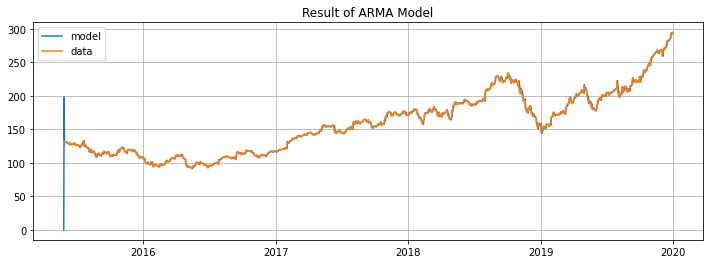

In [235]:
# Predict history 

hist_preds = arma.predict()

plt.figure(figsize = (12, 4))
plt.plot(hist_preds, label = 'model')
plt.plot(y_hist, label = 'data')
plt.legend()
plt.grid()
plt.title('Result of ARMA Model');

In [212]:
## Forecasting

future_preds = arma.forecast(steps = len(y_future))
future_preds_df = pd.DataFrame(index = y_future.index).reset_index()
df = pd.concat([aapl.reset_index(), future_preds], axis = 1).set_index('date').drop('high', axis = 1)
df.tail()
#future_preds

,predicted_mean
date,
2020-05-18 00:00:00+00:00,293.868158
2020-05-19 00:00:00+00:00,293.868158
2020-05-20 00:00:00+00:00,293.868158
2020-05-21 00:00:00+00:00,293.868158
2020-05-22 00:00:00+00:00,293.868158


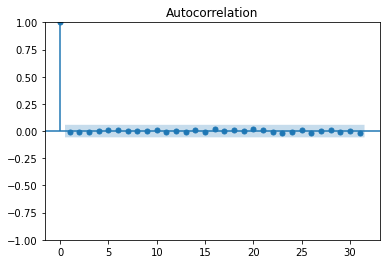

In [213]:
## Errors

resids = y_hist['high'] - hist_preds


# Answer check
plot_acf(resids);

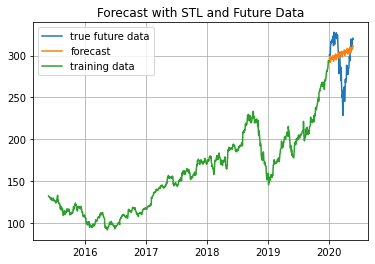

In [227]:
plt.plot(y_future, label = 'true future data')
plt.plot(df_future, label = 'forecast')
plt.plot(y_hist['2015':], label = 'training data')
plt.legend()
plt.title('Forecast with STL and Future Data')
plt.grid();

In [215]:
rmse = np.sqrt(mean_squared_error(y_future, future_preds))
rmse

25.01348575231784